<a href="https://colab.research.google.com/github/Viny2030/mi_proyecto/blob/main/fraudebalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### RUBROS DE BALANCE


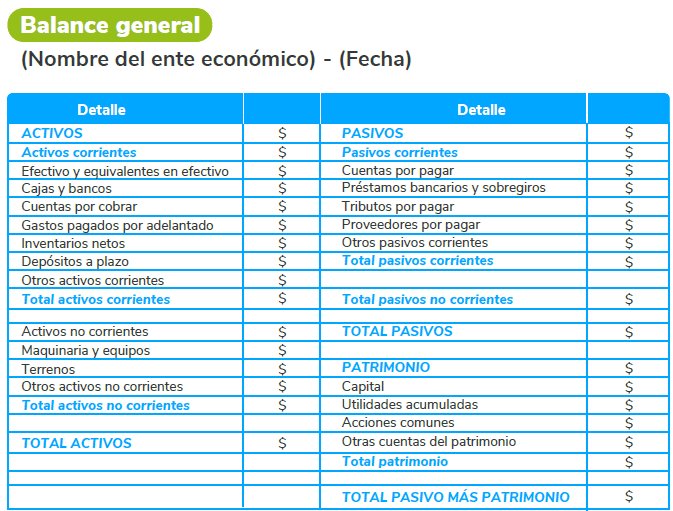

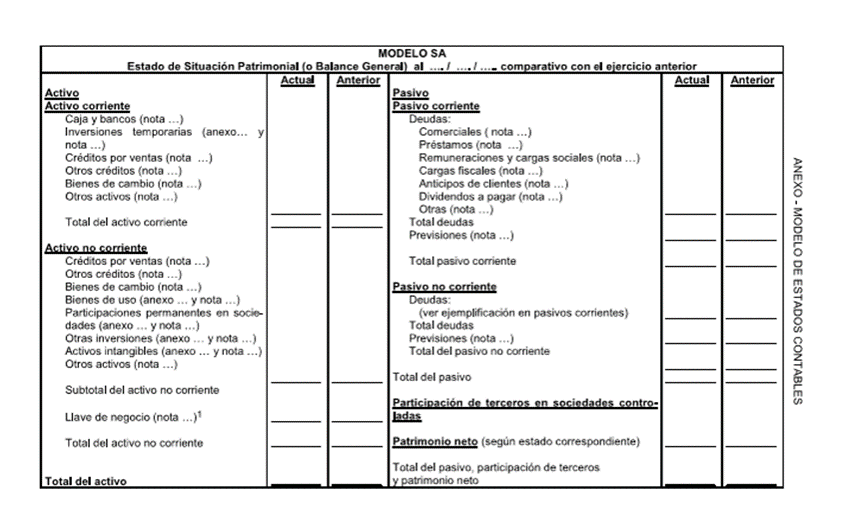

### CAJA

In [1]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 39.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np


🔍 RESULTADOS DETALLADOS DE LA AUDITORÍA DE CAJA

ID 26 | 2025-01-19 18:04 | Gasto | Monto: $14,501.08 | Cajero: 4 | ALERTAS: Gasto con saldo creciente
ID 9 | 2025-01-26 17:48 | Venta | Monto: $12,974.45 | Cajero: 7 | ALERTAS: Venta con saldo decreciente
ID 30 | 2025-02-04 20:58 | Venta | Monto: $4,898.68 | Cajero: 8 | ALERTAS: Venta con saldo decreciente
ID 5 | 2025-02-13 21:22 | Venta | Monto: $4,014.39 | Cajero: 10 | ALERTAS: Venta con saldo decreciente
ID 16 | 2025-02-14 11:37 | Gasto | Monto: $6,067.95 | Cajero: 3 | ALERTAS: Gasto con saldo creciente
ID 8 | 2025-03-17 00:50 | Gasto | Monto: $9,082.93 | Cajero: 8 | ALERTAS: Gasto fuera de horario (7-21)
ID 20 | 2025-04-04 05:44 | Gasto | Monto: $7,086.71 | Cajero: 7 | ALERTAS: Gasto fuera de horario (7-21)
ID 11 | 2025-04-05 13:29 | Venta | Monto: $8,477.96 | Cajero: 2 | ALERTAS: Venta con saldo decreciente
ID 7 | 2025-04-09 09:07 | Venta | Monto: $14,623.62 | Cajero: 2 | ALERTAS: Venta con saldo decreciente
ID 1 | 2025-05-01 02:54

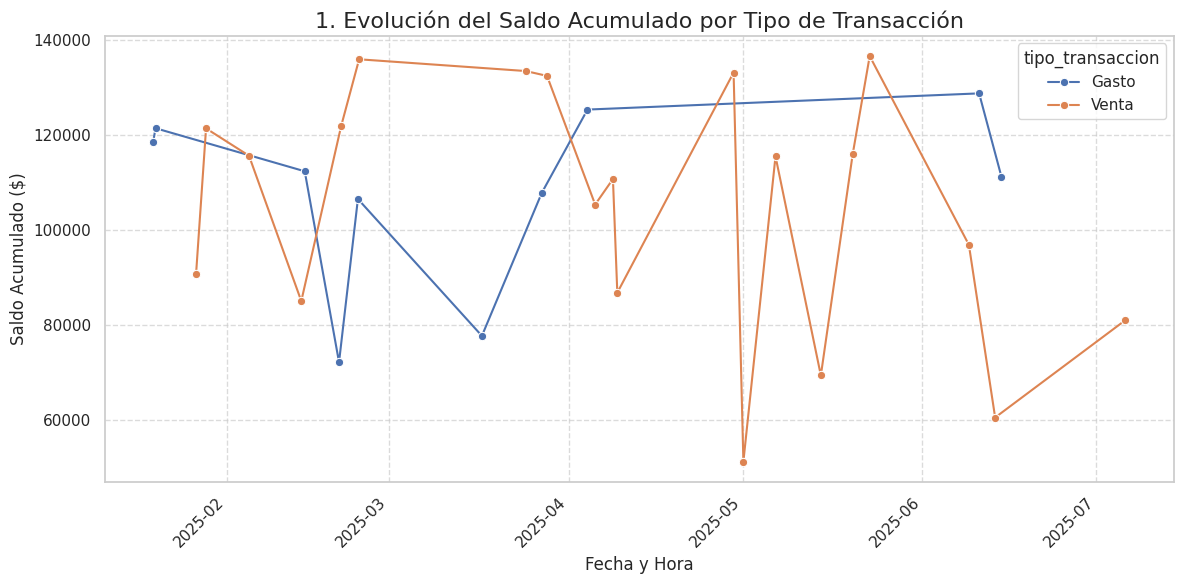

/tmp/ipython-input-5-1094736006.py:188: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='tipo_transaccion', palette='viridis', order=df['tipo_transaccion'].value_counts().index)


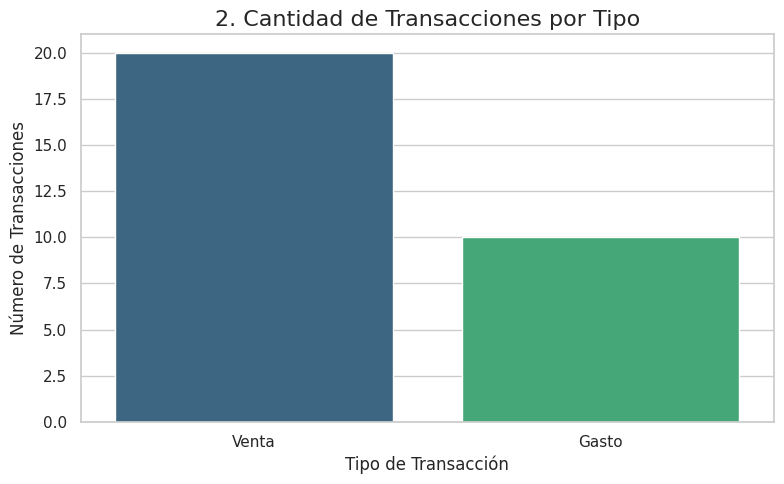

/tmp/ipython-input-5-1094736006.py:197: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='metodo_pago', y='monto', palette='pastel')


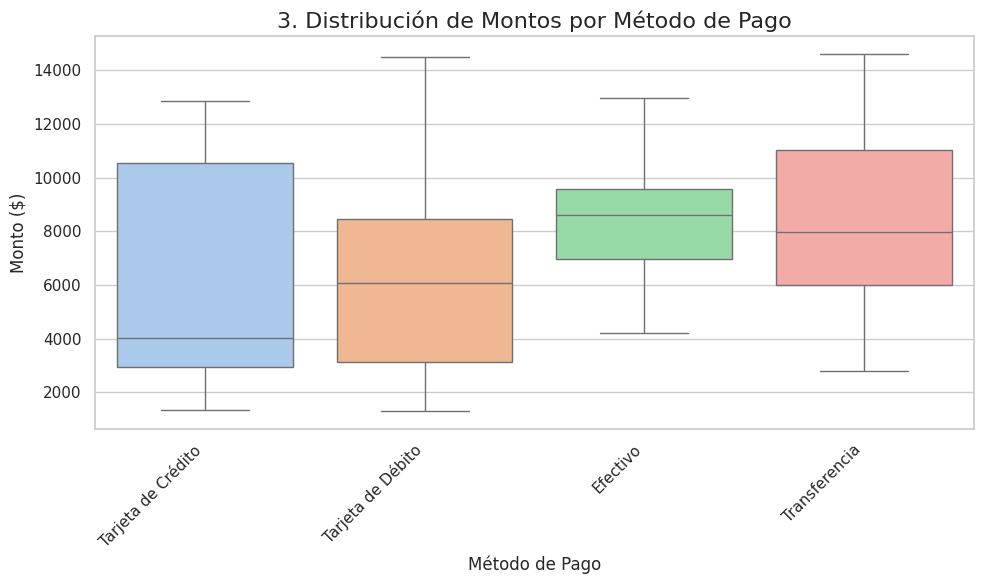

/tmp/ipython-input-5-1094736006.py:209: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=alertas_cajero.index.astype(str), y=alertas_cajero.values, palette='coolwarm')


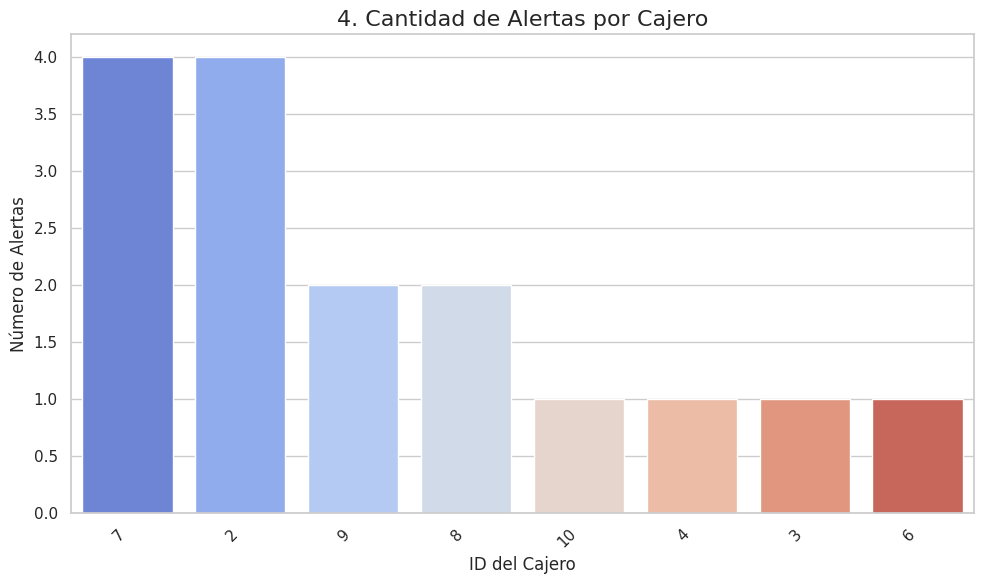

/tmp/ipython-input-5-1094736006.py:224: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='tipo_transaccion', y='monto', palette='Set2')


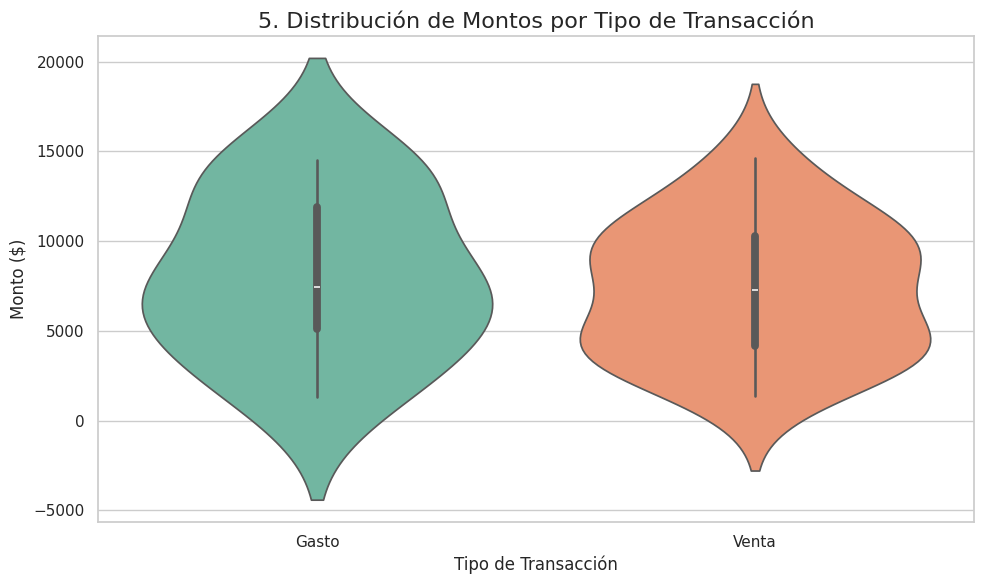

/tmp/ipython-input-5-1094736006.py:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_alertas, x='tipo_transaccion', palette='dark', order=df_alertas['tipo_transaccion'].value_counts().index)


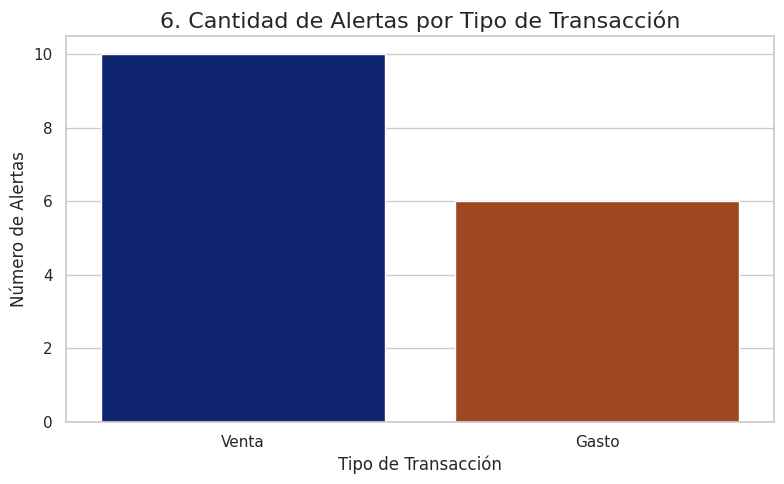

/tmp/ipython-input-5-1094736006.py:248: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_alertas, x='dia_semana_es', order=orden_dias_es, palette='plasma')


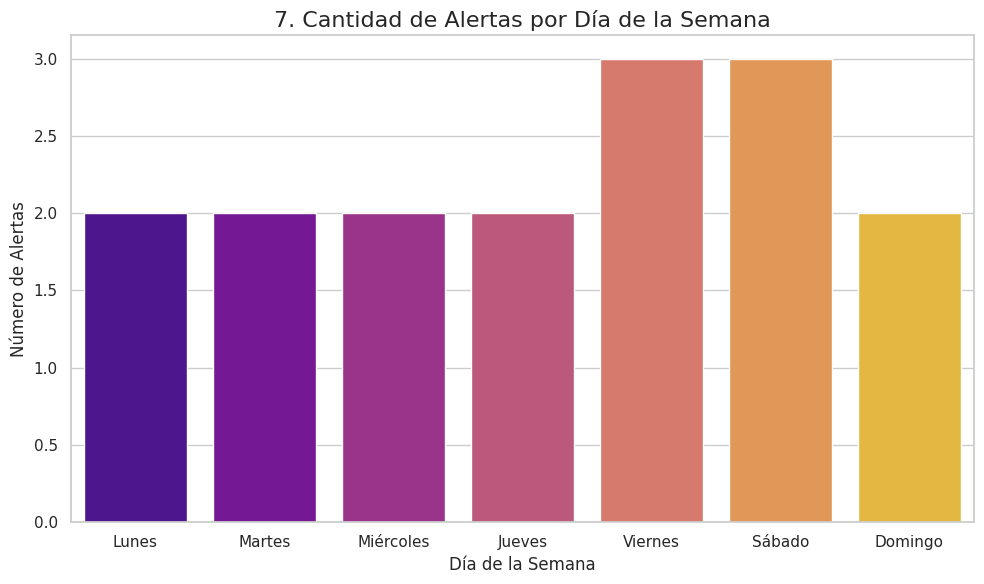

/tmp/ipython-input-5-1094736006.py:264: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categorias.index, y=top_categorias.values, palette='magma')


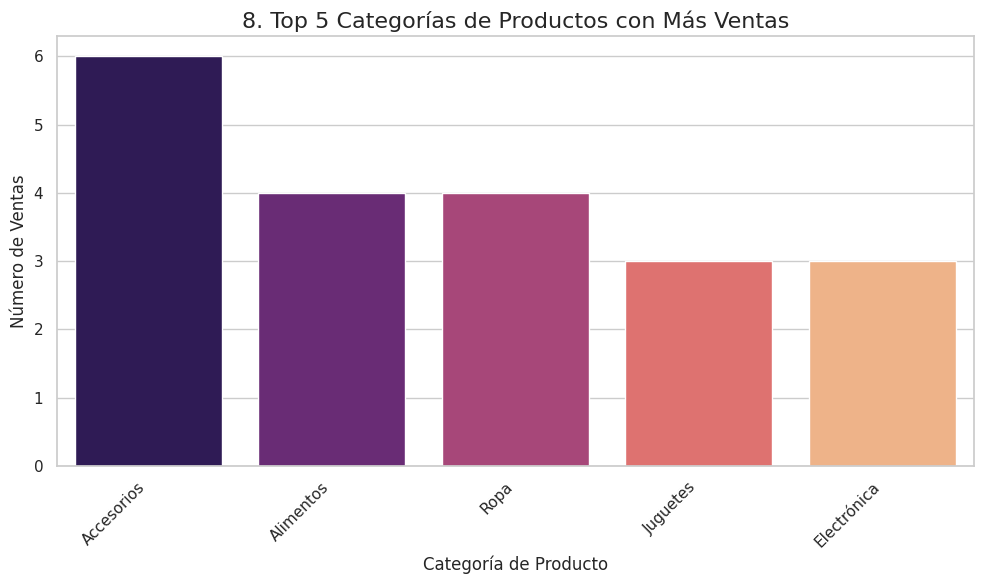

/tmp/ipython-input-5-1094736006.py:279: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='hora', palette='rocket')


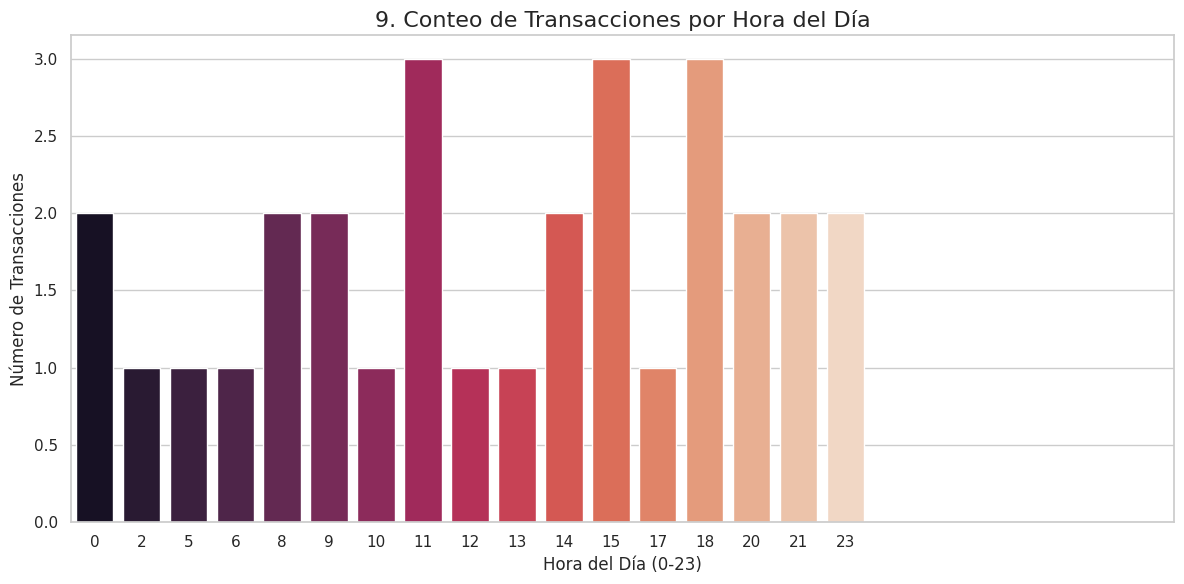

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 7) # Tamaño de figura ligeramente más grande

# --- Cargar datos ---
url = "https://raw.githubusercontent.com/Viny2030/mi_proyecto/refs/heads/main/auditoria_caja.csv"
df = pd.read_csv(url, parse_dates=['fecha_hora'])
df.sort_values(by='fecha_hora', inplace=True)
df.reset_index(drop=True, inplace=True)

# --- Cálculo de diferencias de saldo (ya existía) ---
df['diferencia_saldo'] = df['saldo_acumulado'].diff().fillna(0).round(2)

# --- Reglas de Auditoría ---

# Regla 1: Consistencia de saldo (ya existía)
def verificar_consistencia_saldo(row):
    if row['tipo_transaccion'] == 'Venta' and row['diferencia_saldo'] < 0:
        return 'Venta con saldo decreciente'
    elif row['tipo_transaccion'] == 'Gasto' and row['diferencia_saldo'] > 0:
        return 'Gasto con saldo creciente'
    return None

df['error_saldo'] = df.apply(verificar_consistencia_saldo, axis=1)

# Regla 2: Descripción de gastos (ya existía)
df['error_descripcion'] = df.apply(
    lambda row: 'Gasto sin descripción' if row['tipo_transaccion'] == 'Gasto' and pd.isnull(row['descripcion']) else None,
    axis=1
)

# Regla 3: Categoría de ventas (ya existía)
df['error_categoria'] = df.apply(
    lambda row: 'Venta sin categoría' if row['tipo_transaccion'] == 'Venta' and pd.isnull(row['producto_categoria']) else None,
    axis=1
)

# Regla 4: Horario de gastos (ya existía)
df['hora'] = df['fecha_hora'].dt.hour
df['error_horario'] = df.apply(
    lambda row: 'Gasto fuera de horario (7-21)' if row['tipo_transaccion'] == 'Gasto' and (row['hora'] < 7 or row['hora'] > 21) else None,
    axis=1
)

# Regla 5: Cajeros con muchos gastos (ya existía)
gastos_por_cajero = df[df['tipo_transaccion'] == 'Gasto'].groupby('cajero_id').size()
cajeros_sospechosos = gastos_por_cajero[gastos_por_cajero > 3].index.tolist()

df['alerta_cajero'] = df.apply(
    lambda row: 'Cajero con muchos gastos (>3)' if row['tipo_transaccion'] == 'Gasto' and row['cajero_id'] in cajeros_sospechosos else None,
    axis=1
)

# --- NUEVAS REGLAS ---

# Regla 6: Detección de Transacciones Duplicadas
# Se considera duplicada si ID y Fecha/Hora son los mismos
df['es_duplicada'] = df.duplicated(subset=['id_transaccion', 'fecha_hora'], keep=False) # keep=False marca todas las ocurrencias
df['alerta_duplicada'] = df.apply(lambda row: 'Transacción duplicada' if row['es_duplicada'] else None, axis=1)

# Regla 7: Detección de Montos Irregulares (Outliers IQR)
def detectar_outliers_iqr(df_segmento, columna_monto):
    # Asegúrate de que el segmento no esté vacío para evitar errores de cálculo de cuantiles
    if df_segmento.empty:
        return pd.Series([False] * len(df_segmento), index=df_segmento.index)

    Q1 = df_segmento[columna_monto].quantile(0.25)
    Q3 = df_segmento[columna_monto].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Manejar el caso de un solo valor o todos los valores iguales para evitar IQR=0 o rangos nulos
    if IQR == 0 and df_segmento[columna_monto].nunique() == 1:
        return pd.Series([False] * len(df_segmento), index=df_segmento.index)

    return ~((df_segmento[columna_monto] >= limite_inferior) & (df_segmento[columna_monto] <= limite_superior))

# Aplicar detección de outliers por tipo de transacción
df['alerta_monto_irregular'] = None
for tipo in df['tipo_transaccion'].unique():
    subset_indices = df[df['tipo_transaccion'] == tipo].index
    if not subset_indices.empty:
        is_outlier = detectar_outliers_iqr(df.loc[subset_indices], 'monto')
        df.loc[subset_indices, 'alerta_monto_irregular'] = is_outlier.apply(
            lambda x: f'Monto {tipo} irregular (outlier)' if x else None
        )

# --- CREAR COLUMNAS DE TIEMPO ANTES DE FILTRAR PARA df_alertas ---
# Esta es la corrección clave: mover la creación de estas columnas aquí
df['dia_semana'] = df['fecha_hora'].dt.day_name()
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
orden_dias_es = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
df['dia_semana_es'] = df['fecha_hora'].dt.day_name().replace(
    {'Monday': 'Lunes', 'Tuesday': 'Martes', 'Wednesday': 'Miércoles',
     'Thursday': 'Jueves', 'Friday': 'Viernes', 'Saturday': 'Sábado', 'Sunday': 'Domingo'}
)

# Consolidar todas las alertas
df['alertas'] = df[['error_saldo', 'error_descripcion', 'error_categoria',
                    'error_horario', 'alerta_cajero', 'alerta_duplicada',
                    'alerta_monto_irregular']].apply(
    lambda row: ', '.join([str(r) for r in row if pd.notnull(r)]), axis=1
)

# Filtrar transacciones con alertas (ahora df_alertas tendrá 'dia_semana_es')
df_alertas = df[df['alertas'] != '']

# --- IMPRIMIR RESULTADOS ORDENADOS (Detalle de Alertas) ---
print("\n" + "="*50)
print("🔍 RESULTADOS DETALLADOS DE LA AUDITORÍA DE CAJA")
print("="*50 + "\n")
if not df_alertas.empty:
    for idx, row in df_alertas.iterrows():
        print(f"ID {row['id_transaccion']} | {row['fecha_hora'].strftime('%Y-%m-%d %H:%M')} | {row['tipo_transaccion']} | Monto: ${row['monto']:,.2f} | Cajero: {row['cajero_id']} | ALERTAS: {row['alertas']}")
else:
    print("¡No se encontraron alertas en las transacciones!")

# --- RESUMEN DE ANÁLISIS ---
print("\n" + "="*50)
print("📊 RESUMEN DEL ANÁLISIS DE AUDITORÍA")
print("="*50 + "\n")

# Total de transacciones y transacciones con alertas
total_transacciones = len(df)
total_alertas = len(df_alertas)
porcentaje_alertas = (total_alertas / total_transacciones * 100) if total_transacciones > 0 else 0
print(f"Total de Transacciones Analizadas: {total_transacciones}")
print(f"Transacciones con Alertas Detectadas: {total_alertas} ({porcentaje_alertas:.2f}%)")

# Conteo de cada tipo de alerta
print("\n--- Conteo de cada tipo de Alerta ---")
tipos_alerta = ['error_saldo', 'error_descripcion', 'error_categoria',
                'error_horario', 'alerta_cajero', 'alerta_duplicada',
                'alerta_monto_irregular']
conteo_alertas = {alerta_tipo: df[alerta_tipo].notnull().sum() for alerta_tipo in tipos_alerta}
conteo_alertas_df = pd.Series(conteo_alertas).sort_values(ascending=False)
print(conteo_alertas_df[conteo_alertas_df > 0].to_string())

# Monto promedio de transacciones con y sin alertas
if not df_alertas.empty:
    monto_promedio_con_alertas = df_alertas['monto'].mean()
    print(f"\nMonto Promedio de Transacciones con Alertas: ${monto_promedio_con_alertas:,.2f}")

df_sin_alertas = df[df['alertas'] == '']
if not df_sin_alertas.empty:
    monto_promedio_sin_alertas = df_sin_alertas['monto'].mean()
    print(f"Monto Promedio de Transacciones SIN Alertas: ${monto_promedio_sin_alertas:,.2f}")

# Alertas por método de pago
print("\n--- Alertas por Método de Pago ---")
if not df_alertas.empty:
    alertas_por_metodo_pago = df_alertas['metodo_pago'].value_counts()
    print(alertas_por_metodo_pago[alertas_por_metodo_pago > 0].to_string())
else:
    print("No hay alertas para analizar por método de pago.")

# Guardar reporte CSV de transacciones con alertas
nombre_reporte_csv = "reporte_auditoria_caja_completo.csv"
df_alertas.to_csv(nombre_reporte_csv, index=False, encoding='utf-8')
print(f"\nReporte de transacciones con alertas guardado en '{nombre_reporte_csv}'")


# --- GRÁFICOS ADICIONALES Y MEJORAS ---

print("\n" + "="*50)
print("📈 VISUALIZACIONES DE LA AUDITORÍA")
print("="*50 + "\n")

# 1. Evolución del Saldo Acumulado por Tipo de Transacción (ya existía)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='fecha_hora', y='saldo_acumulado', hue='tipo_transaccion', marker='o', lw=1.5)
plt.title('1. Evolución del Saldo Acumulado por Tipo de Transacción', fontsize=16)
plt.xlabel('Fecha y Hora', fontsize=12)
plt.ylabel('Saldo Acumulado ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Cantidad de Transacciones por Tipo (ya existía)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='tipo_transaccion', palette='viridis', order=df['tipo_transaccion'].value_counts().index)
plt.title('2. Cantidad de Transacciones por Tipo', fontsize=16)
plt.xlabel('Tipo de Transacción', fontsize=12)
plt.ylabel('Número de Transacciones', fontsize=12)
plt.tight_layout()
plt.show()

# 3. Montos por Método de Pago (Boxplot - ya existía)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='metodo_pago', y='monto', palette='pastel')
plt.title('3. Distribución de Montos por Método de Pago', fontsize=16)
plt.xlabel('Método de Pago', fontsize=12)
plt.ylabel('Monto ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Cantidad de Alertas por Cajero (ya existía)
if not df_alertas.empty:
    plt.figure(figsize=(10, 6))
    alertas_cajero = df_alertas['cajero_id'].value_counts()
    sns.barplot(x=alertas_cajero.index.astype(str), y=alertas_cajero.values, palette='coolwarm')
    plt.title('4. Cantidad de Alertas por Cajero', fontsize=16)
    plt.xlabel('ID del Cajero', fontsize=12)
    plt.ylabel('Número de Alertas', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo hay alertas para generar el gráfico de 'Alertas por Cajero'.")


# --- NUEVOS GRÁFICOS ---

# 5. Distribución de Montos por Tipo de Transacción (Violin Plot)
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='tipo_transaccion', y='monto', palette='Set2')
plt.title('5. Distribución de Montos por Tipo de Transacción', fontsize=16)
plt.xlabel('Tipo de Transacción', fontsize=12)
plt.ylabel('Monto ($)', fontsize=12)
plt.tight_layout()
plt.show()

# 6. Alertas por Tipo de Transacción
if not df_alertas.empty:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_alertas, x='tipo_transaccion', palette='dark', order=df_alertas['tipo_transaccion'].value_counts().index)
    plt.title('6. Cantidad de Alertas por Tipo de Transacción', fontsize=16)
    plt.xlabel('Tipo de Transacción', fontsize=12)
    plt.ylabel('Número de Alertas', fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("\nNo hay alertas para generar el gráfico de 'Alertas por Tipo de Transacción'.")


# 7. Cantidad de Alertas por Día de la Semana
# Asegurarse de que 'dia_semana_es' ya exista en df_alertas
if not df_alertas.empty:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_alertas, x='dia_semana_es', order=orden_dias_es, palette='plasma')
    plt.title('7. Cantidad de Alertas por Día de la Semana', fontsize=16)
    plt.xlabel('Día de la Semana', fontsize=12)
    plt.ylabel('Número de Alertas', fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("\nNo hay alertas para generar el gráfico de 'Alertas por Día de la Semana'.")


# 8. Top N Categorías de Productos con Más Ventas (solo si hay datos de ventas y categorías)
ventas_df = df[df['tipo_transaccion'] == 'Venta']
if not ventas_df.empty and 'producto_categoria' in ventas_df.columns:
    top_categorias = ventas_df['producto_categoria'].value_counts().nlargest(5) # Top 5 categorías
    if not top_categorias.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_categorias.index, y=top_categorias.values, palette='magma')
        plt.title('8. Top 5 Categorías de Productos con Más Ventas', fontsize=16)
        plt.xlabel('Categoría de Producto', fontsize=12)
        plt.ylabel('Número de Ventas', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("\nNo hay datos de ventas con categorías para generar el gráfico de 'Top Categorías'.")
else:
    print("\nNo hay datos de ventas o la columna 'producto_categoria' no existe para generar el gráfico de 'Top Categorías'.")


# 9. Patrón de Transacciones por Hora del Día
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='hora', palette='rocket')
plt.title('9. Conteo de Transacciones por Hora del Día', fontsize=16)
plt.xlabel('Hora del Día (0-23)', fontsize=12)
plt.ylabel('Número de Transacciones', fontsize=12)
plt.xticks(np.arange(0, 24, 1)) # Asegurar que se muestren todas las horas
plt.tight_layout()
plt.show()

## Algoritmo II-conciliacion bancaria

✅ Datos cargados correctamente.
✅ Tipos de datos convertidos correctamente.

⚠️ ALERTA: Posibles transacciones duplicadas en registros bancarios:
     fecha  monto_banco referencia_banco  id_banco
2025-06-17      8302.09     BNK-80443699         7
2025-06-17      8302.09     BNK-80443699         7
2025-06-17      5581.75     BNK-95788568        23
2025-06-17      5581.75     BNK-95788568        23
2025-06-21      5445.79     BNK-93676320         9
2025-06-21      5445.79     BNK-93676320         9
2025-06-21      5445.79     BNK-93676320         9
2025-06-21      8897.21     BNK-34873471        11
2025-06-21      8897.21     BNK-34873471        11
2025-06-21      8897.21     BNK-34873471        11
2025-06-21      9976.75     BNK-03669096        13
2025-06-21      9976.75     BNK-03669096        13
2025-06-21      9976.75     BNK-03669096        13

⚠️ ALERTA: Posibles transacciones duplicadas en registros contables:
     fecha  monto_contable referencia_contable  id_contable
2025-06-17

/tmp/ipython-input-7-1955350412.py:203: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=audit_df, x='clasificación_auditoría', palette='viridis', order=audit_df['clasificación_auditoría'].value_counts().index)


📊 Guardado: grafico_clasificacion.png


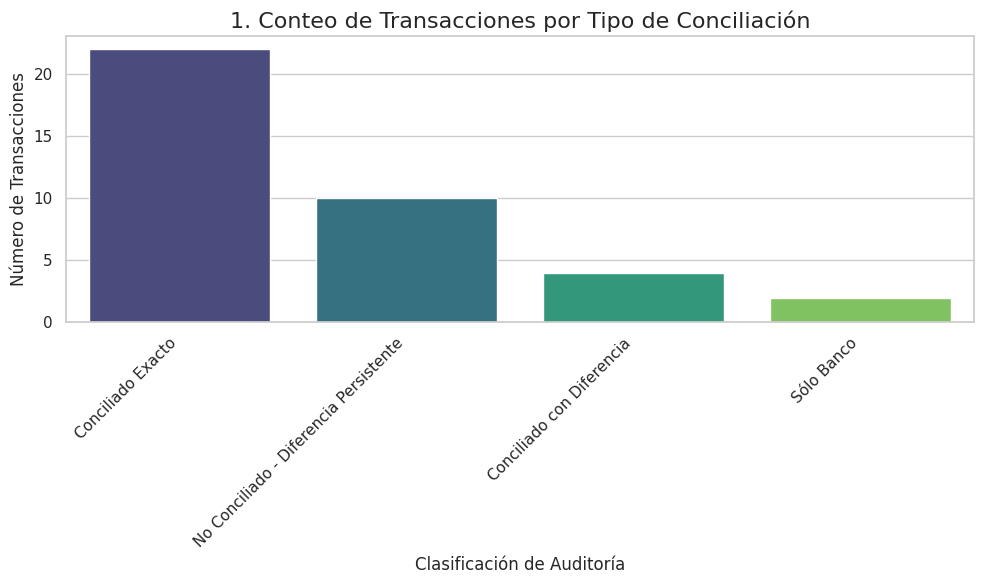

📊 Guardado: grafico_diferencias.png


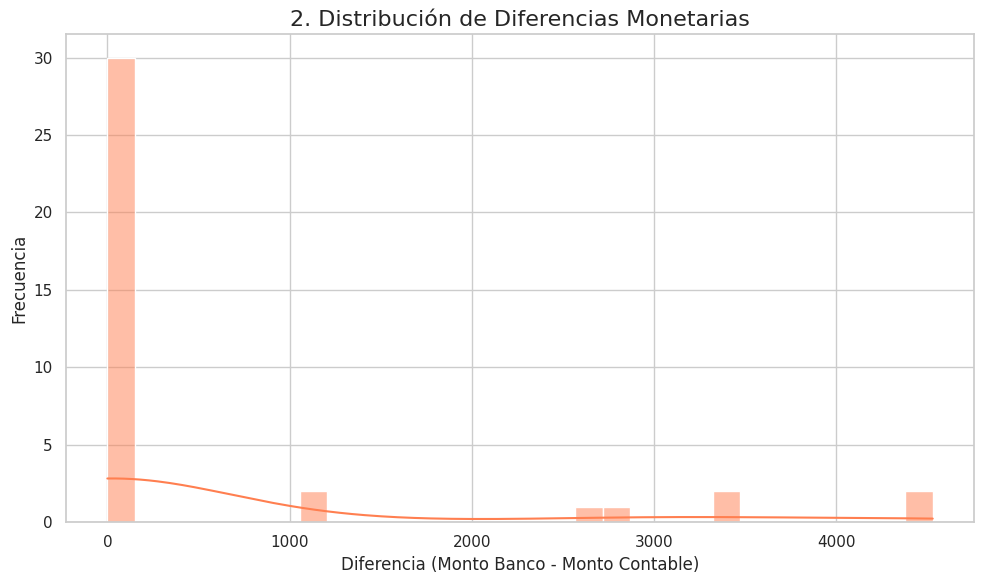

/tmp/ipython-input-7-1955350412.py:229: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=audit_df[audit_df['diferencia_monto'] != 0], x='clasificación_auditoría', y='diferencia_monto', palette='coolwarm')


📊 Guardado: grafico_diferencias_por_clasificacion.png


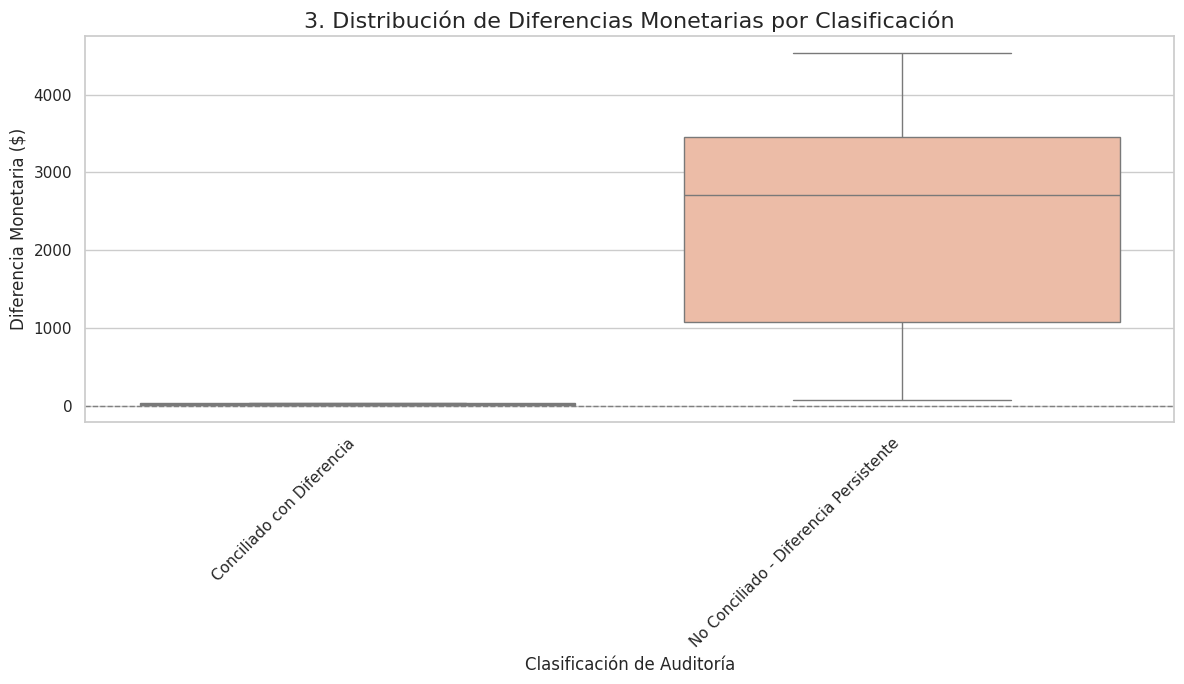

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


📊 Guardado: grafico_tendencia_solo_banco_contable.png


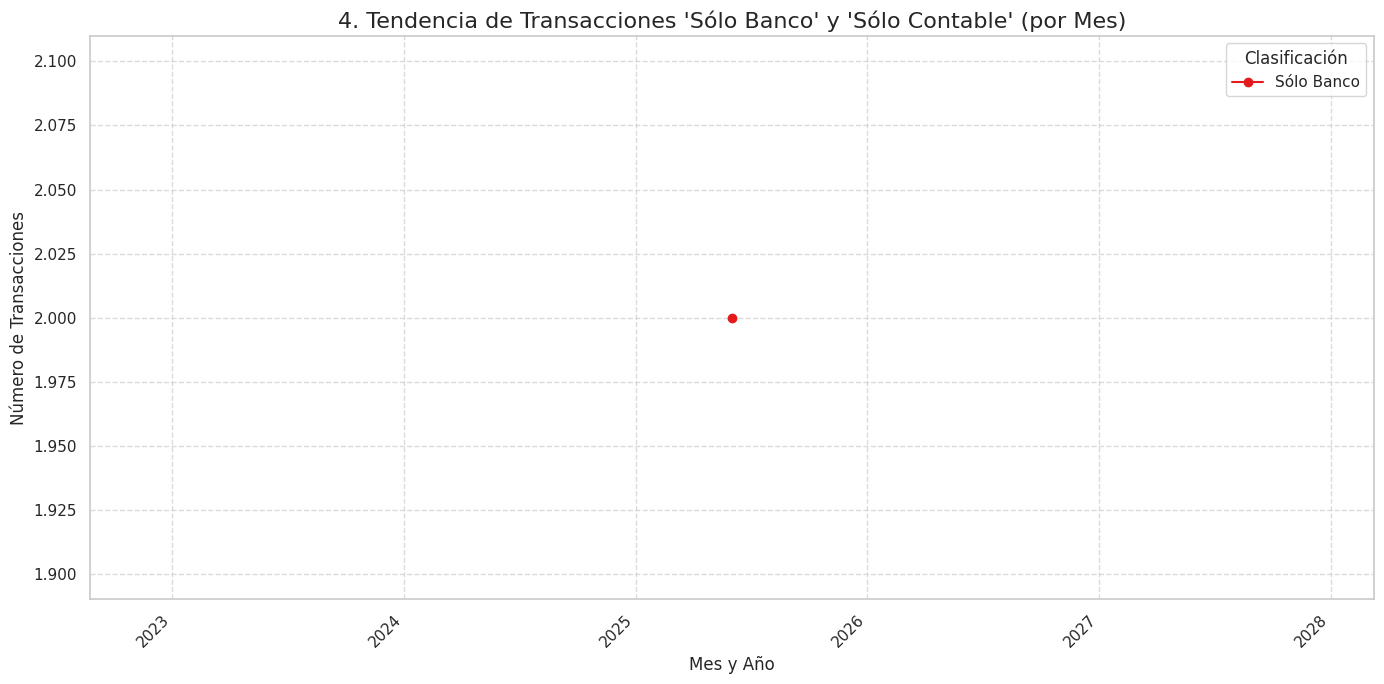

📊 Guardado: grafico_antiguedad_no_conciliado.png


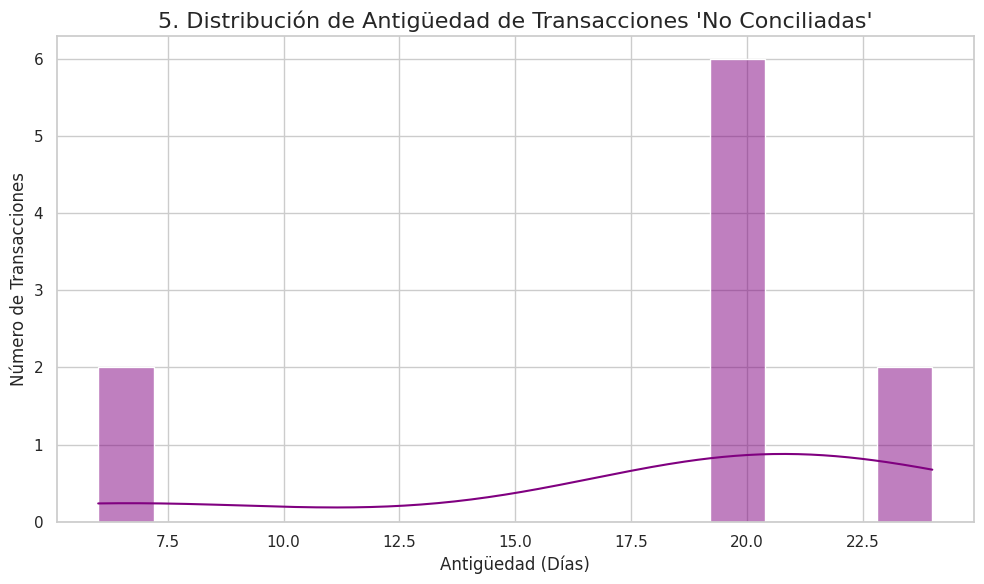

/tmp/ipython-input-7-1955350412.py:289: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Monto_Diferencia_Absoluta', y='Concepto', data=df_diff_grouped, palette='viridis')


📊 Guardado: grafico_top_diferencias_concepto.png


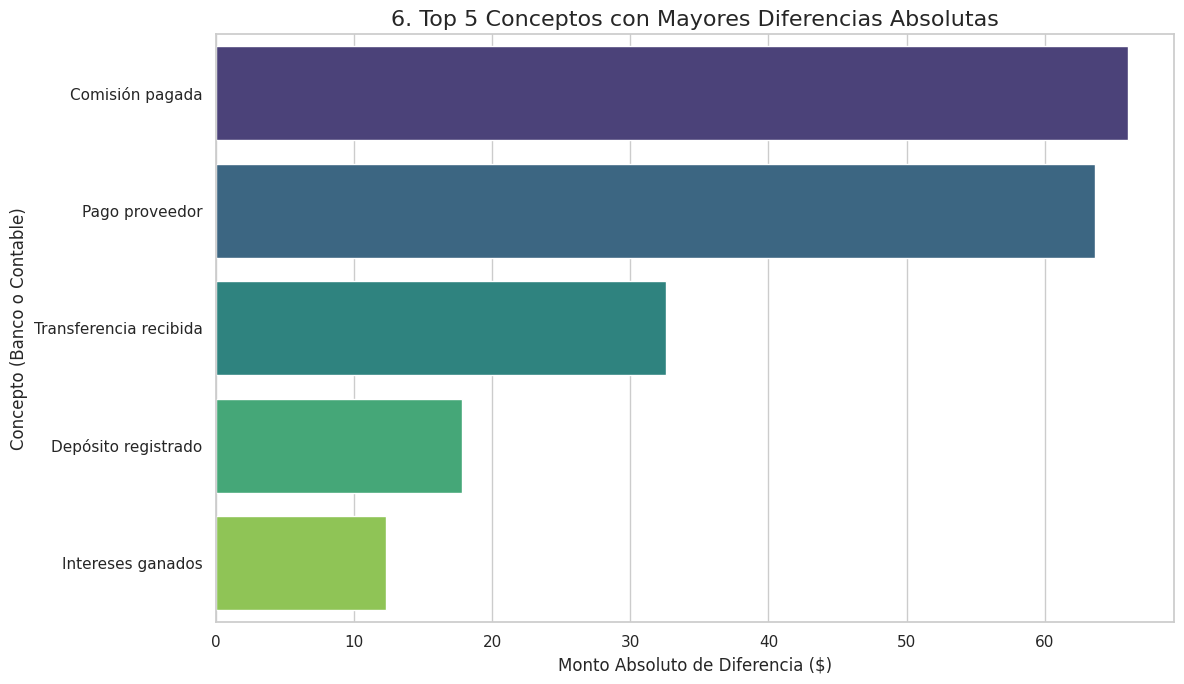


📁 EXPORTACIÓN DE REPORTES CSV

Reporte completo de auditoría: 38 registros en 'resultado_auditoria_conciliacion_completa.csv'
Reporte de transacciones 'No Conciliado': 10 registros en 'reporte_no_conciliado.csv'
Reporte de transacciones 'Conciliado con Diferencia': 4 registros en 'reporte_conciliado_con_diferencia.csv'
Reporte de transacciones 'Sólo Banco': 2 registros en 'reporte_solo_banco.csv'
Reporte de transacciones 'Sólo Contable': 0 registros en 'reporte_solo_contable.csv'

✨ Proceso de auditoría y análisis de conciliación bancaria completado. ¡Revisa los gráficos y los reportes!


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# --- Configuración visual ---
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 7) # Tamaño de figura ligeramente más grande
plt.style.use('seaborn-v0_8-deep') # Estilo más moderno para los gráficos

# --- 1. Cargar dataset desde GitHub ---
url = "https://raw.githubusercontent.com/Viny2030/mi_proyecto/main/conciliacion_bancaria.csv"

try:
    df = pd.read_csv(url)
    print("✅ Datos cargados correctamente.")
except Exception as e:
    print(f"❌ Error al cargar el archivo: {e}")
    exit()

# --- 2. Validación y Conversión de fechas y tipos ---
required_columns = [
    'fecha', 'id_banco', 'tipo', 'concepto_banco', 'monto_banco', 'referencia_banco',
    'id_contable', 'concepto_contable', 'monto_contable', 'referencia_contable',
    'diferencia_monto', 'conciliado'
]

if not all(col in df.columns for col in required_columns):
    print("❌ Error: Faltan columnas requeridas en el dataset.")
    print(f"Columnas esperadas: {required_columns}")
    print(f"Columnas encontradas: {df.columns.tolist()}")
    exit()

try:
    df['fecha'] = pd.to_datetime(df['fecha'])
    df['conciliado'] = df['conciliado'].astype(bool)
    # Asegurarse de que las columnas de monto sean numéricas
    df['monto_banco'] = pd.to_numeric(df['monto_banco'], errors='coerce').fillna(0)
    df['monto_contable'] = pd.to_numeric(df['monto_contable'], errors='coerce').fillna(0)
    df['diferencia_monto'] = pd.to_numeric(df['diferencia_monto'], errors='coerce').fillna(0)
    print("✅ Tipos de datos convertidos correctamente.")
except Exception as e:
    print(f"❌ Error al convertir tipos de datos: {e}")
    exit()

# --- 3. Crear campos clave para pareo ---
df['clave_banco'] = df['monto_banco'].astype(str) + "-" + df['referencia_banco'].fillna('').astype(str)
df['clave_contable'] = df['monto_contable'].astype(str) + "-" + df['referencia_contable'].fillna('').astype(str)

# --- 4. Clasificación de auditoría (Mejorada con nuevas categorías) ---
audit_data = []

for idx, row in df.iterrows():
    tipo = "No Clasificado" # Valor por defecto

    if row['conciliado'] == True and abs(row['diferencia_monto']) < 0.01: # Usar un umbral pequeño para exactitud
        tipo = "Conciliado Exacto"
    elif row['conciliado'] == True and abs(row['diferencia_monto']) >= 0.01:
        tipo = "Conciliado con Diferencia"
    elif row['conciliado'] == False and pd.notna(row['id_banco']) and (pd.isna(row['id_contable']) or row['id_contable'] == ''):
        tipo = "Sólo Banco" # Transacción en banco, no en contabilidad
    elif row['conciliado'] == False and pd.notna(row['id_contable']) and (pd.isna(row['id_banco']) or row['id_banco'] == ''):
        tipo = "Sólo Contable" # Transacción en contabilidad, no en banco
    elif row['conciliado'] == False and pd.notna(row['id_banco']) and pd.notna(row['id_contable']) and row['diferencia_monto'] != 0:
        tipo = "No Conciliado - Diferencia Persistente" # Existentes en ambos, pero no conciliados y con diferencia
    elif row['conciliado'] == False: # Caso genérico de no conciliado
        tipo = "No Conciliado"

    audit_data.append({
        'fecha': row['fecha'],
        'id_banco': row['id_banco'],
        'tipo_banco': row['tipo'],
        'concepto_banco': row['concepto_banco'],
        'monto_banco': row['monto_banco'],
        'referencia_banco': row['referencia_banco'],
        'id_contable': row['id_contable'],
        'concepto_contable': row['concepto_contable'],
        'monto_contable': row['monto_contable'],
        'referencia_contable': row['referencia_contable'],
        'diferencia_monto': round(row['diferencia_monto'], 2),
        'conciliado': row['conciliado'],
        'clasificación_auditoría': tipo
    })

audit_df = pd.DataFrame(audit_data)

# --- 5. Detección de Transacciones Duplicadas en Origen (nueva regla de auditoría) ---
# Duplicados en registros bancarios
bank_duplicates = df[df.duplicated(subset=['fecha', 'monto_banco', 'referencia_banco'], keep=False)]
if not bank_duplicates.empty:
    print("\n⚠️ ALERTA: Posibles transacciones duplicadas en registros bancarios:")
    print(bank_duplicates[['fecha', 'monto_banco', 'referencia_banco', 'id_banco']].to_string(index=False))

# Duplicados en registros contables
accounting_duplicates = df[df.duplicated(subset=['fecha', 'monto_contable', 'referencia_contable'], keep=False)]
if not accounting_duplicates.empty:
    print("\n⚠️ ALERTA: Posibles transacciones duplicadas en registros contables:")
    print(accounting_duplicates[['fecha', 'monto_contable', 'referencia_contable', 'id_contable']].to_string(index=False))


# --- 6. Nuevos Campos para Análisis Adicional ---
audit_df['antiguedad_dias'] = (pd.to_datetime(datetime.date.today()) - audit_df['fecha']).dt.days
audit_df['es_solo_banco_o_contable'] = audit_df['clasificación_auditoría'].isin(['Sólo Banco', 'Sólo Contable'])

# --- 7. Mostrar Resumen y Detalles Mejorados ---
print("\n" + "="*50)
print("🔍 RESULTADOS DETALLADOS DE LA AUDITORÍA DE CONCILIACIÓN")
print("="*50 + "\n")

print("\n✅ Resumen de clasificación por tipo de conciliación:")
print(audit_df['clasificación_auditoría'].value_counts())

print("\n--- Transacciones 'No Conciliado' (pendientes sin pareo): ---")
no_conciliado_df = audit_df[audit_df['clasificación_auditoría'].str.contains('No Conciliado', na=False)]
if not no_conciliado_df.empty:
    print(no_conciliado_df[[
        'fecha', 'clasificación_auditoría', 'tipo_banco', 'concepto_banco', 'monto_banco',
        'concepto_contable', 'monto_contable', 'diferencia_monto', 'antiguedad_dias'
    ]].sort_values(by='fecha').to_string(index=False))
else:
    print("No hay transacciones clasificadas como 'No Conciliado'. ¡Excelente!")


print("\n--- Transacciones 'Conciliado con Diferencia': ---")
conciliado_diferencia_df = audit_df[audit_df['clasificación_auditoría'] == 'Conciliado con Diferencia']
if not conciliado_diferencia_df.empty:
    print(conciliado_diferencia_df[[
        'fecha', 'tipo_banco', 'concepto_banco', 'monto_banco',
        'concepto_contable', 'monto_contable', 'diferencia_monto',
        'referencia_banco', 'referencia_contable'
    ]].sort_values(by='fecha').to_string(index=False))
else:
    print("No hay transacciones 'Conciliado con Diferencia'. ¡Felicidades!")


print("\n--- Transacciones 'Sólo Banco': ---")
solo_banco_df = audit_df[audit_df['clasificación_auditoría'] == 'Sólo Banco']
if not solo_banco_df.empty:
    print(solo_banco_df[[
        'fecha', 'concepto_banco', 'monto_banco', 'referencia_banco', 'antiguedad_dias'
    ]].sort_values(by='fecha').to_string(index=False))
else:
    print("No hay transacciones 'Sólo Banco'.")

print("\n--- Transacciones 'Sólo Contable': ---")
solo_contable_df = audit_df[audit_df['clasificación_auditoría'] == 'Sólo Contable']
if not solo_contable_df.empty:
    print(solo_contable_df[[
        'fecha', 'concepto_contable', 'monto_contable', 'referencia_contable', 'antiguedad_dias'
    ]].sort_values(by='fecha').to_string(index=False))
else:
    print("No hay transacciones 'Sólo Contable'.")


# --- Análisis Adicional ---
print("\n" + "="*50)
print("📊 ANÁLISIS PROFUNDO DE LA CONCILIACIÓN")
print("="*50 + "\n")

# Antigüedad de No Conciliados (más de 30 días, por ejemplo)
transacciones_viejas_no_conciliadas = no_conciliado_df[no_conciliado_df['antiguedad_dias'] > 30]
if not transacciones_viejas_no_conciliadas.empty:
    print("\n--- Transacciones No Conciliadas Antiguas (> 30 días): ---")
    print(transacciones_viejas_no_conciliadas[['fecha', 'clasificación_auditoría', 'diferencia_monto', 'antiguedad_dias']].to_string(index=False))
else:
    print("\nNo hay transacciones 'No Conciliado' de más de 30 días de antigüedad. ¡Bien!")

# Resumen de Diferencias por Concepto de Banco (para 'Conciliado con Diferencia')
if not conciliado_diferencia_df.empty:
    print("\n--- Top 5 Conceptos de Banco con Mayores Diferencias Absolutas ---")
    top_diff_banco = conciliado_diferencia_df.groupby('concepto_banco')['diferencia_monto'].sum().abs().nlargest(5)
    print(top_diff_banco.to_string())
else:
    print("\nNo hay diferencias significativas para analizar por concepto de banco.")

# Resumen de Diferencias por Concepto Contable (para 'Conciliado con Diferencia')
if not conciliado_diferencia_df.empty:
    print("\n--- Top 5 Conceptos Contables con Mayores Diferencias Absolutas ---")
    top_diff_contable = conciliado_diferencia_df.groupby('concepto_contable')['diferencia_monto'].sum().abs().nlargest(5)
    print(top_diff_contable.to_string())
else:
    print("\nNo hay diferencias significativas para analizar por concepto contable.")

# Montos totales por clasificación
print("\n--- Suma de Montos (Banco y Contable) por Clasificación ---")
montos_por_clasificacion = audit_df.groupby('clasificación_auditoría').agg(
    Total_Monto_Banco=('monto_banco', 'sum'),
    Total_Monto_Contable=('monto_contable', 'sum'),
    Total_Diferencia=('diferencia_monto', 'sum')
).round(2)
print(montos_por_clasificacion.to_string())


# --- GRÁFICOS ADICIONALES Y MEJORAS ---

print("\n" + "="*50)
print("📈 VISUALIZACIONES CLAVE DE LA CONCILIACIÓN")
print("="*50 + "\n")

# 1. Gráfico: Clasificación de Transacciones (ya existía)
plt.figure(figsize=(10, 6))
sns.countplot(data=audit_df, x='clasificación_auditoría', palette='viridis', order=audit_df['clasificación_auditoría'].value_counts().index)
plt.title("1. Conteo de Transacciones por Tipo de Conciliación", fontsize=16)
plt.xlabel("Clasificación de Auditoría", fontsize=12)
plt.ylabel("Número de Transacciones", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("grafico_clasificacion.png")
print("📊 Guardado: grafico_clasificacion.png")
plt.show()

# 2. Gráfico: Distribución de Diferencias Monetarias (ya existía)
plt.figure(figsize=(10, 6))
sns.histplot(audit_df['diferencia_monto'], kde=True, bins=30, color='coral')
plt.title("2. Distribución de Diferencias Monetarias", fontsize=16)
plt.xlabel("Diferencia (Monto Banco - Monto Contable)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.tight_layout()
plt.savefig("grafico_diferencias.png")
print("📊 Guardado: grafico_diferencias.png")
plt.show()

# --- NUEVOS GRÁFICOS ---

# 3. Distribución de Diferencias Monetarias por Clasificación
if not audit_df[audit_df['diferencia_monto'] != 0].empty:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=audit_df[audit_df['diferencia_monto'] != 0], x='clasificación_auditoría', y='diferencia_monto', palette='coolwarm')
    plt.title("3. Distribución de Diferencias Monetarias por Clasificación", fontsize=16)
    plt.xlabel("Clasificación de Auditoría", fontsize=12)
    plt.ylabel("Diferencia Monetaria ($)", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.axhline(0, color='grey', linestyle='--', lw=1) # Línea en cero para referencia
    plt.tight_layout()
    plt.savefig("grafico_diferencias_por_clasificacion.png")
    print("📊 Guardado: grafico_diferencias_por_clasificacion.png")
    plt.show()
else:
    print("\nNo hay diferencias para graficar por clasificación.")


# 4. Tendencia de Transacciones 'Sólo Banco' y 'Sólo Contable' a lo largo del tiempo
plt.figure(figsize=(14, 7))
audit_df['mes_año'] = audit_df['fecha'].dt.to_period('M')
tendencia_desajustes = audit_df[audit_df['es_solo_banco_o_contable']].groupby(['mes_año', 'clasificación_auditoría']).size().unstack(fill_value=0)
if not tendencia_desajustes.empty:
    tendencia_desajustes.plot(kind='line', marker='o', ax=plt.gca(), cmap='Set1')
    plt.title("4. Tendencia de Transacciones 'Sólo Banco' y 'Sólo Contable' (por Mes)", fontsize=16)
    plt.xlabel("Mes y Año", fontsize=12)
    plt.ylabel("Número de Transacciones", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Clasificación")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig("grafico_tendencia_solo_banco_contable.png")
    print("📊 Guardado: grafico_tendencia_solo_banco_contable.png")
    plt.show()
else:
    print("\nNo hay suficientes datos 'Sólo Banco' o 'Sólo Contable' para graficar su tendencia.")

# 5. Distribución de Antigüedad de Transacciones 'No Conciliadas'
if not no_conciliado_df.empty:
    plt.figure(figsize=(10, 6))
    sns.histplot(no_conciliado_df['antiguedad_dias'], kde=True, bins=15, color='purple')
    plt.title("5. Distribución de Antigüedad de Transacciones 'No Conciliadas'", fontsize=16)
    plt.xlabel("Antigüedad (Días)", fontsize=12)
    plt.ylabel("Número de Transacciones", fontsize=12)
    plt.tight_layout()
    plt.savefig("grafico_antiguedad_no_conciliado.png")
    print("📊 Guardado: grafico_antiguedad_no_conciliado.png")
    plt.show()
else:
    print("\nNo hay transacciones 'No Conciliado' para graficar su antigüedad.")

# 6. Top 5 Conceptos de Banco/Contables con Mayores Diferencias Absolutas
# Asegurarse de que el DataFrame no esté vacío para los cálculos
if not conciliado_diferencia_df.empty:
    df_diff_grouped = pd.concat([
        conciliado_diferencia_df.groupby('concepto_banco')['diferencia_monto'].sum().abs().nlargest(5).rename('monto'),
        conciliado_diferencia_df.groupby('concepto_contable')['diferencia_monto'].sum().abs().nlargest(5).rename('monto')
    ]).reset_index()
    df_diff_grouped.columns = ['Concepto', 'Monto_Diferencia_Absoluta']
    df_diff_grouped = df_diff_grouped.sort_values(by='Monto_Diferencia_Absoluta', ascending=False).drop_duplicates(subset=['Concepto']).head(5)


    if not df_diff_grouped.empty:
        plt.figure(figsize=(12, 7))
        sns.barplot(x='Monto_Diferencia_Absoluta', y='Concepto', data=df_diff_grouped, palette='viridis')
        plt.title('6. Top 5 Conceptos con Mayores Diferencias Absolutas', fontsize=16)
        plt.xlabel('Monto Absoluto de Diferencia ($)', fontsize=12)
        plt.ylabel('Concepto (Banco o Contable)', fontsize=12)
        plt.tight_layout()
        plt.savefig("grafico_top_diferencias_concepto.png")
        print("📊 Guardado: grafico_top_diferencias_concepto.png")
        plt.show()
    else:
        print("\nNo hay conceptos con diferencias significativas para el gráfico de 'Top Conceptos con Diferencias'.")
else:
    print("\nNo hay transacciones 'Conciliado con Diferencia' para generar el gráfico de 'Top Conceptos con Diferencias'.")


# --- 8. Exportar resultados (Mejorados con más archivos específicos) ---
audit_df.to_csv("resultado_auditoria_conciliacion_completa.csv", index=False, encoding='utf-8')
no_conciliado_df.to_csv("reporte_no_conciliado.csv", index=False, encoding='utf-8')
conciliado_diferencia_df.to_csv("reporte_conciliado_con_diferencia.csv", index=False, encoding='utf-8')
solo_banco_df.to_csv("reporte_solo_banco.csv", index=False, encoding='utf-8')
solo_contable_df.to_csv("reporte_solo_contable.csv", index=False, encoding='utf-8')


print("\n" + "="*50)
print("📁 EXPORTACIÓN DE REPORTES CSV")
print("="*50 + "\n")
print(f"Reporte completo de auditoría: {audit_df.shape[0]} registros en 'resultado_auditoria_conciliacion_completa.csv'")
print(f"Reporte de transacciones 'No Conciliado': {no_conciliado_df.shape[0]} registros en 'reporte_no_conciliado.csv'")
print(f"Reporte de transacciones 'Conciliado con Diferencia': {conciliado_diferencia_df.shape[0]} registros en 'reporte_conciliado_con_diferencia.csv'")
print(f"Reporte de transacciones 'Sólo Banco': {solo_banco_df.shape[0]} registros en 'reporte_solo_banco.csv'")
print(f"Reporte de transacciones 'Sólo Contable': {solo_contable_df.shape[0]} registros en 'reporte_solo_contable.csv'")

print("\n✨ Proceso de auditoría y análisis de conciliación bancaria completado. ¡Revisa los gráficos y los reportes!")

### Algoritmo III-cuentas a cobrar

✅ Datos cargados correctamente.

✅ Resumen por clasificación:
clasificación_auditoría
Pagada a Tiempo             23
Impago Vencido              18
Pendiente de Vencimiento    15
Pago Parcial                 4
Name: count, dtype: int64

📌 Casos de 'Impago Vencido':
factura_id                         nombre fecha_vencimiento  monto_total  saldo_pendiente
   F-10013                   Medina Group        2025-04-11     61145.24         61145.24
   F-10019                  Franco Romero        2025-05-16     79634.28         79634.28
   F-10047  Thiago Benjamin Vazquez Perez        2025-05-20     37998.68         37998.68
   F-10021            Rodriguez-Fernandez        2025-05-21     54311.72         54311.72
   F-10053  Santino Agustin Facundo Silva        2025-05-29     80502.45         80502.45
   F-10048                    Alvarez Inc        2025-06-03     46338.40         46338.40
   F-10046                    Alvarez Inc        2025-06-20    135632.71        135632.71
   F-10033    

/tmp/ipython-input-8-3153468059.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=audit_df, x='clasificación_auditoría', palette='Set2')


📊 Guardado: grafico_saldos_pendientes.png
📁 Exportado: resultado_auditoria_cuentas_cobrar.csv


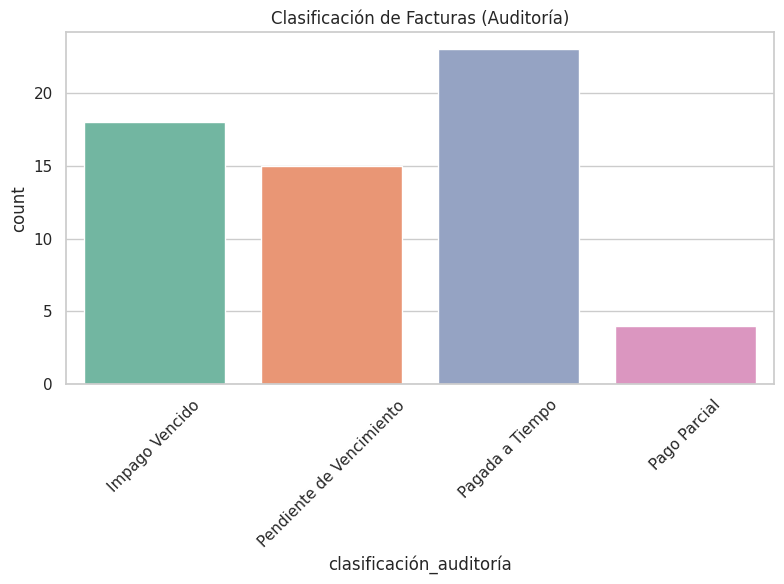

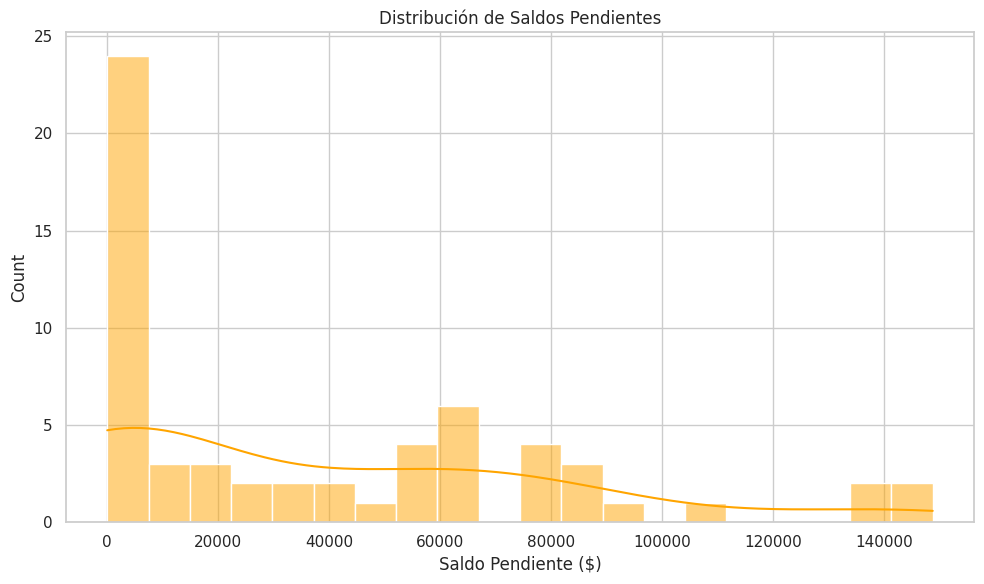

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Cargar dataset desde GitHub ---
url = "https://raw.githubusercontent.com/Viny2030/mi_proyecto/refs/heads/main/listado_cuentas_a_cobrar.csv"

try:
    df = pd.read_csv(url)
    print("✅ Datos cargados correctamente.")
except Exception as e:
    print(f"❌ Error al cargar el archivo: {e}")
    exit()

# --- 2. Convertir fechas ---
df['fecha_emision'] = pd.to_datetime(df['fecha_emision'], errors='coerce')
df['fecha_vencimiento'] = pd.to_datetime(df['fecha_vencimiento'], errors='coerce')
df['fecha_pago'] = pd.to_datetime(df['fecha_pago'], errors='coerce')

# --- 3. Clasificación de estado de cuenta ---
auditoría = []

for idx, row in df.iterrows():
    estado = row['estado']
    monto_total = row['monto_total']
    monto_pagado = row['monto_pagado']
    saldo = row['saldo_pendiente']
    vencimiento = row['fecha_vencimiento']
    pago = row['fecha_pago']

    if pd.isna(pago) and estado == "Vencida":
        clasificacion = "Impago Vencido"
    elif estado == "Pagada" and not pd.isna(pago):
        if pago > vencimiento:
            clasificacion = "Pagada Fuera de Término"
        else:
            clasificacion = "Pagada a Tiempo"
    elif monto_pagado > 0 and saldo > 0:
        clasificacion = "Pago Parcial"
    elif estado == "Pendiente" and pd.isna(pago):
        clasificacion = "Pendiente de Vencimiento"
    else:
        clasificacion = "Otro"

    auditoría.append({
        'factura_id': row['factura_id'],
        'cliente_id': row['cliente_id'],
        'nombre': row['nombre'],
        'fecha_emision': row['fecha_emision'],
        'fecha_vencimiento': row['fecha_vencimiento'],
        'fecha_pago': row['fecha_pago'],
        'monto_total': monto_total,
        'monto_pagado': monto_pagado,
        'saldo_pendiente': saldo,
        'estado': estado,
        'clasificación_auditoría': clasificacion
    })

audit_df = pd.DataFrame(auditoría)

# --- 4. Resumen ---
print("\n✅ Resumen por clasificación:")
print(audit_df['clasificación_auditoría'].value_counts())

# --- 5. Detalle de casos críticos ---
print("\n📌 Casos de 'Impago Vencido':")
print(audit_df[audit_df['clasificación_auditoría'] == 'Impago Vencido'][[
    'factura_id', 'nombre', 'fecha_vencimiento', 'monto_total', 'saldo_pendiente'
]].to_string(index=False))

print("\n📌 Casos de 'Pagada Fuera de Término':")
print(audit_df[audit_df['clasificación_auditoría'] == 'Pagada Fuera de Término'][[
    'factura_id', 'nombre', 'fecha_vencimiento', 'fecha_pago', 'monto_total'
]].to_string(index=False))

# --- 6. Gráfico de clasificación ---
plt.figure(figsize=(8, 6))
sns.countplot(data=audit_df, x='clasificación_auditoría', palette='Set2')
plt.title("Clasificación de Facturas (Auditoría)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("grafico_cuentas_a_cobrar.png")
print("📊 Guardado: grafico_cuentas_a_cobrar.png")

# --- 7. Gráfico de saldos pendientes ---
plt.figure(figsize=(10, 6))
sns.histplot(audit_df['saldo_pendiente'], bins=20, kde=True, color='orange')
plt.title("Distribución de Saldos Pendientes")
plt.xlabel("Saldo Pendiente ($)")
plt.tight_layout()
plt.savefig("grafico_saldos_pendientes.png")
print("📊 Guardado: grafico_saldos_pendientes.png")

# --- 8. Exportar ---
audit_df.to_csv("resultado_auditoria_cuentas_cobrar.csv", index=False)
print("📁 Exportado: resultado_auditoria_cuentas_cobrar.csv")


###BIENES DE USO

## Algoritmo IV-maquinas

Error al cargar el DataFrame desde la URL: HTTP Error 404: Not Found
Asegúrate de que la URL sea correcta y el archivo exista. Saliendo del script.
--- Encabezado Inicial del DataFrame ---
  id_equipo           tipo_equipo                           descripcion  \
0   EQ-1000             Fresadora             Fresadora modelo oiV-1043   
1   EQ-1001             Fresadora             Fresadora modelo cbf-8196   
2   EQ-1002                Camión                Camión modelo mTP-8908   
3   EQ-1003         Soldadora MIG         Soldadora MIG modelo rZa-6379   
4   EQ-1004  Impresora industrial  Impresora industrial modelo jnW-2654   

                 ubicacion         estado fecha_adquisicion  \
0                 Planta A  En reparación        2016-06-10   
1                 Planta A      Operativo        2017-06-27   
2                 Planta B      Operativo        2021-10-31   
3  Taller de Mantenimiento      Operativo        2022-05-08   
4  Taller de Mantenimiento      Operativo    

/tmp/ipython-input-13-2549792247.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valor_total_por_tipo.index, y=valor_total_por_tipo.values, palette='viridis')


<Figure size 1200x800 with 0 Axes>

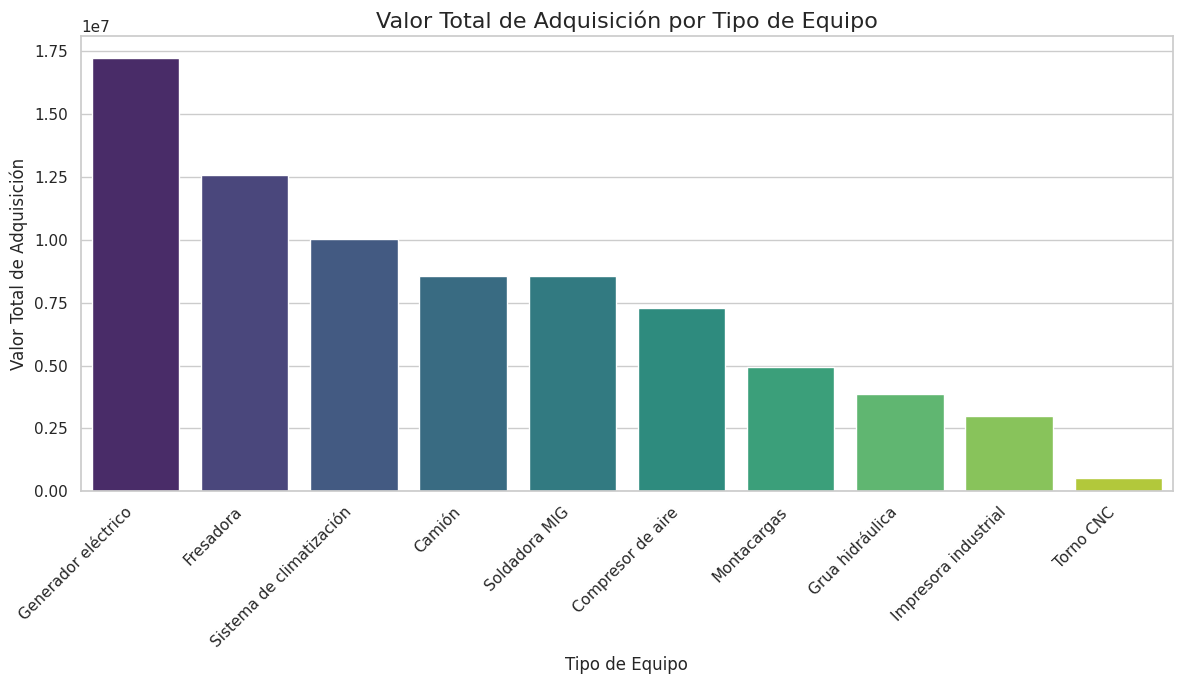

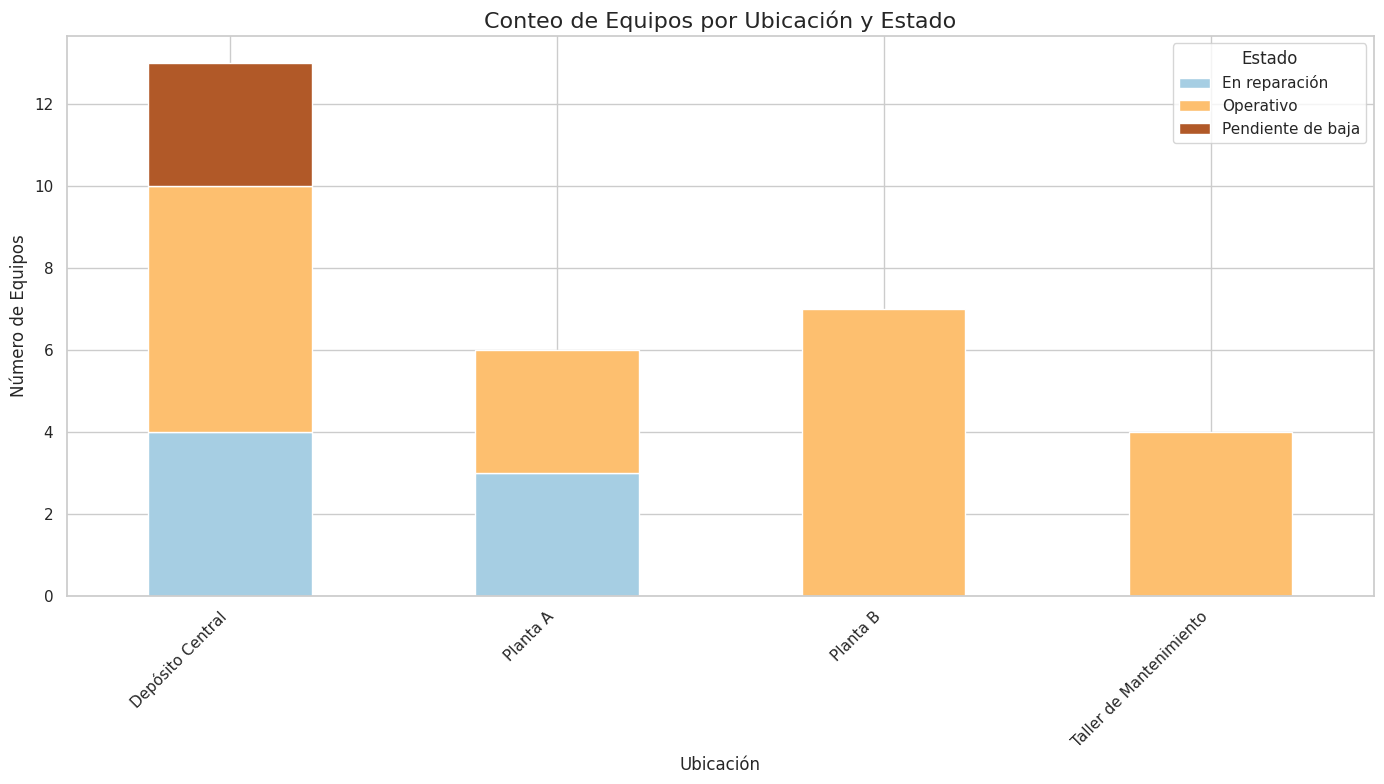

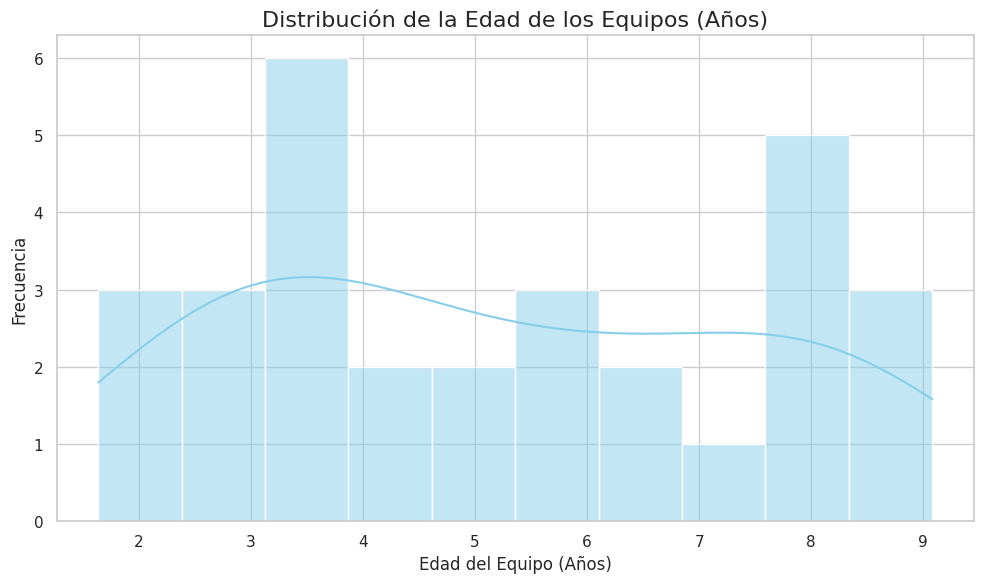

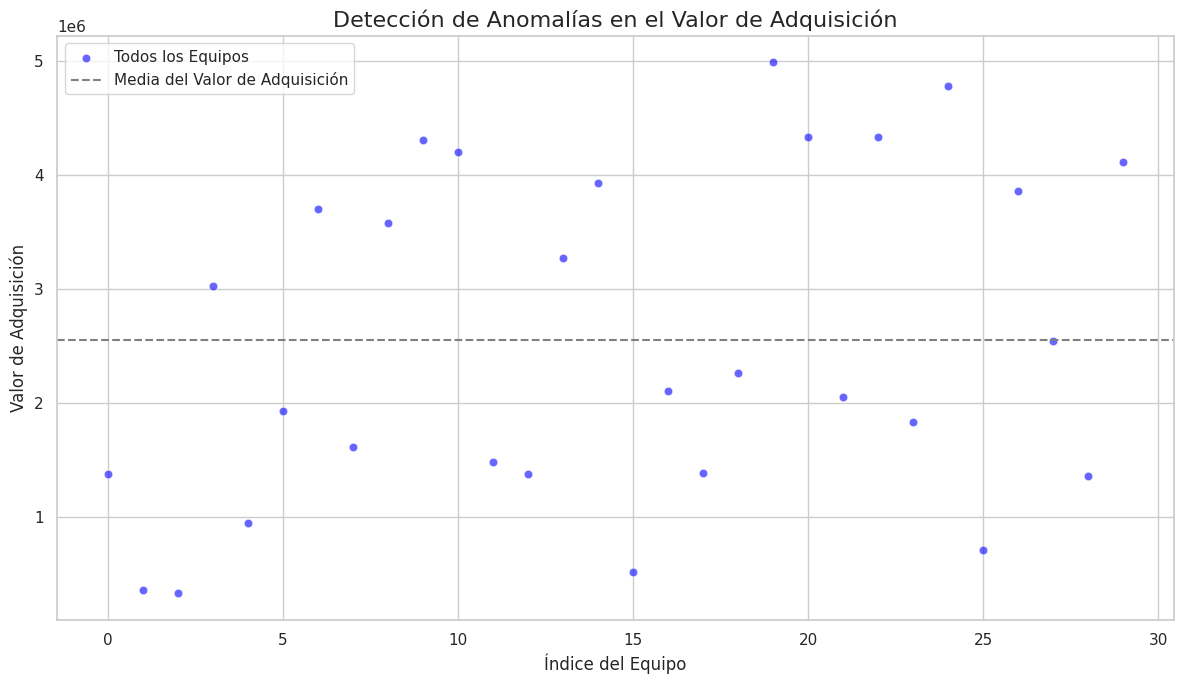


Análisis, aplicación de algoritmos básicos y generación de gráficos completados.


In [ ]:
import pandas as pd
from datetime import datetime
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Carga del DataFrame ---
# Cargar el DataFrame desde la URL de tu GitHub
# ¡Importante! Asegúrate de que esta URL sea la URL 'raw' (cruda) de tu archivo CSV en GitHub.
# NOTA: Reemplaza "username" y "repository" con los valores correctos de tu repositorio.
url = "https://raw.githubusercontent.com/username/repository/main/inventario_maquinarias.csv"
try:
    df = pd.read_csv(url)
    print("DataFrame cargado exitosamente.\n")
except Exception as e:
    print(f"Error al cargar el DataFrame desde la URL: {e}")
    print("Asegúrate de que la URL sea correcta y el archivo exista. Saliendo del script.")
    exit()

# Mostrar las primeras filas y la información del DataFrame para verificar la carga
print("--- Encabezado Inicial del DataFrame ---")
print(df.head())
print("\n--- Información del DataFrame (Tipos de Datos Originales) ---")
df.info()

# --- 2. Limpieza y Preprocesamiento de Datos ---

# Convertir columnas de fecha a tipo datetime
print("\n--- Preprocesamiento de Datos: Conversión de Fechas ---")
df['fecha_adquisicion'] = pd.to_datetime(df['fecha_adquisicion'])
df['fecha_fin_vida_util'] = pd.to_datetime(df['fecha_fin_vida_util'])

print("\n--- Información del DataFrame (Tipos de Datos Después de Conversión) ---")
df.info()
print("\n--- Muestra de Filas con Fechas Convertidas ---")
print(df[['id_equipo', 'fecha_adquisicion', 'fecha_fin_vida_util']].head())

# --- 3. Estadísticas Descriptivas y Agregación ---

print("\n" + "="*70)
print("--- Análisis de Estadísticas Descriptivas y Agregación ---")

# a) Distribución del Valor Total de Adquisición por Tipo de Equipo
print("\n--- Valor Total de Adquisición por Tipo de Equipo ---")
valor_total_por_tipo = df.groupby('tipo_equipo')['valor_adquisicion'].sum().sort_values(ascending=False)
print(valor_total_por_tipo)

# b) Conteo de Equipos por Ubicación y Estado Operativo
print("\n--- Conteo de Equipos por Ubicación y Estado ---")
conteo_por_ubicacion_estado = df.groupby(['ubicacion', 'estado']).size().unstack(fill_value=0)
print(conteo_por_ubicacion_estado)

# c) Estadísticas Descriptivas para el Valor de Adquisición
print("\n--- Estadísticas Descriptivas del Valor de Adquisición ---")
print(df['valor_adquisicion'].describe())

# --- 4. Análisis de Series de Tiempo (Básico) ---

print("\n" + "="*70)
print("--- Análisis Temporal del Inventario ---")

# Definir una fecha actual para los cálculos (usando la fecha actual del contexto)
# La fecha actual es Jueves, 10 de julio de 2025.
fecha_actual_referencia = datetime(2025, 7, 10)

# a) Calcular la Edad del Equipo (en años)
df['edad_anios'] = ((fecha_actual_referencia - df['fecha_adquisicion']).dt.days / 365.25).round(2)
print(f"\n--- Edad del Equipo (a la fecha de {fecha_actual_referencia.strftime('%Y-%m-%d')}) ---")
print(df[['id_equipo', 'fecha_adquisicion', 'edad_anios']].head())

# b) Calcular la Vida Útil Restante (en años)
df['vida_util_restante_anios'] = ((df['fecha_fin_vida_util'] - fecha_actual_referencia).dt.days / 365.25).round(2)

# Asegurarse de que la vida útil restante no sea negativa (equipos cuya vida útil ya terminó)
df.loc[df['vida_util_restante_anios'] < 0, 'vida_util_restante_anios'] = 0

print(f"\n--- Vida Útil Restante del Equipo (a la fecha de {fecha_actual_referencia.strftime('%Y-%m-%d')}) ---")
print(df[['id_equipo', 'fecha_fin_vida_util', 'vida_util_restante_anios']].head())

# Equipos con vida útil restante muy baja o terminada (ej. <= 1 año)
equipos_proximos_baja = df[df['vida_util_restante_anios'] <= 1].sort_values(by='vida_util_restante_anios')
print("\n--- Equipos con 1 año o menos de Vida Útil Restante ---")
if not equipos_proximos_baja.empty:
    print(equipos_proximos_baja[['id_equipo', 'tipo_equipo', 'estado', 'fecha_fin_vida_util', 'vida_util_restante_anios']])
else:
    print("No hay equipos con 1 año o menos de vida útil restante.")


# --- 5. Detección Simple de Anomalías ---

print("\n" + "="*70)
print("--- Detección Simple de Anomalías (Valor de Adquisición) ---")

# Calcular el Z-score para 'valor_adquisicion'
df['valor_adquisicion_zscore'] = zscore(df['valor_adquisicion'])

# Identificar valores atípicos (por ejemplo, Z-score mayor a 3 o menor a -3)
umbral_zscore = 3
anomalias_valor = df[(df['valor_adquisicion_zscore'] > umbral_zscore) | (df['valor_adquisicion_zscore'] < -umbral_zscore)]

print(f"\n--- Equipos con Valores de Adquisición Potencialmente Anómalos (Z-score > {umbral_zscore} o < -{umbral_zscore}) ---")
if not anomalias_valor.empty:
    print(anomalias_valor[['id_equipo', 'tipo_equipo', 'valor_adquisicion', 'valor_adquisicion_zscore', 'ubicacion', 'estado']])
else:
    print(f"No se encontraron anomalías significativas en el valor de adquisición con un Z-score > {umbral_zscore}.")


# --- 6. Visualización de Datos (Gráficos) ---

print("\n" + "="*70)
print("--- Generando Gráficos ---")

# Configuración general para los gráficos
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8)) # Tamaño general de la figura

# Gráfico 1: Valor Total de Adquisición por Tipo de Equipo
plt.figure(figsize=(12, 7))
sns.barplot(x=valor_total_por_tipo.index, y=valor_total_por_tipo.values, palette='viridis')
plt.title('Valor Total de Adquisición por Tipo de Equipo', fontsize=16)
plt.xlabel('Tipo de Equipo', fontsize=12)
plt.ylabel('Valor Total de Adquisición', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotar etiquetas para mejor lectura
plt.tight_layout() # Ajustar el diseño para que no se superpongan los elementos
plt.show()

# Gráfico 2: Conteo de Equipos por Ubicación y Estado
plt.figure(figsize=(14, 8))
conteo_por_ubicacion_estado.plot(kind='bar', stacked=True, colormap='Paired', ax=plt.gca())
plt.title('Conteo de Equipos por Ubicación y Estado', fontsize=16)
plt.xlabel('Ubicación', fontsize=12)
plt.ylabel('Número de Equipos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Estado')
plt.tight_layout()
plt.show()

# Gráfico 3: Distribución de la Edad de los Equipos (Histograma)
plt.figure(figsize=(10, 6))
sns.histplot(df['edad_anios'], bins=10, kde=True, color='skyblue')
plt.title('Distribución de la Edad de los Equipos (Años)', fontsize=16)
plt.xlabel('Edad del Equipo (Años)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico 4: Detección de Anomalías en Valor de Adquisición (Scatter Plot)
plt.figure(figsize=(12, 7))
sns.scatterplot(x=df.index, y='valor_adquisicion', data=df, label='Todos los Equipos', color='blue', alpha=0.6)
# Resaltar las anomalías
if not anomalias_valor.empty:
    sns.scatterplot(x=anomalias_valor.index, y='valor_adquisicion', data=anomalias_valor,
                    color='red', s=100, label='Anomalía Detectada', marker='X') # s es el tamaño del marcador
plt.axhline(df['valor_adquisicion'].mean(), color='gray', linestyle='--', label='Media del Valor de Adquisición')
plt.title('Detección de Anomalías en el Valor de Adquisición', fontsize=16)
plt.xlabel('Índice del Equipo', fontsize=12)
plt.ylabel('Valor de Adquisición', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("Análisis, aplicación de algoritmos básicos y generación de gráficos completados.")

### Algoritmo V-inmuebles

DataFrame de inmuebles cargado exitosamente.

--- Encabezado Inicial del DataFrame de Inmuebles ---
  id_inmueble      tipo_inmueble  \
0    INM-1000  Planta industrial   
1    INM-1001  Planta industrial   
2    INM-1002  Planta industrial   
3    INM-1003           Depósito   
4    INM-1004           Edificio   

                                           direccion             ciudad  \
0      Diagonal Rawson N° 844, Neuquén 8300, Neuquén            Rosario   
1  Diagonal 6 N° 64 Piso 5 Dto. 4, La Rioja 5300,...            Rosario   
2  Avenida Salta N° 7574, San Salvador de Jujuy 4...            Córdoba   
3   Calle 1 N° 155, Mar del Plata 7600, Buenos Aires            Mendoza   
4  Calle 6 N° 3987, San Ferando del Valle de Cata...  Gran Buenos Aires   

          estado fecha_adquisicion  valor_adquisicion  superficie_m2  
0       Inactivo        2008-02-02              70.60        3351.01  
1      Operativo        2015-03-08              43.99        3492.87  
2       Inactivo   

/tmp/ipython-input-1-4276522106.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valor_total_por_tipo_inmueble.index, y=valor_total_por_tipo_inmueble.values, palette='viridis')


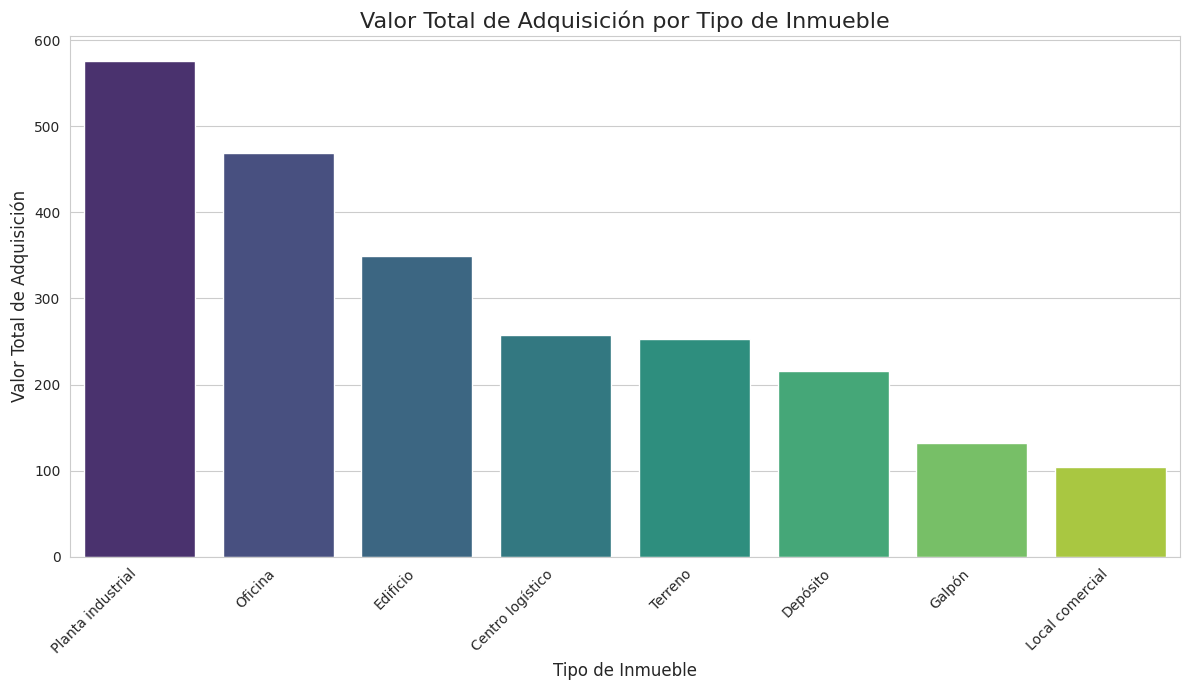

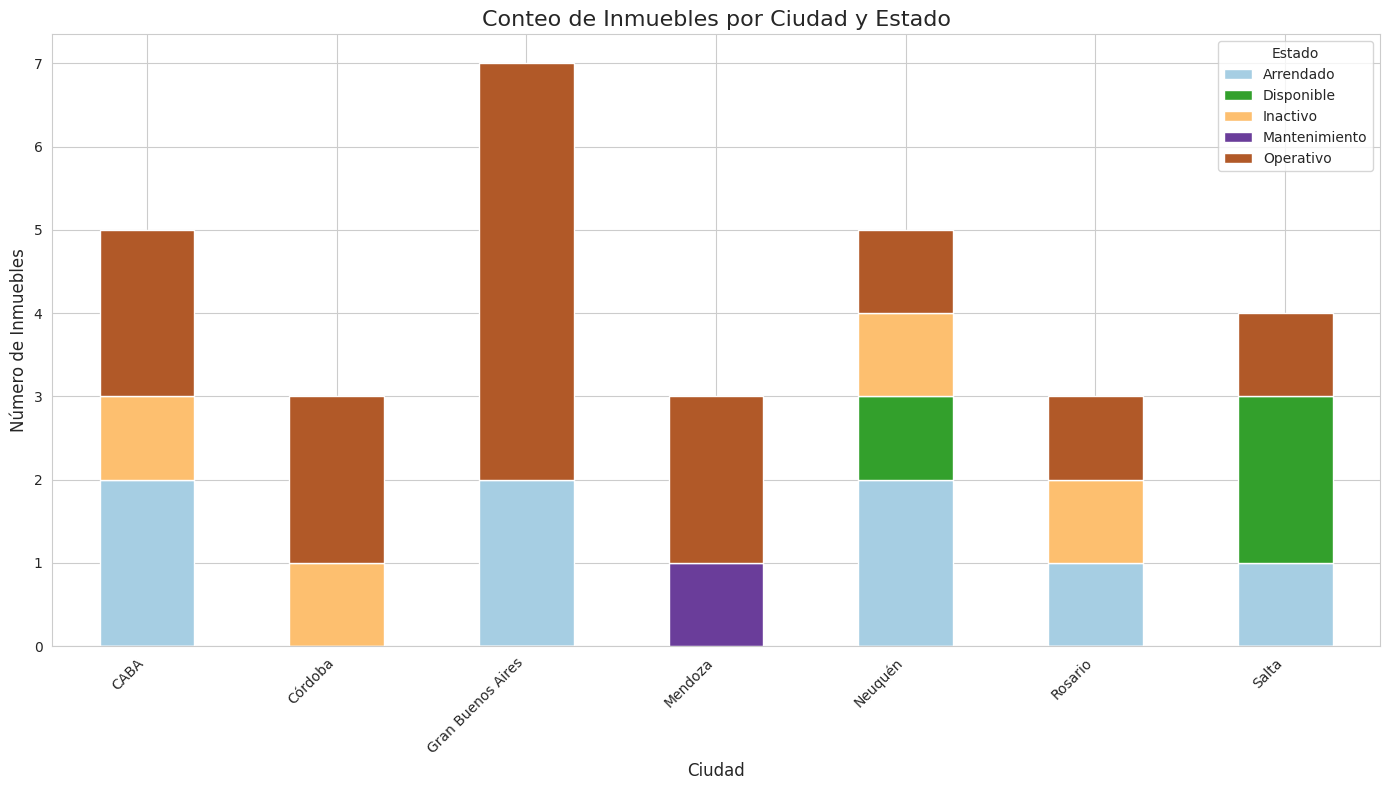

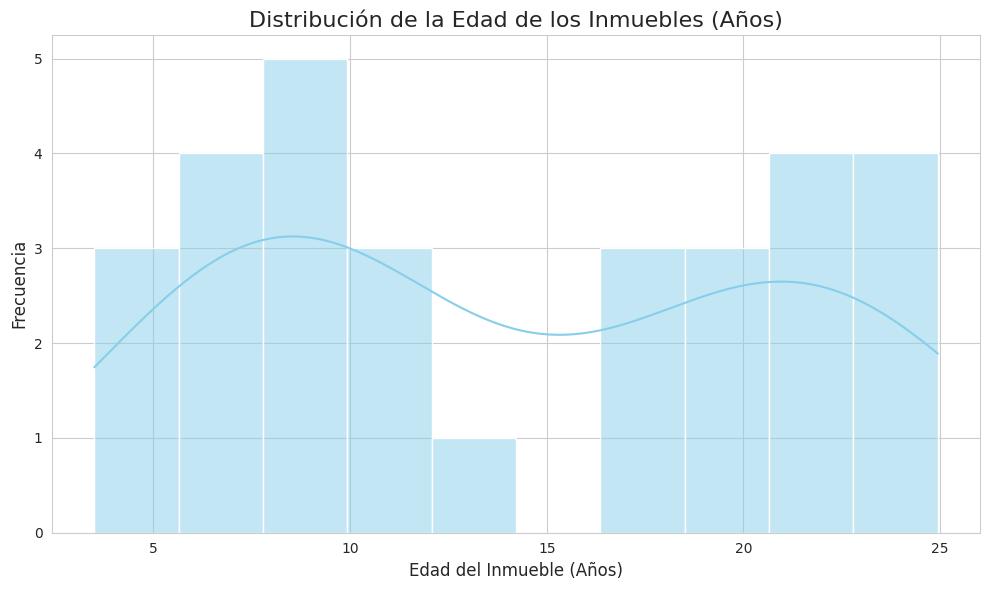

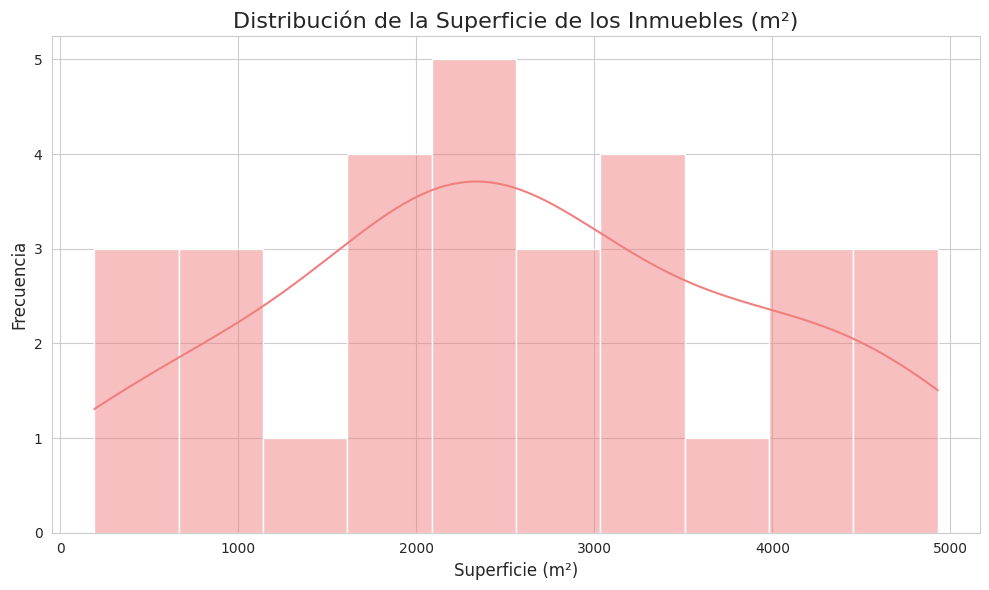

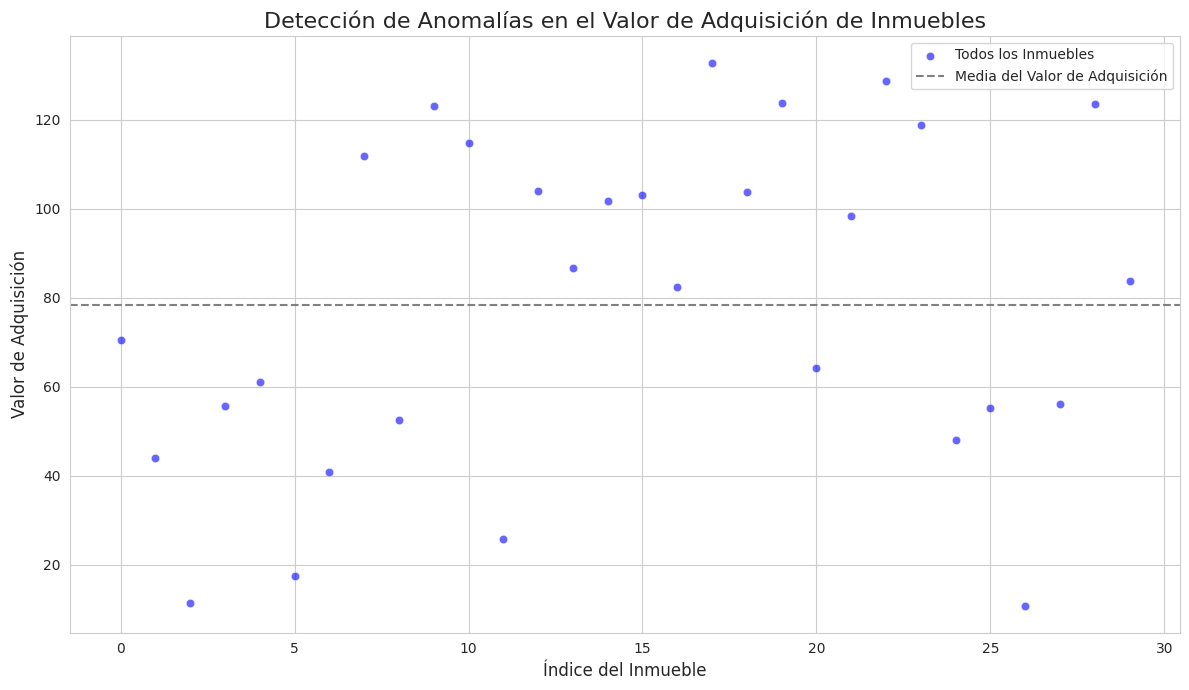

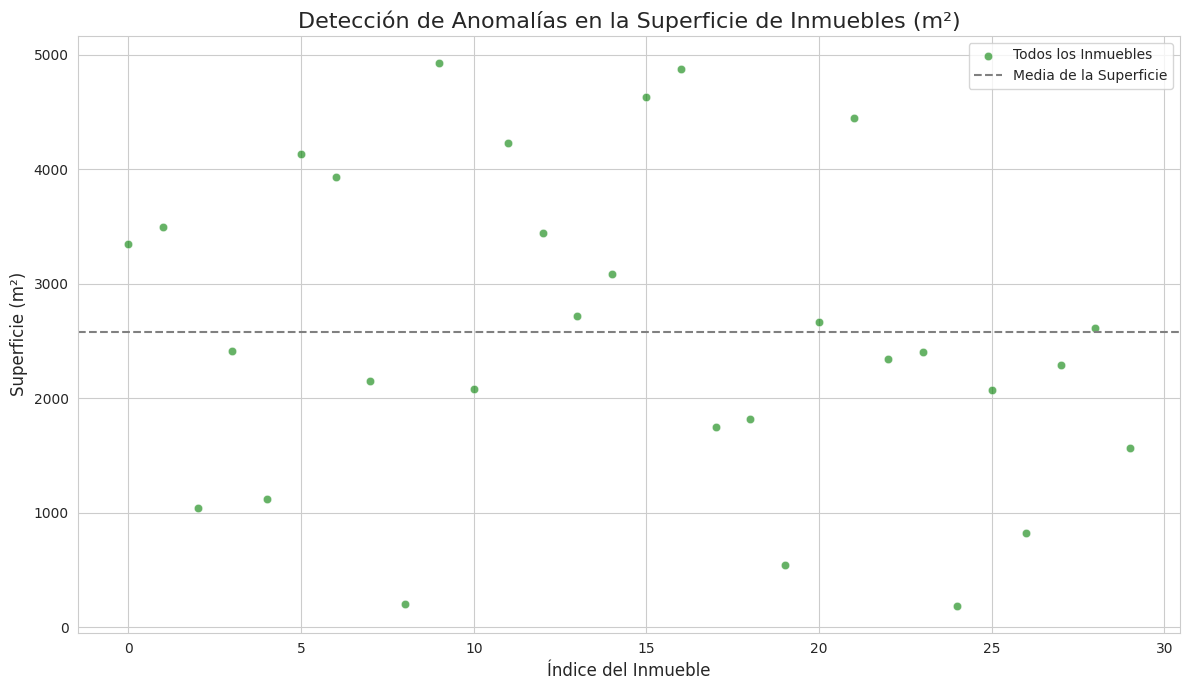


Análisis completo del inventario de inmuebles, incluyendo estadísticas, detección de anomalías y visualizaciones, ha sido ejecutado.


In [ ]:
import pandas as pd
from datetime import datetime
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Carga del DataFrame ---
# Cargar el DataFrame desde la URL de tu GitHub
# ¡Importante! Asegúrate de que esta URL sea la URL 'raw' (cruda) de tu archivo CSV en GitHub.
# NOTA: Reemplaza "username" y "repository" con los valores correctos de tu repositorio.
url_inmuebles = "https://raw.githubusercontent.com/Viny2030/mi_proyecto/refs/heads/main/inventario_inmuebles.csv"
try:
    df_inmuebles = pd.read_csv(url_inmuebles)
    print("DataFrame de inmuebles cargado exitosamente.\n")
except Exception as e:
    print(f"Error al cargar el DataFrame de inmuebles desde la URL: {e}")
    print("Asegúrate de que la URL sea correcta y el archivo exista. Saliendo del script.")
    exit()

# Mostrar las primeras filas y la información del DataFrame para verificar la carga
print("--- Encabezado Inicial del DataFrame de Inmuebles ---")
print(df_inmuebles.head())
print("\n--- Información del DataFrame de Inmuebles (Tipos de Datos Originales) ---")
df_inmuebles.info()

# --- 2. Limpieza y Preprocesamiento de Datos ---

# Convertir la columna de fecha de adquisición a tipo datetime
print("\n--- Preprocesamiento de Datos: Conversión de Fechas ---")
df_inmuebles['fecha_adquisicion'] = pd.to_datetime(df_inmuebles['fecha_adquisicion'])

print("\n--- Información del DataFrame de Inmuebles (Tipos de Datos Después de Conversión) ---")
df_inmuebles.info()
print("\n--- Muestra de Filas con Fechas Convertidas ---")
print(df_inmuebles[['id_inmueble', 'fecha_adquisicion']].head())

# --- 3. Estadísticas Descriptivas y Agregación ---

print("\n" + "="*70)
print("--- Análisis de Estadísticas Descriptivas y Agregación de Inmuebles ---")

# a) Distribución del Valor Total de Adquisición por Tipo de Inmueble
print("\n--- Valor Total de Adquisición por Tipo de Inmueble ---")
valor_total_por_tipo_inmueble = df_inmuebles.groupby('tipo_inmueble')['valor_adquisicion'].sum().sort_values(ascending=False)
print(valor_total_por_tipo_inmueble)

# b) Conteo de Inmuebles por Ciudad y Estado
print("\n--- Conteo de Inmuebles por Ciudad y Estado ---")
conteo_por_ciudad_estado = df_inmuebles.groupby(['ciudad', 'estado']).size().unstack(fill_value=0)
print(conteo_por_ciudad_estado)

# c) Estadísticas Descriptivas para el Valor de Adquisición
print("\n--- Estadísticas Descriptivas del Valor de Adquisición ---")
print(df_inmuebles['valor_adquisicion'].describe())

# d) Estadísticas Descriptivas para la Superficie (m²)
print("\n--- Estadísticas Descriptivas de la Superficie (m²) ---")
print(df_inmuebles['superficie_m2'].describe())

# e) Superficie Total por Ciudad
print("\n--- Superficie Total (m²) por Ciudad ---")
superficie_total_por_ciudad = df_inmuebles.groupby('ciudad')['superficie_m2'].sum().sort_values(ascending=False)
print(superficie_total_por_ciudad)

# --- 4. Análisis Temporal del Inventario de Inmuebles ---

print("\n" + "="*70)
print("--- Análisis Temporal del Inventario de Inmuebles ---")

# Definir una fecha actual para los cálculos (usando la fecha actual del contexto)
# La fecha actual es Jueves, 10 de julio de 2025.
fecha_actual_referencia = datetime(2025, 7, 10)

# a) Calcular la Edad del Inmueble (en años)
df_inmuebles['edad_anios'] = ((fecha_actual_referencia - df_inmuebles['fecha_adquisicion']).dt.days / 365.25).round(2)
print(f"\n--- Edad del Inmueble (a la fecha de {fecha_actual_referencia.strftime('%Y-%m-%d')}) ---")
print(df_inmuebles[['id_inmueble', 'fecha_adquisicion', 'edad_anios']].head())

# --- 5. Detección Simple de Anomalías ---

print("\n" + "="*70)
print("--- Detección Simple de Anomalías en Inmuebles ---")

# a) Calcular el Z-score para 'valor_adquisicion'
df_inmuebles['valor_adquisicion_zscore'] = zscore(df_inmuebles['valor_adquisicion'])
umbral_zscore = 3
anomalias_valor_inmueble = df_inmuebles[(df_inmuebles['valor_adquisicion_zscore'] > umbral_zscore) | (df_inmuebles['valor_adquisicion_zscore'] < -umbral_zscore)]

print(f"\n--- Inmuebles con Valores de Adquisición Potencialmente Anómalos (Z-score > {umbral_zscore} o < -{umbral_zscore}) ---")
if not anomalias_valor_inmueble.empty:
    print(anomalias_valor_inmueble[['id_inmueble', 'tipo_inmueble', 'ciudad', 'valor_adquisicion', 'valor_adquisicion_zscore']])
else:
    print(f"No se encontraron anomalías significativas en el valor de adquisición con un Z-score > {umbral_zscore}.")

# b) Calcular el Z-score para 'superficie_m2'
df_inmuebles['superficie_m2_zscore'] = zscore(df_inmuebles['superficie_m2'])
anomalias_superficie_inmueble = df_inmuebles[(df_inmuebles['superficie_m2_zscore'] > umbral_zscore) | (df_inmuebles['superficie_m2_zscore'] < -umbral_zscore)]

print(f"\n--- Inmuebles con Superficies Potencialmente Anómalas (Z-score > {umbral_zscore} o < -{umbral_zscore}) ---")
if not anomalias_superficie_inmueble.empty:
    print(anomalias_superficie_inmueble[['id_inmueble', 'tipo_inmueble', 'ciudad', 'superficie_m2', 'superficie_m2_zscore']])
else:
    print(f"No se encontraron anomalías significativas en la superficie con un Z-score > {umbral_zscore}.")


# --- 6. Visualización de Datos (Gráficos) ---

print("\n" + "="*70)
print("--- Generando Gráficos para el Inventario de Inmuebles ---")

# Configuración general para los gráficos
sns.set_style("whitegrid")

# Gráfico 1: Valor Total de Adquisición por Tipo de Inmueble
plt.figure(figsize=(12, 7))
sns.barplot(x=valor_total_por_tipo_inmueble.index, y=valor_total_por_tipo_inmueble.values, palette='viridis')
plt.title('Valor Total de Adquisición por Tipo de Inmueble', fontsize=16)
plt.xlabel('Tipo de Inmueble', fontsize=12)
plt.ylabel('Valor Total de Adquisición', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico 2: Conteo de Inmuebles por Ciudad y Estado
plt.figure(figsize=(14, 8))
conteo_por_ciudad_estado.plot(kind='bar', stacked=True, colormap='Paired', ax=plt.gca())
plt.title('Conteo de Inmuebles por Ciudad y Estado', fontsize=16)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Número de Inmuebles', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Estado')
plt.tight_layout()
plt.show()

# Gráfico 3: Distribución de la Edad de los Inmuebles (Histograma)
plt.figure(figsize=(10, 6))
sns.histplot(df_inmuebles['edad_anios'], bins=10, kde=True, color='skyblue')
plt.title('Distribución de la Edad de los Inmuebles (Años)', fontsize=16)
plt.xlabel('Edad del Inmueble (Años)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico 4: Distribución de la Superficie (m²) de los Inmuebles (Histograma)
plt.figure(figsize=(10, 6))
sns.histplot(df_inmuebles['superficie_m2'], bins=10, kde=True, color='lightcoral')
plt.title('Distribución de la Superficie de los Inmuebles (m²)', fontsize=16)
plt.xlabel('Superficie (m²)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico 5: Detección de Anomalías en el Valor de Adquisición (Scatter Plot)
plt.figure(figsize=(12, 7))
sns.scatterplot(x=df_inmuebles.index, y='valor_adquisicion', data=df_inmuebles, label='Todos los Inmuebles', color='blue', alpha=0.6)
if not anomalias_valor_inmueble.empty:
    sns.scatterplot(x=anomalias_valor_inmueble.index, y='valor_adquisicion', data=anomalias_valor_inmueble,
                    color='red', s=100, label='Anomalía Detectada', marker='X')
plt.axhline(df_inmuebles['valor_adquisicion'].mean(), color='gray', linestyle='--', label='Media del Valor de Adquisición')
plt.title('Detección de Anomalías en el Valor de Adquisición de Inmuebles', fontsize=16)
plt.xlabel('Índice del Inmueble', fontsize=12)
plt.ylabel('Valor de Adquisición', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico 6: Detección de Anomalías en la Superficie (m²) (Scatter Plot)
plt.figure(figsize=(12, 7))
sns.scatterplot(x=df_inmuebles.index, y='superficie_m2', data=df_inmuebles, label='Todos los Inmuebles', color='green', alpha=0.6)
if not anomalias_superficie_inmueble.empty:
    sns.scatterplot(x=anomalias_superficie_inmueble.index, y='superficie_m2', data=anomalias_superficie_inmueble,
                    color='red', s=100, label='Anomalía Detectada', marker='X')
plt.axhline(df_inmuebles['superficie_m2'].mean(), color='gray', linestyle='--', label='Media de la Superficie')
plt.title('Detección de Anomalías en la Superficie de Inmuebles (m²)', fontsize=16)
plt.xlabel('Índice del Inmueble', fontsize=12)
plt.ylabel('Superficie (m²)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


print("\n" + "="*70)
print("Análisis completo del inventario de inmuebles, incluyendo estadísticas, detección de anomalías y visualizaciones, ha sido ejecutado.")

#### ACTIVOS NO CORRIENTES

### algoritmo VI-

DataFrame de otros activos no corrientes cargado exitosamente.

--- Encabezado Inicial del DataFrame de Otros Activos No Corrientes ---
  id_activo              tipo_activo  \
0  ANC-1000  Bienes de uso en desuso   
1  ANC-1001  Bienes de uso en desuso   
2  ANC-1002   Créditos a largo plazo   
3  ANC-1003  Inversiones permanentes   
4  ANC-1004     Licencias y patentes   

                                      descripcion moneda      estado  \
0     Licencia de software con vigencia extendida    USD   Revaluado   
1                  Inversión en empresa vinculada    USD  Depreciado   
2  Costo de instalación pendiente de amortización    ARS   Revaluado   
3              Activos intangibles no amortizados    USD  Depreciado   
4                  Inversión en empresa vinculada    EUR   Revaluado   

  fecha_registro  valor_millones  
0     2022-05-24           16.48  
1     2021-04-28           68.22  
2     2019-03-16           40.05  
3     2017-04-21           11.14  
4     2021-08-1

/tmp/ipython-input-1-3941578358.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valor_total_por_tipo_activo.index, y=valor_total_por_tipo_activo.values, palette='viridis')


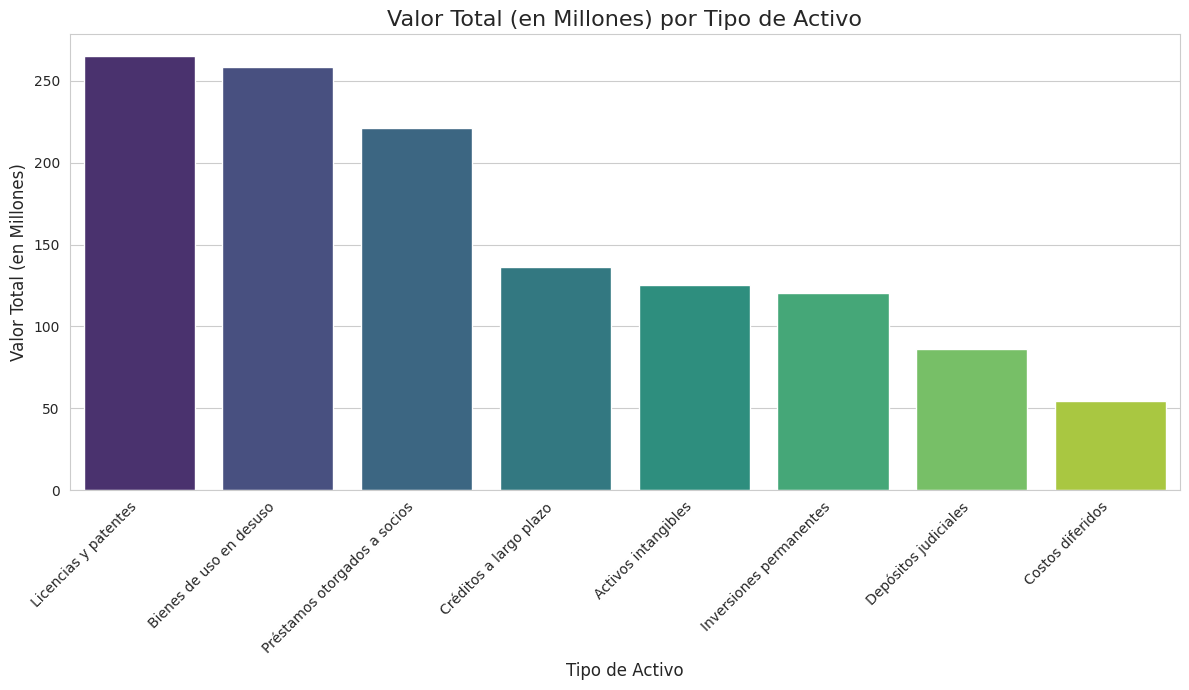

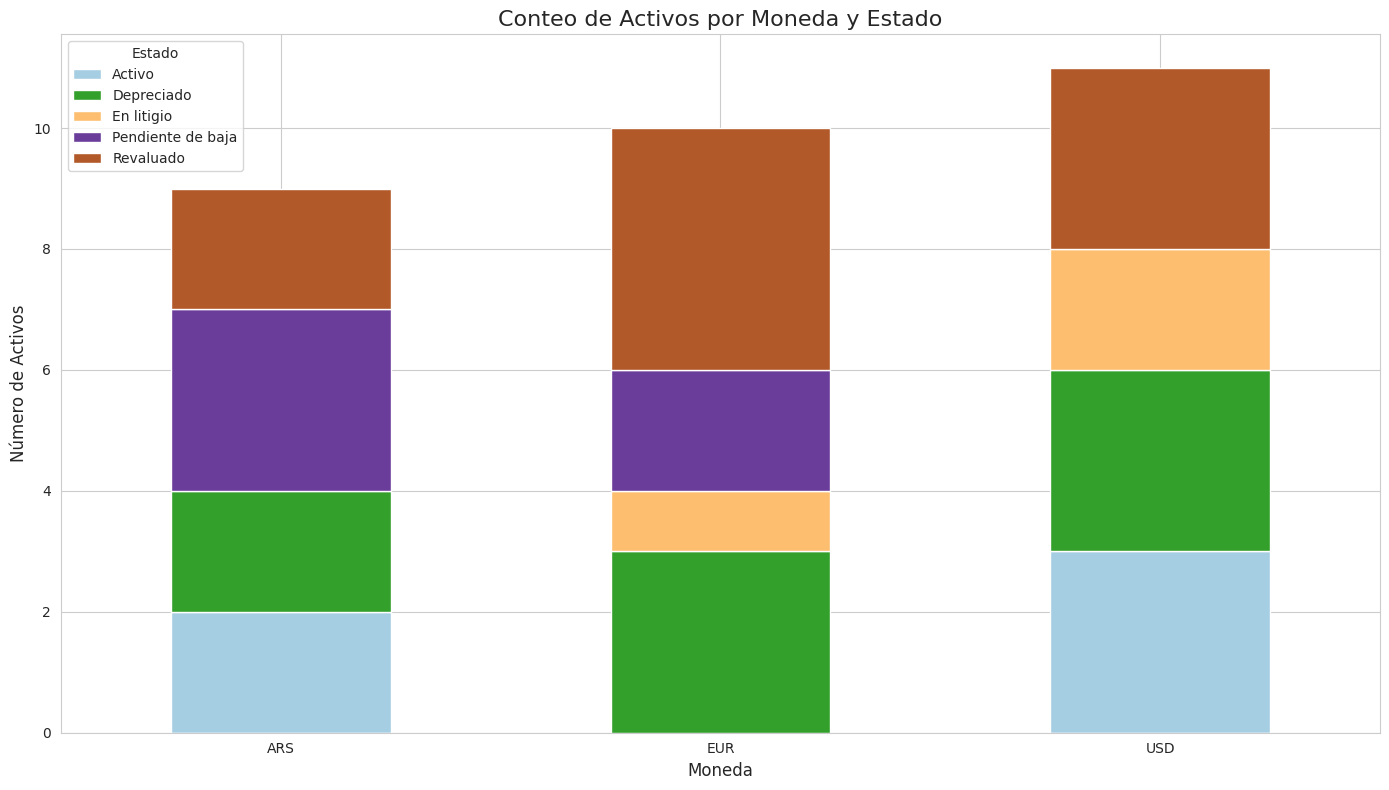

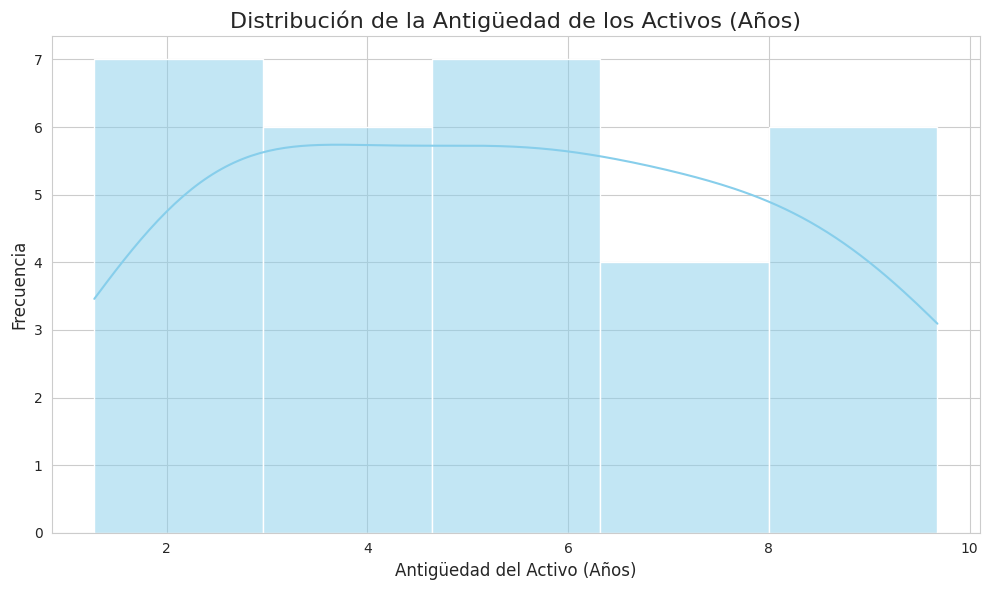

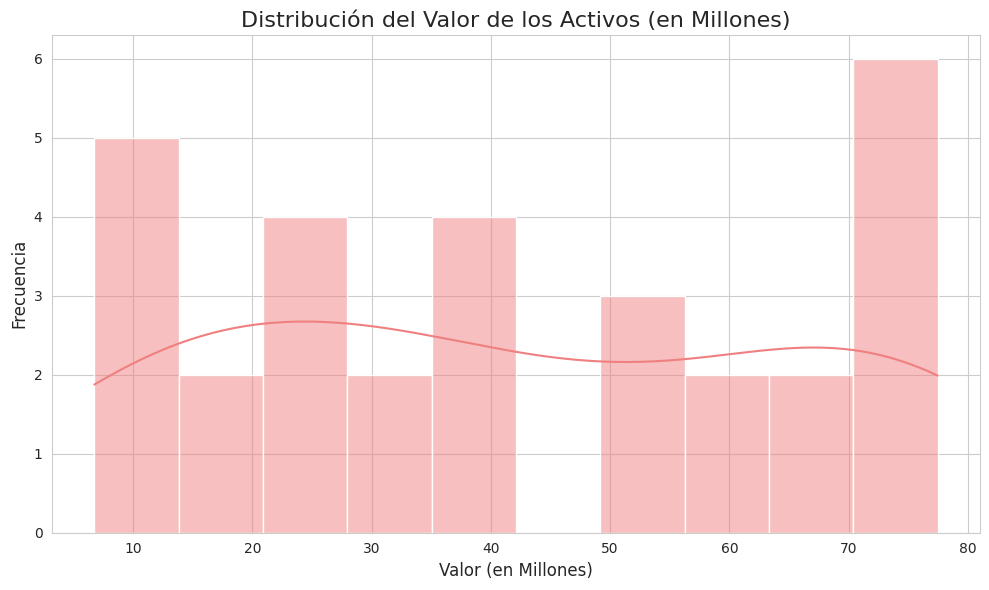

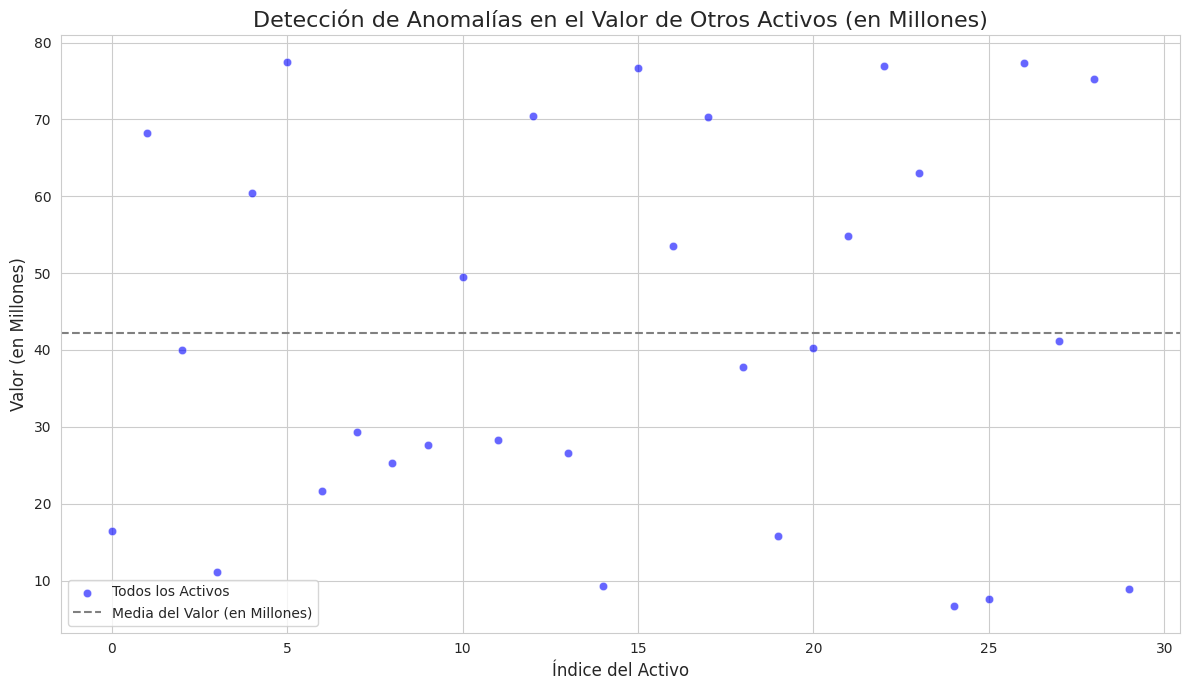


Análisis completo de otros activos no corrientes, incluyendo estadísticas, detección de anomalías y visualizaciones, ha sido ejecutado.


In [ ]:
import pandas as pd
from datetime import datetime
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Carga del DataFrame ---
# Cargar el DataFrame desde la URL de tu GitHub
# ¡Importante! Asegúrate de que esta URL sea la URL 'raw' (cruda) de tu archivo CSV en GitHub.
# NOTA: Reemplaza "username" y "repository" con los valores correctos de tu repositorio.
url_otros_activos = "https://raw.githubusercontent.com/Viny2030/mi_proyecto/refs/heads/main/otros_activos_no_corrientes.csv"
try:
    df_otros_activos = pd.read_csv(url_otros_activos)
    print("DataFrame de otros activos no corrientes cargado exitosamente.\n")
except Exception as e:
    print(f"Error al cargar el DataFrame de otros activos desde la URL: {e}")
    print("Asegúrate de que la URL sea correcta y el archivo exista. Saliendo del script.")
    exit()

# Mostrar las primeras filas y la información del DataFrame para verificar la carga
print("--- Encabezado Inicial del DataFrame de Otros Activos No Corrientes ---")
print(df_otros_activos.head())
print("\n--- Información del DataFrame de Otros Activos No Corrientes (Tipos de Datos Originales) ---")
df_otros_activos.info()

# --- 2. Limpieza y Preprocesamiento de Datos ---

# Convertir la columna 'fecha_registro' a tipo datetime
print("\n--- Preprocesamiento de Datos: Conversión de Fechas ---")
df_otros_activos['fecha_registro'] = pd.to_datetime(df_otros_activos['fecha_registro'])

print("\n--- Información del DataFrame de Otros Activos No Corrientes (Tipos de Datos Después de Conversión) ---")
df_otros_activos.info()
print("\n--- Muestra de Filas con Fechas Convertidas ---")
print(df_otros_activos[['id_activo', 'fecha_registro', 'valor_millones']].head())

# --- 3. Estadísticas Descriptivas y Agregación ---

print("\n" + "="*70)
print("--- Análisis de Estadísticas Descriptivas y Agregación de Otros Activos ---")

# a) Distribución del Valor Total por Tipo de Activo
print("\n--- Valor Total (en Millones) por Tipo de Activo ---")
valor_total_por_tipo_activo = df_otros_activos.groupby('tipo_activo')['valor_millones'].sum().sort_values(ascending=False)
print(valor_total_por_tipo_activo)

# b) Conteo de Activos por Moneda y Estado
print("\n--- Conteo de Activos por Moneda y Estado ---")
conteo_por_moneda_estado = df_otros_activos.groupby(['moneda', 'estado']).size().unstack(fill_value=0)
print(conteo_por_moneda_estado)

# c) Estadísticas Descriptivas para el Valor en Millones
print("\n--- Estadísticas Descriptivas del Valor (en Millones) ---")
print(df_otros_activos['valor_millones'].describe())

# d) Valor Total por Moneda
print("\n--- Valor Total (en Millones) por Moneda ---")
valor_total_por_moneda = df_otros_activos.groupby('moneda')['valor_millones'].sum().sort_values(ascending=False)
print(valor_total_por_moneda)

# --- 4. Análisis Temporal de Otros Activos ---

print("\n" + "="*70)
print("--- Análisis Temporal del Inventario de Otros Activos ---")

# Definir una fecha actual para los cálculos (usando la fecha actual del contexto)
fecha_actual_referencia = datetime(2025, 7, 10)

# a) Calcular la Antigüedad del Activo (en años)
df_otros_activos['antiguedad_anios'] = ((fecha_actual_referencia - df_otros_activos['fecha_registro']).dt.days / 365.25).round(2)
print(f"\n--- Antigüedad del Activo (a la fecha de {fecha_actual_referencia.strftime('%Y-%m-%d')}) ---")
print(df_otros_activos[['id_activo', 'fecha_registro', 'antiguedad_anios']].head())

# --- 5. Detección Simple de Anomalías ---

print("\n" + "="*70)
print("--- Detección Simple de Anomalías en Otros Activos ---")

# a) Calcular el Z-score para 'valor_millones'
df_otros_activos['valor_millones_zscore'] = zscore(df_otros_activos['valor_millones'])
umbral_zscore = 2.5 # Un umbral ligeramente más bajo para posibles anomalías
anomalias_valor_activos = df_otros_activos[(df_otros_activos['valor_millones_zscore'] > umbral_zscore) | (df_otros_activos['valor_millones_zscore'] < -umbral_zscore)]

print(f"\n--- Activos con Valores (en Millones) Potencialmente Anómalos (Z-score > {umbral_zscore} o < -{umbral_zscore}) ---")
if not anomalias_valor_activos.empty:
    print(anomalias_valor_activos[['id_activo', 'tipo_activo', 'moneda', 'valor_millones', 'valor_millones_zscore', 'estado']])
else:
    print(f"No se encontraron anomalías significativas en el valor de los activos con un Z-score > {umbral_zscore}.")


# --- 6. Visualización de Datos (Gráficos) ---

print("\n" + "="*70)
print("--- Generando Gráficos para Otros Activos No Corrientes ---")

# Configuración general para los gráficos
sns.set_style("whitegrid")

# Gráfico 1: Valor Total (en Millones) por Tipo de Activo
plt.figure(figsize=(12, 7))
sns.barplot(x=valor_total_por_tipo_activo.index, y=valor_total_por_tipo_activo.values, palette='viridis')
plt.title('Valor Total (en Millones) por Tipo de Activo', fontsize=16)
plt.xlabel('Tipo de Activo', fontsize=12)
plt.ylabel('Valor Total (en Millones)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico 2: Conteo de Activos por Moneda y Estado
plt.figure(figsize=(14, 8))
conteo_por_moneda_estado.plot(kind='bar', stacked=True, colormap='Paired', ax=plt.gca())
plt.title('Conteo de Activos por Moneda y Estado', fontsize=16)
plt.xlabel('Moneda', fontsize=12)
plt.ylabel('Número de Activos', fontsize=12)
plt.xticks(rotation=0) # No rotar si son pocas categorías
plt.legend(title='Estado')
plt.tight_layout()
plt.show()

# Gráfico 3: Distribución de la Antigüedad de los Activos (Histograma)
plt.figure(figsize=(10, 6))
sns.histplot(df_otros_activos['antiguedad_anios'], bins=5, kde=True, color='skyblue')
plt.title('Distribución de la Antigüedad de los Activos (Años)', fontsize=16)
plt.xlabel('Antigüedad del Activo (Años)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico 4: Distribución del Valor (en Millones) de los Activos (Histograma)
plt.figure(figsize=(10, 6))
sns.histplot(df_otros_activos['valor_millones'], bins=10, kde=True, color='lightcoral')
plt.title('Distribución del Valor de los Activos (en Millones)', fontsize=16)
plt.xlabel('Valor (en Millones)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico 5: Detección de Anomalías en el Valor (en Millones) (Scatter Plot)
plt.figure(figsize=(12, 7))
sns.scatterplot(x=df_otros_activos.index, y='valor_millones', data=df_otros_activos, label='Todos los Activos', color='blue', alpha=0.6)
if not anomalias_valor_activos.empty:
    sns.scatterplot(x=anomalias_valor_activos.index, y='valor_millones', data=anomalias_valor_activos,
                    color='red', s=100, label='Anomalía Detectada', marker='X')
plt.axhline(df_otros_activos['valor_millones'].mean(), color='gray', linestyle='--', label='Media del Valor (en Millones)')
plt.title('Detección de Anomalías en el Valor de Otros Activos (en Millones)', fontsize=16)
plt.xlabel('Índice del Activo', fontsize=12)
plt.ylabel('Valor (en Millones)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


print("\n" + "="*70)
print("Análisis completo de otros activos no corrientes, incluyendo estadísticas, detección de anomalías y visualizaciones, ha sido ejecutado.")

=000000000000000000000000000000000000000000000000  pasivo

Algoritmo -cuentas por pagar

DataFrame 'https://raw.githubusercontent.com/Viny2030/mi_proyecto/refs/heads/main/cuentas_por_pagar.csv' cargado exitosamente.

--- Encabezado Inicial del DataFrame de Cuentas por Pagar ---
  id_factura     proveedor fecha_emision fecha_vencimiento     monto moneda  \
0   INV-0000   Proveedor_3    2023-10-22        2025-08-09  46161.66    USD   
1   INV-0001  Proveedor_12    2024-11-11        2025-09-15  34393.25    USD   
2   INV-0002   Proveedor_4    2023-12-08        2025-03-06  27788.64    USD   
3   INV-0003  Proveedor_20    2025-04-09        2025-07-12  66607.97    ARS   
4   INV-0004   Proveedor_1    2024-07-14        2025-08-14  69637.62    ARS   

      estado  
0  Pendiente  
1  Pendiente  
2    Vencida  
3     Pagada  
4  Pendiente  

--- Información del DataFrame (Tipos de Datos Originales) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             -------

/tmp/ipython-input-1-476448400.py:92: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monto_por_rango_antiguedad = df_cuentas_pagar.groupby('rango_antiguedad')['monto'].sum().reindex(orden_antiguedad, fill_value=0)
/tmp/ipython-input-1-476448400.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monto_por_proveedor.head(10).index, y=monto_por_proveedor.head(10).values, palette='crest')


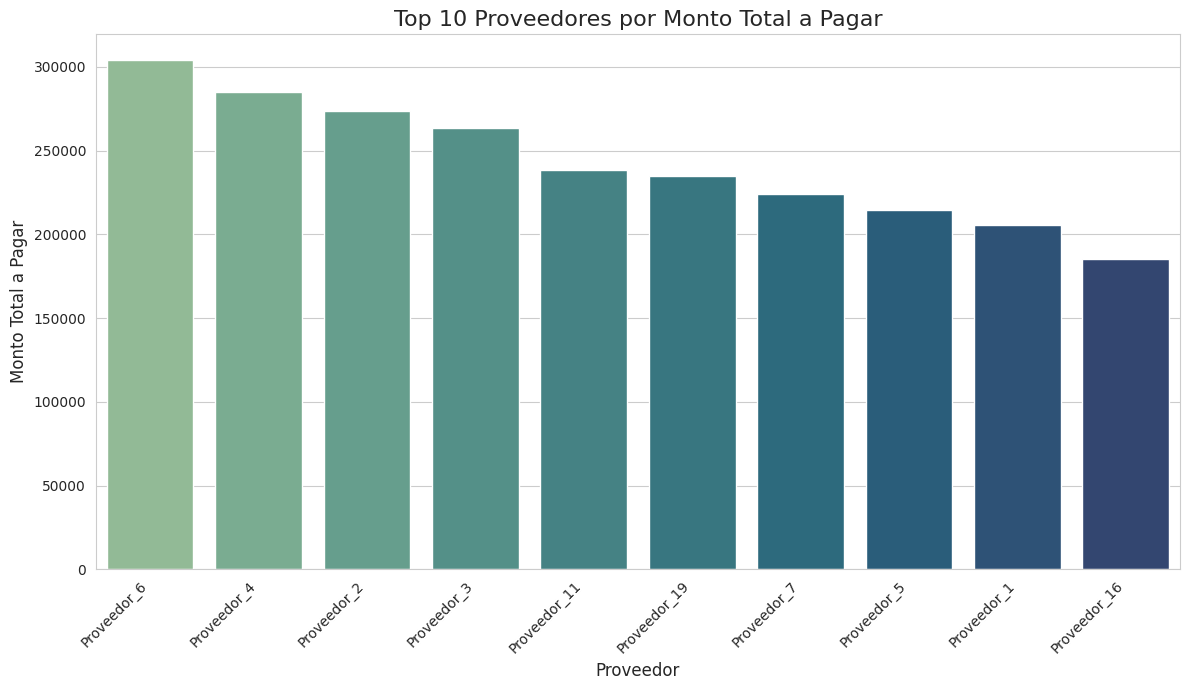

/tmp/ipython-input-1-476448400.py:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='estado', data=df_cuentas_pagar, palette='viridis', order=df_cuentas_pagar['estado'].value_counts().index)


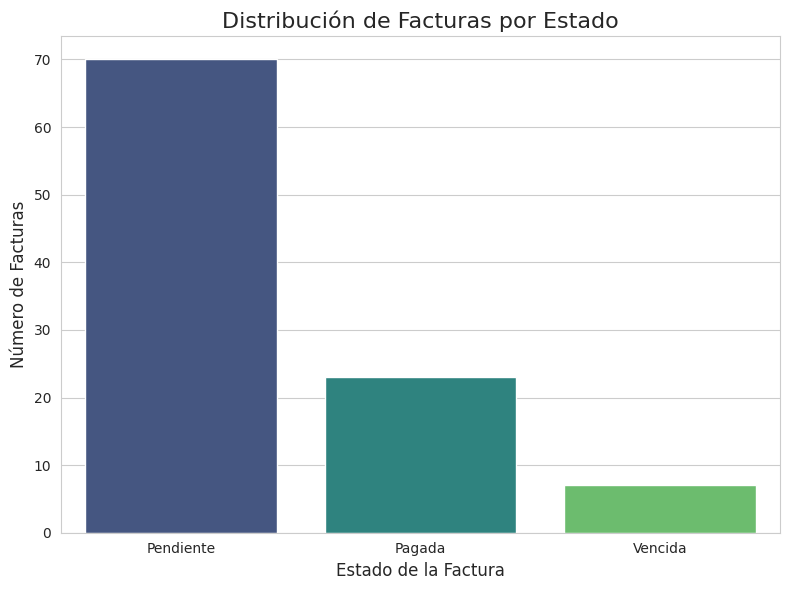

/tmp/ipython-input-1-476448400.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monto_total_por_estado.index, y=monto_total_por_estado.values, palette='magma')


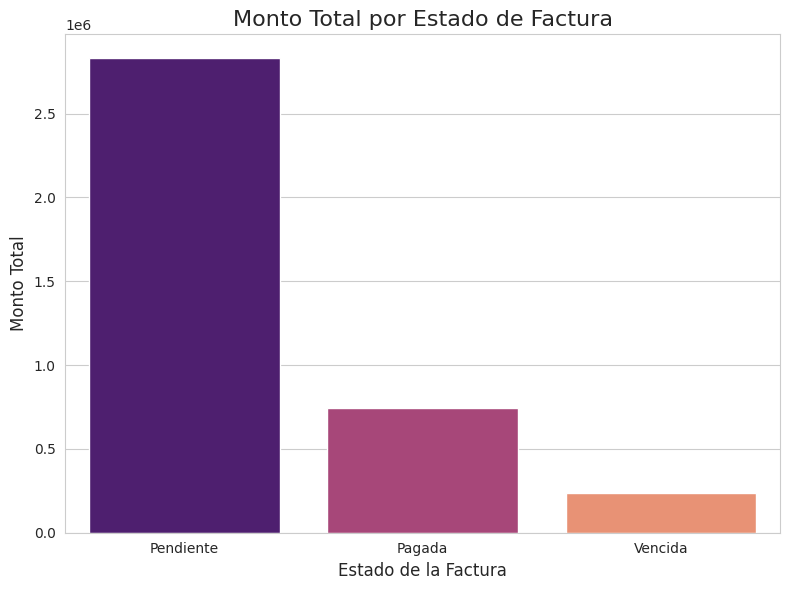

/tmp/ipython-input-1-476448400.py:151: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monto_por_rango_antiguedad.index, y=monto_por_rango_antiguedad.values, palette='rocket', order=orden_antiguedad)


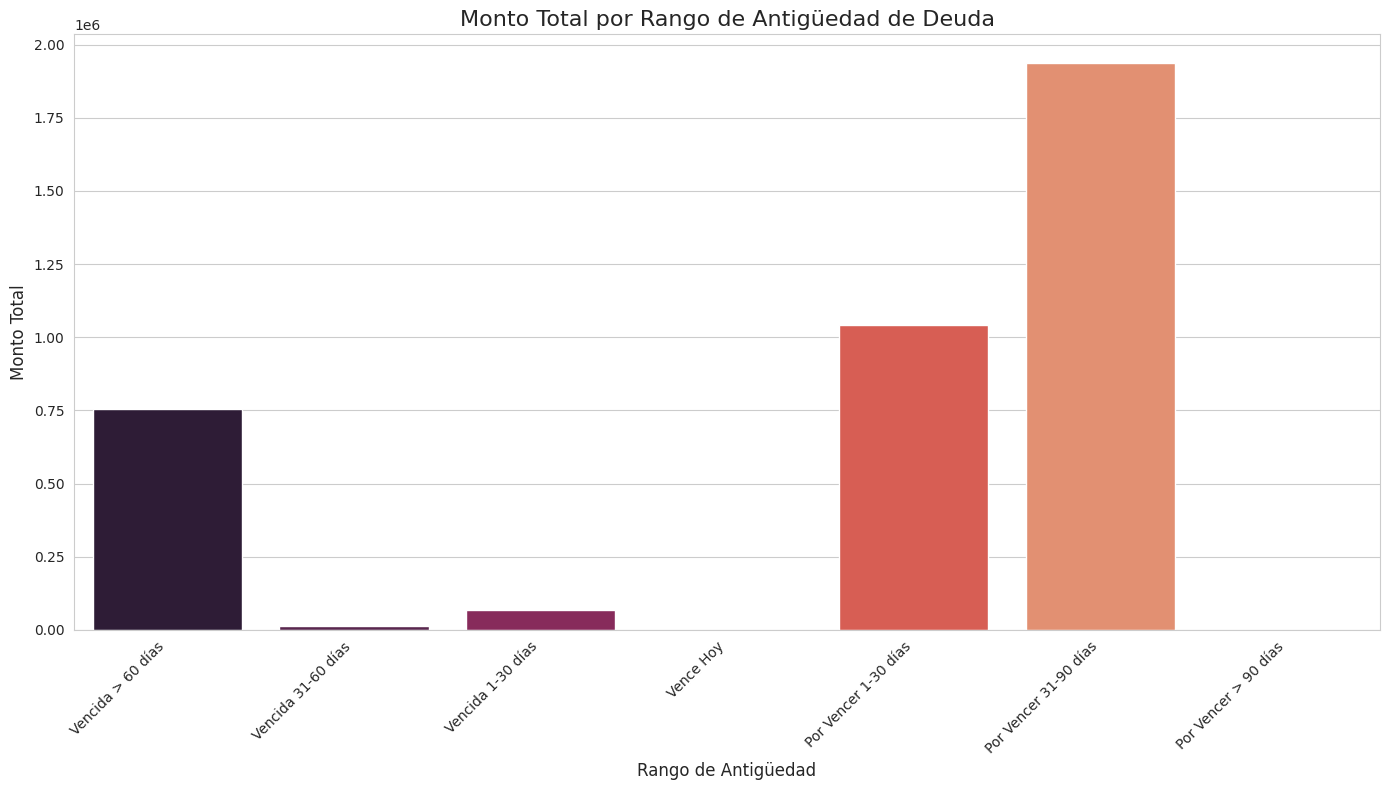

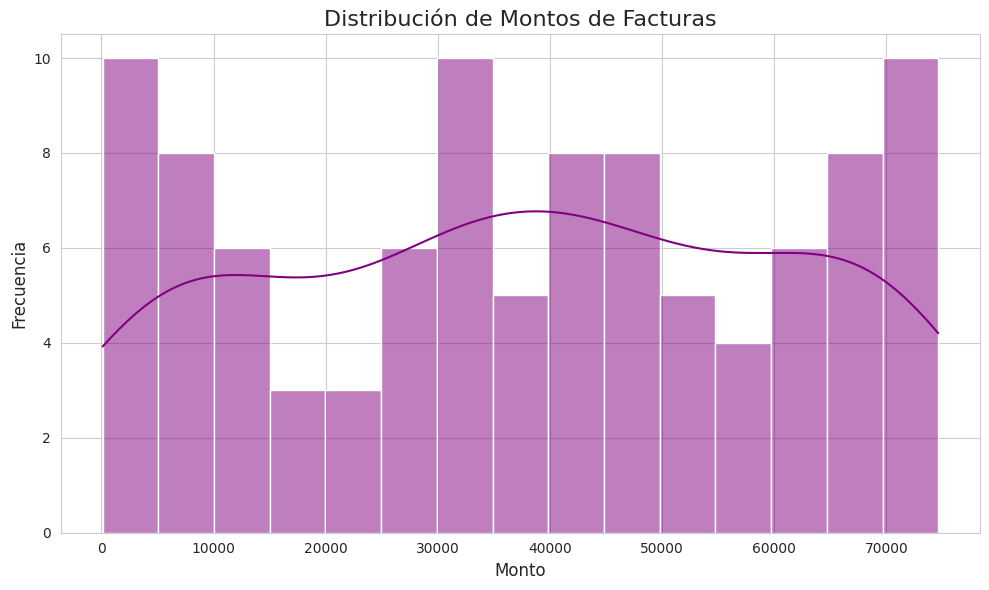

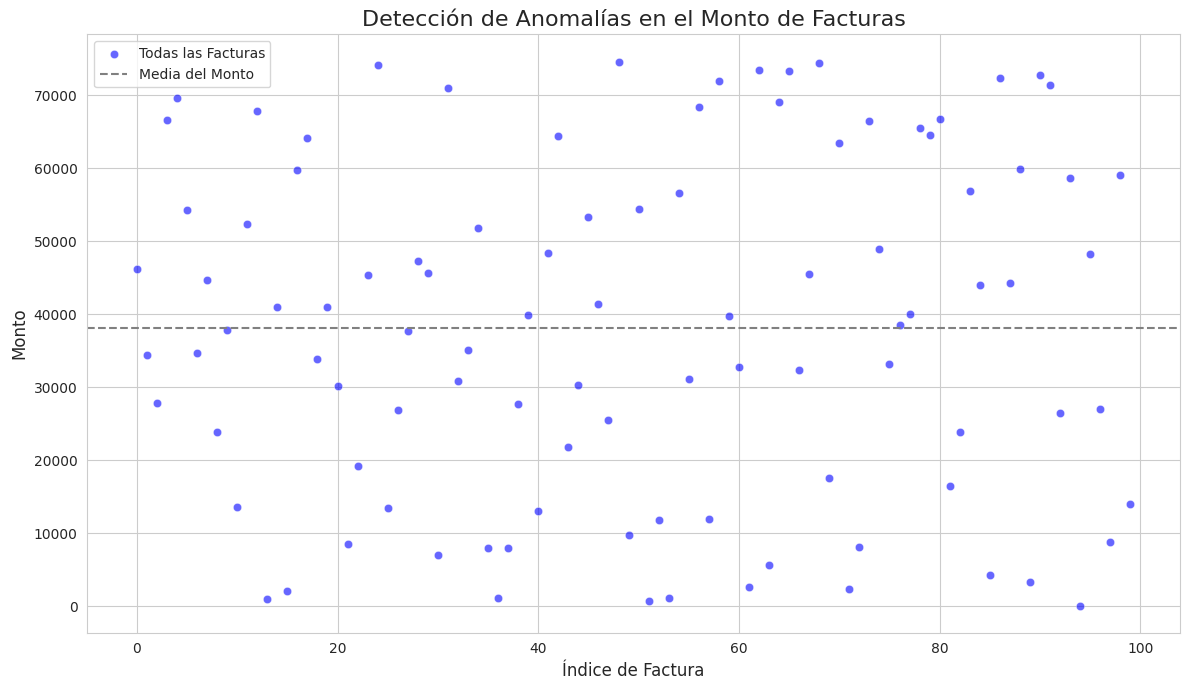


Análisis completo de cuentas por pagar, incluyendo estadísticas, análisis de antigüedad, detección de anomalías y visualizaciones, ha sido ejecutado.


In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://raw.githubusercontent.com/Viny2030/mi_proyecto/refs/heads/main/cuentas_por_pagar.csv"
nombre_archivo = (url)
# --- 1. Carga del DataFrame ---

try:
    df_cuentas_pagar = pd.read_csv(nombre_archivo)
    print(f"DataFrame '{nombre_archivo}' cargado exitosamente.\n")
except FileNotFoundError:
    print(f"Error: El archivo '{nombre_archivo}' no se encontró.")
    print("Asegúrate de que el archivo CSV esté en el mismo directorio que este script o proporciona la ruta completa.")
    exit()
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")
    exit()

# Mostrar las primeras filas y la información del DataFrame para verificar la carga
print("--- Encabezado Inicial del DataFrame de Cuentas por Pagar ---")
print(df_cuentas_pagar.head())
print("\n--- Información del DataFrame (Tipos de Datos Originales) ---")
df_cuentas_pagar.info()

# --- 2. Preprocesamiento de Datos ---

# Asegurarse de que las columnas de fecha sean tipo datetime
print("\n--- Preprocesamiento de Datos: Conversión de Fechas ---")
df_cuentas_pagar['fecha_emision'] = pd.to_datetime(df_cuentas_pagar['fecha_emision'])
df_cuentas_pagar['fecha_vencimiento'] = pd.to_datetime(df_cuentas_pagar['fecha_vencimiento'])

print("\n--- Información del DataFrame (después de conversión de fechas) ---")
df_cuentas_pagar.info()
print("\n--- Primeras filas del DataFrame con fechas convertidas ---")
print(df_cuentas_pagar[['id_factura', 'fecha_emision', 'fecha_vencimiento', 'monto']].head())

# --- 3. Estadísticas Descriptivas y Agregación ---

print("\n" + "="*70)
print("--- Análisis de Estadísticas Descriptivas y Agregación ---")

# a) Monto Total a Pagar por Proveedor
print("\n--- Monto Total a Pagar por Proveedor ---")
monto_por_proveedor = df_cuentas_pagar.groupby('proveedor')['monto'].sum().sort_values(ascending=False)
print(monto_por_proveedor.head(10)) # Mostrar los 10 principales

# b) Conteo de Facturas por Estado y Moneda
print("\n--- Conteo de Facturas por Estado y Moneda ---")
conteo_por_estado_moneda = df_cuentas_pagar.groupby(['estado', 'moneda']).size().unstack(fill_value=0)
print(conteo_por_estado_moneda)

# c) Monto Total por Estado
print("\n--- Monto Total por Estado ---")
monto_total_por_estado = df_cuentas_pagar.groupby('estado')['monto'].sum().sort_values(ascending=False)
print(monto_total_por_estado)

# d) Estadísticas Descriptivas del Monto
print("\n--- Estadísticas Descriptivas del Monto ---")
print(df_cuentas_pagar['monto'].describe())

# --- 4. Análisis de Antigüedad de Deudas ---

print("\n" + "="*70)
print("--- Análisis de Antigüedad de Deudas ---")

# Definir la fecha actual para el análisis de antigüedad (Julio 10, 2025)
fecha_actual_referencia = datetime(2025, 7, 10)

# Calcular días hasta/desde el vencimiento
df_cuentas_pagar['dias_hasta_vencimiento'] = (df_cuentas_pagar['fecha_vencimiento'] - fecha_actual_referencia).dt.days

# Categorizar la antigüedad de la deuda
# np.inf representa infinito, útil para rangos abiertos
bins = [-np.inf, -60, -30, -1, 0, 30, 90, np.inf]
labels = ['Vencida > 60 días', 'Vencida 31-60 días', 'Vencida 1-30 días',
          'Vence Hoy', 'Por Vencer 1-30 días', 'Por Vencer 31-90 días', 'Por Vencer > 90 días']
df_cuentas_pagar['rango_antiguedad'] = pd.cut(df_cuentas_pagar['dias_hasta_vencimiento'], bins=bins, labels=labels, right=False)

print("\n--- Distribución de Facturas por Rango de Antigüedad ---")
# Asegurarse de que todos los labels posibles estén presentes en el índice para un orden consistente
orden_antiguedad = ['Vencida > 60 días', 'Vencida 31-60 días', 'Vencida 1-30 días',
                    'Vence Hoy', 'Por Vencer 1-30 días', 'Por Vencer 31-90 días', 'Por Vencer > 90 días']
distribucion_antiguedad = df_cuentas_pagar['rango_antiguedad'].value_counts().reindex(orden_antiguedad, fill_value=0)
print(distribucion_antiguedad)

print("\n--- Monto Total por Rango de Antigüedad ---")
monto_por_rango_antiguedad = df_cuentas_pagar.groupby('rango_antiguedad')['monto'].sum().reindex(orden_antiguedad, fill_value=0)
print(monto_por_rango_antiguedad)


# --- 5. Detección Simple de Anomalías ---

print("\n" + "="*70)
print("--- Detección Simple de Anomalías (Monto) ---")

# Calcular el Z-score para 'monto'
df_cuentas_pagar['monto_zscore'] = zscore(df_cuentas_pagar['monto'])
umbral_zscore = 2.5 # Ajustar umbral si es necesario, 2.5 o 3 son comunes
anomalias_monto = df_cuentas_pagar[(df_cuentas_pagar['monto_zscore'] > umbral_zscore) | (df_cuentas_pagar['monto_zscore'] < -umbral_zscore)]

print(f"\n--- Facturas con Montos Potencialmente Anómalos (Z-score > {umbral_zscore} o < -{umbral_zscore}) ---")
if not anomalias_monto.empty:
    print(anomalias_monto[['id_factura', 'proveedor', 'monto', 'moneda', 'monto_zscore', 'estado']])
else:
    print(f"No se encontraron anomalías significativas en el monto con un Z-score > {umbral_zscore}.")


# --- 6. Visualización de Datos (Gráficos) ---

print("\n" + "="*70)
print("--- Generando Gráficos para Cuentas por Pagar ---")

sns.set_style("whitegrid")

# Gráfico 1: Monto Total a Pagar por los 10 Principales Proveedores
plt.figure(figsize=(12, 7))
sns.barplot(x=monto_por_proveedor.head(10).index, y=monto_por_proveedor.head(10).values, palette='crest')
plt.title('Top 10 Proveedores por Monto Total a Pagar', fontsize=16)
plt.xlabel('Proveedor', fontsize=12)
plt.ylabel('Monto Total a Pagar', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico 2: Conteo de Facturas por Estado
plt.figure(figsize=(8, 6))
sns.countplot(x='estado', data=df_cuentas_pagar, palette='viridis', order=df_cuentas_pagar['estado'].value_counts().index)
plt.title('Distribución de Facturas por Estado', fontsize=16)
plt.xlabel('Estado de la Factura', fontsize=12)
plt.ylabel('Número de Facturas', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico 3: Monto Total por Estado
plt.figure(figsize=(8, 6))
sns.barplot(x=monto_total_por_estado.index, y=monto_total_por_estado.values, palette='magma')
plt.title('Monto Total por Estado de Factura', fontsize=16)
plt.xlabel('Estado de la Factura', fontsize=12)
plt.ylabel('Monto Total', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico 4: Monto Total por Rango de Antigüedad de Deuda
plt.figure(figsize=(14, 8))
# Asegurarse de que el orden de las barras sea el de 'orden_antiguedad'
sns.barplot(x=monto_por_rango_antiguedad.index, y=monto_por_rango_antiguedad.values, palette='rocket', order=orden_antiguedad)
plt.title('Monto Total por Rango de Antigüedad de Deuda', fontsize=16)
plt.xlabel('Rango de Antigüedad', fontsize=12)
plt.ylabel('Monto Total', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico 5: Distribución de Montos (Histograma)
plt.figure(figsize=(10, 6))
sns.histplot(df_cuentas_pagar['monto'], bins=15, kde=True, color='purple')
plt.title('Distribución de Montos de Facturas', fontsize=16)
plt.xlabel('Monto', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico 6: Detección de Anomalías en el Monto (Scatter Plot)
plt.figure(figsize=(12, 7))
sns.scatterplot(x=df_cuentas_pagar.index, y='monto', data=df_cuentas_pagar, label='Todas las Facturas', color='blue', alpha=0.6)
if not anomalias_monto.empty:
    sns.scatterplot(x=anomalias_monto.index, y='monto', data=anomalias_monto,
                    color='red', s=100, label='Anomalía Detectada', marker='X')
plt.axhline(df_cuentas_pagar['monto'].mean(), color='gray', linestyle='--', label='Media del Monto')
plt.title('Detección de Anomalías en el Monto de Facturas', fontsize=16)
plt.xlabel('Índice de Factura', fontsize=12)
plt.ylabel('Monto', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("Análisis completo de cuentas por pagar, incluyendo estadísticas, análisis de antigüedad, detección de anomalías y visualizaciones, ha sido ejecutado.")

==========================================================================================

### algoritmo   -Remuneraciones y cargas sociales

DataFrame cargado exitosamente desde GitHub: https://raw.githubusercontent.com/Viny2030/mi_proyecto/refs/heads/main/remuneraciones_y_cargas_sociales.csv

--- Encabezado Inicial del DataFrame de Remuneraciones y Cargas Sociales ---
  id_empleado departamento                   puesto    tipo_contrato  \
0    EMP-0000       Ventas  Representante de Ventas       Contratado   
1    EMP-0001   Producción    Ingeniero de Procesos     Medio Tiempo   
2    EMP-0002           IT      Científico de Datos     Medio Tiempo   
3    EMP-0003         RRHH         Generalista RRHH  Tiempo Completo   
4    EMP-0004       Ventas        Gerente de Ventas       Contratado   

  fecha_ingreso  salario_bruto_mensual  cargas_sociales_empleador  \
0    2015-02-28               97826.64                   35688.56   
1    2021-04-25               59270.08                   21497.40   
2    2011-04-11              302131.91                   86276.62   
3    2012-12-30               69651.21                   264

/tmp/ipython-input-2-1879652147.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=costo_por_departamento.index, y=costo_por_departamento.values, palette='viridis')


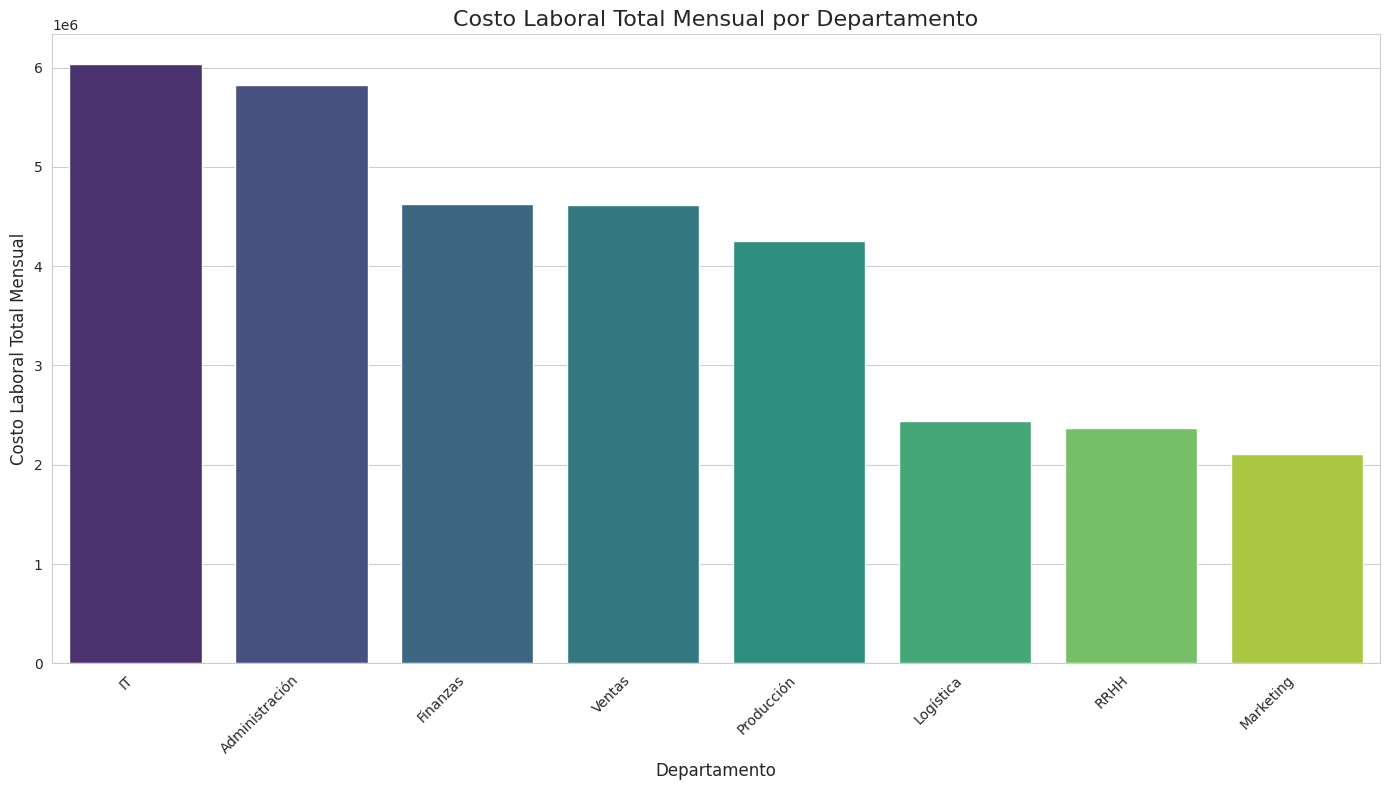

/tmp/ipython-input-2-1879652147.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salario_promedio_por_puesto.head(10).index, y=salario_promedio_por_puesto.head(10).values, palette='magma')


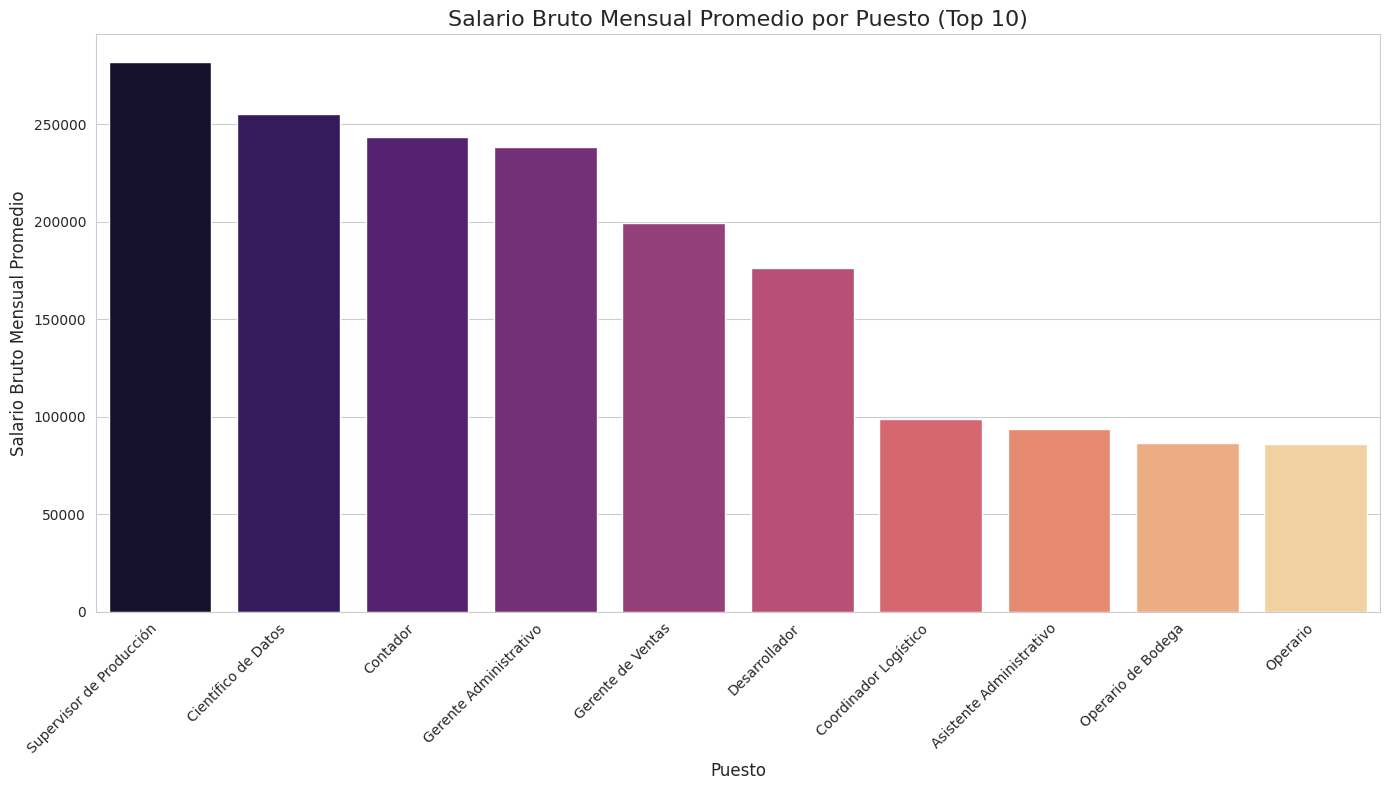

/tmp/ipython-input-2-1879652147.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='tipo_contrato', data=df_remuneraciones, palette='flare', order=df_remuneraciones['tipo_contrato'].value_counts().index)


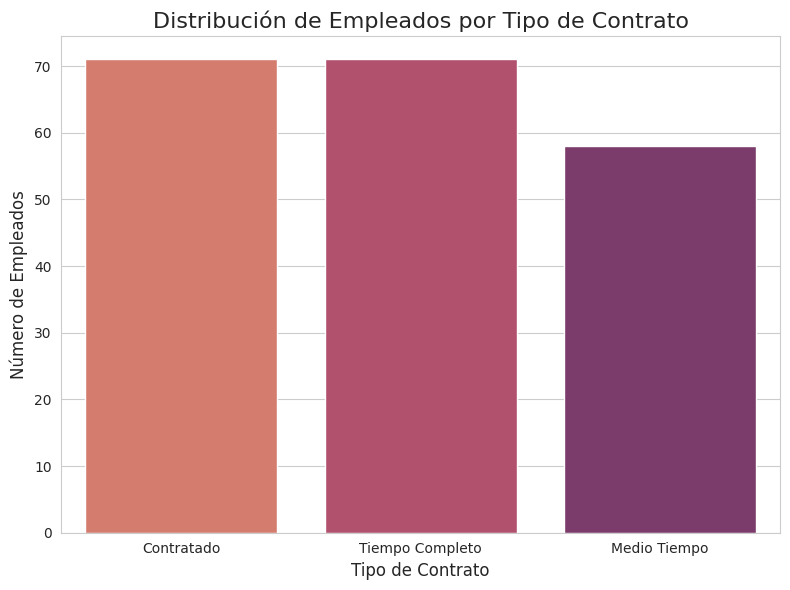

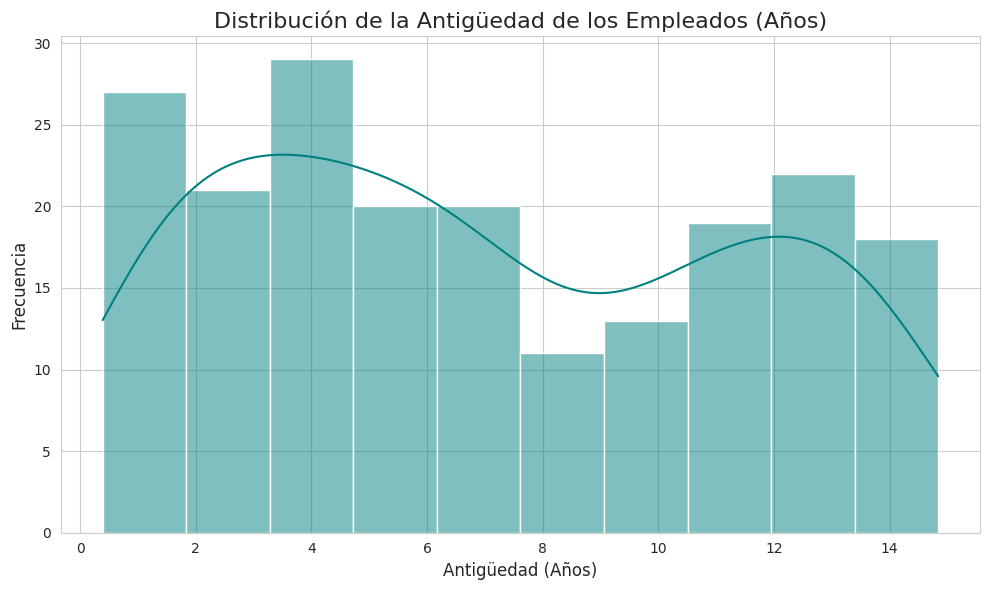

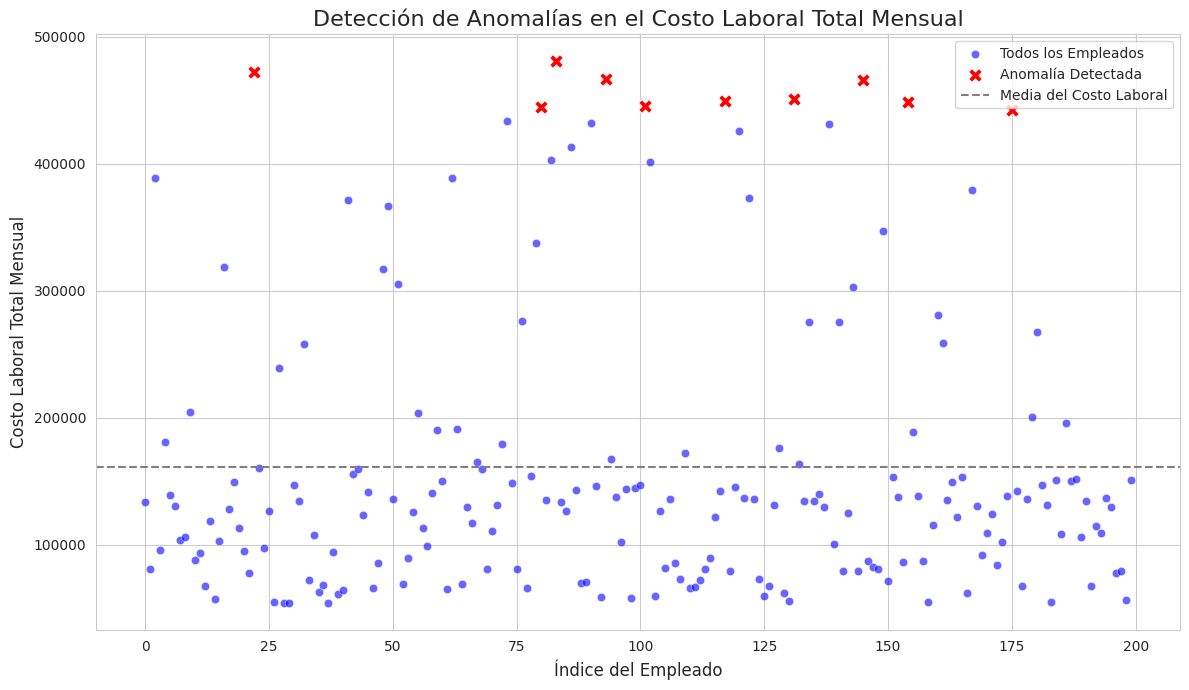


Análisis completo de remuneraciones y cargas sociales, incluyendo estadísticas, análisis temporal, detección de anomalías y visualizaciones, ha sido ejecutado.


In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Carga del DataFrame desde GitHub ---
# ¡IMPORTANTE! Reemplaza esta URL con la URL RAW real de tu archivo CSV en GitHub.
url_github = "https://raw.githubusercontent.com/Viny2030/mi_proyecto/refs/heads/main/remuneraciones_y_cargas_sociales.csv"

try:
    df_remuneraciones = pd.read_csv(url_github)
    print(f"DataFrame cargado exitosamente desde GitHub: {url_github}\n")
except Exception as e:
    print(f"Error al cargar el DataFrame desde GitHub: {e}")
    print("Por favor, verifica la URL raw de tu archivo en GitHub y tu conexión a internet.")
    exit()

# Mostrar las primeras filas y la información del DataFrame para verificar la carga
print("--- Encabezado Inicial del DataFrame de Remuneraciones y Cargas Sociales ---")
print(df_remuneraciones.head())
print("\n--- Información del DataFrame (Tipos de Datos Originales) ---")
df_remuneraciones.info()

# --- 2. Preprocesamiento de Datos ---

# Asegurarse de que la columna 'fecha_ingreso' sea tipo datetime
print("\n--- Preprocesamiento de Datos: Conversión de Fechas ---")
df_remuneraciones['fecha_ingreso'] = pd.to_datetime(df_remuneraciones['fecha_ingreso'])

print("\n--- Información del DataFrame (después de conversión de fechas) ---")
df_remuneraciones.info()
print("\n--- Primeras filas del DataFrame con fechas convertidas ---")
print(df_remuneraciones[['id_empleado', 'fecha_ingreso', 'salario_bruto_mensual']].head())

# --- 3. Estadísticas Descriptivas y Agregación ---

print("\n" + "="*70)
print("--- Análisis de Estadísticas Descriptivas y Agregación ---")

# a) Costo Laboral Total Mensual por Departamento
print("\n--- Costo Laboral Total Mensual por Departamento ---")
costo_por_departamento = df_remuneraciones.groupby('departamento')['costo_laboral_total_mensual'].sum().sort_values(ascending=False)
print(costo_por_departamento)

# b) Salario Bruto Promedio por Puesto
print("\n--- Salario Bruto Mensual Promedio por Puesto ---")
salario_promedio_por_puesto = df_remuneraciones.groupby('puesto')['salario_bruto_mensual'].mean().sort_values(ascending=False)
print(salario_promedio_por_puesto.head(10)) # Mostrar los 10 principales promedios

# c) Conteo de Empleados por Tipo de Contrato y Departamento
print("\n--- Conteo de Empleados por Tipo de Contrato y Departamento ---")
conteo_por_contrato_depto = df_remuneraciones.groupby(['tipo_contrato', 'departamento']).size().unstack(fill_value=0)
print(conteo_por_contrato_depto)

# d) Estadísticas Descriptivas del Salario Bruto Mensual
print("\n--- Estadísticas Descriptivas del Salario Bruto Mensual ---")
print(df_remuneraciones['salario_bruto_mensual'].describe())

# e) Estadísticas Descriptivas de las Cargas Sociales del Empleador
print("\n--- Estadísticas Descriptivas de las Cargas Sociales del Empleador ---")
print(df_remuneraciones['cargas_sociales_empleador'].describe())

# --- 4. Análisis Temporal (Antigüedad de los Empleados) ---

print("\n" + "="*70)
print("--- Análisis Temporal (Antigüedad de los Empleados) ---")

# Definir la fecha actual para el análisis de antigüedad
# Usamos la fecha actual (Julio 10, 2025) como referencia.
fecha_actual_referencia = datetime(2025, 7, 10)

# Calcular la antigüedad del empleado (en años)
df_remuneraciones['antiguedad_anios'] = ((fecha_actual_referencia - df_remuneraciones['fecha_ingreso']).dt.days / 365.25).round(2)
print(f"\n--- Antigüedad de los Empleados (a la fecha de {fecha_actual_referencia.strftime('%Y-%m-%d')}) ---")
print(df_remuneraciones[['id_empleado', 'fecha_ingreso', 'antiguedad_anios']].head())

# --- 5. Detección Simple de Anomalías ---

print("\n" + "="*70)
print("--- Detección Simple de Anomalías (Costo Laboral Total Mensual) ---")

# Calcular el Z-score para 'costo_laboral_total_mensual'
df_remuneraciones['costo_laboral_zscore'] = zscore(df_remuneraciones['costo_laboral_total_mensual'])
umbral_zscore = 2.5 # Ajustar umbral si es necesario, 2.5 o 3 son comunes
anomalias_costo_laboral = df_remuneraciones[(df_remuneraciones['costo_laboral_zscore'] > umbral_zscore) | (df_remuneraciones['costo_laboral_zscore'] < -umbral_zscore)]

print(f"\n--- Empleados con Costos Laborales Potencialmente Anómalos (Z-score > {umbral_zscore} o < -{umbral_zscore}) ---")
if not anomalias_costo_laboral.empty:
    print(anomalias_costo_laboral[['id_empleado', 'departamento', 'puesto', 'salario_bruto_mensual', 'cargas_sociales_empleador', 'costo_laboral_total_mensual', 'costo_laboral_zscore']])
else:
    print(f"No se encontraron anomalías significativas en el costo laboral con un Z-score > {umbral_zscore}.")

# --- 6. Visualización de Datos (Gráficos) ---

print("\n" + "="*70)
print("--- Generando Gráficos para Remuneraciones y Cargas Sociales ---")

sns.set_style("whitegrid")

# Gráfico 1: Costo Laboral Total Mensual por Departamento
plt.figure(figsize=(14, 8))
sns.barplot(x=costo_por_departamento.index, y=costo_por_departamento.values, palette='viridis')
plt.title('Costo Laboral Total Mensual por Departamento', fontsize=16)
plt.xlabel('Departamento', fontsize=12)
plt.ylabel('Costo Laboral Total Mensual', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico 2: Salario Bruto Promedio por Puesto (Top 10)
plt.figure(figsize=(14, 8))
sns.barplot(x=salario_promedio_por_puesto.head(10).index, y=salario_promedio_por_puesto.head(10).values, palette='magma')
plt.title('Salario Bruto Mensual Promedio por Puesto (Top 10)', fontsize=16)
plt.xlabel('Puesto', fontsize=12)
plt.ylabel('Salario Bruto Mensual Promedio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico 3: Conteo de Empleados por Tipo de Contrato
plt.figure(figsize=(8, 6))
sns.countplot(x='tipo_contrato', data=df_remuneraciones, palette='flare', order=df_remuneraciones['tipo_contrato'].value_counts().index)
plt.title('Distribución de Empleados por Tipo de Contrato', fontsize=16)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Número de Empleados', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico 4: Distribución de la Antigüedad de los Empleados (Histograma)
plt.figure(figsize=(10, 6))
sns.histplot(df_remuneraciones['antiguedad_anios'], bins=10, kde=True, color='teal')
plt.title('Distribución de la Antigüedad de los Empleados (Años)', fontsize=16)
plt.xlabel('Antigüedad (Años)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico 5: Detección de Anomalías en el Costo Laboral Total Mensual (Scatter Plot)
plt.figure(figsize=(12, 7))
sns.scatterplot(x=df_remuneraciones.index, y='costo_laboral_total_mensual', data=df_remuneraciones, label='Todos los Empleados', color='blue', alpha=0.6)
if not anomalias_costo_laboral.empty:
    sns.scatterplot(x=anomalias_costo_laboral.index, y='costo_laboral_total_mensual', data=anomalias_costo_laboral,
                    color='red', s=100, label='Anomalía Detectada', marker='X')
plt.axhline(df_remuneraciones['costo_laboral_total_mensual'].mean(), color='gray', linestyle='--', label='Media del Costo Laboral')
plt.title('Detección de Anomalías en el Costo Laboral Total Mensual', fontsize=16)
plt.xlabel('Índice del Empleado', fontsize=12)
plt.ylabel('Costo Laboral Total Mensual', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("Análisis completo de remuneraciones y cargas sociales, incluyendo estadísticas, análisis temporal, detección de anomalías y visualizaciones, ha sido ejecutado.")

### algoritmo __Cargas fiscales

Error al cargar el DataFrame desde GitHub: HTTP Error 404: Not Found
Por favor, verifica la URL raw de tu archivo en GitHub y tu conexión a internet.
--- Encabezado Inicial del DataFrame de Cargas Fiscales ---
  id_impuesto                 tipo_impuesto periodo_fiscal fecha_vencimiento  \
0    IMP-0000                     Ganancias       Año 2024        2025-04-21   
1    IMP-0001                     Ganancias       Año 2024        2025-09-03   
2    IMP-0002      Aportes Seguridad Social        2025-05        2025-05-30   
3    IMP-0003      Aportes Seguridad Social        2025-02        2025-08-19   
4    IMP-0004  Impuesto a las Exportaciones        2024-07        2025-08-08   

    monto_ars estado_pago fecha_pago  dias_hasta_vencimiento rango_antiguedad  
0  4485443.66      Pagado 2025-04-18                     NaN           Pagado  
1  4350807.28   Pendiente        NaT                    55.0           Pagado  
2  4486473.07     Vencido        NaT                   -41.0         

/tmp/ipython-input-3-2120584977.py:106: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monto_por_rango_antiguedad = df_cargas_fiscales.groupby('rango_antiguedad')['monto_ars'].sum().reindex(orden_antiguedad_completo, fill_value=0)
/tmp/ipython-input-3-2120584977.py:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monto_por_tipo_impuesto.index, y=monto_por_tipo_impuesto.values, palette='viridis')


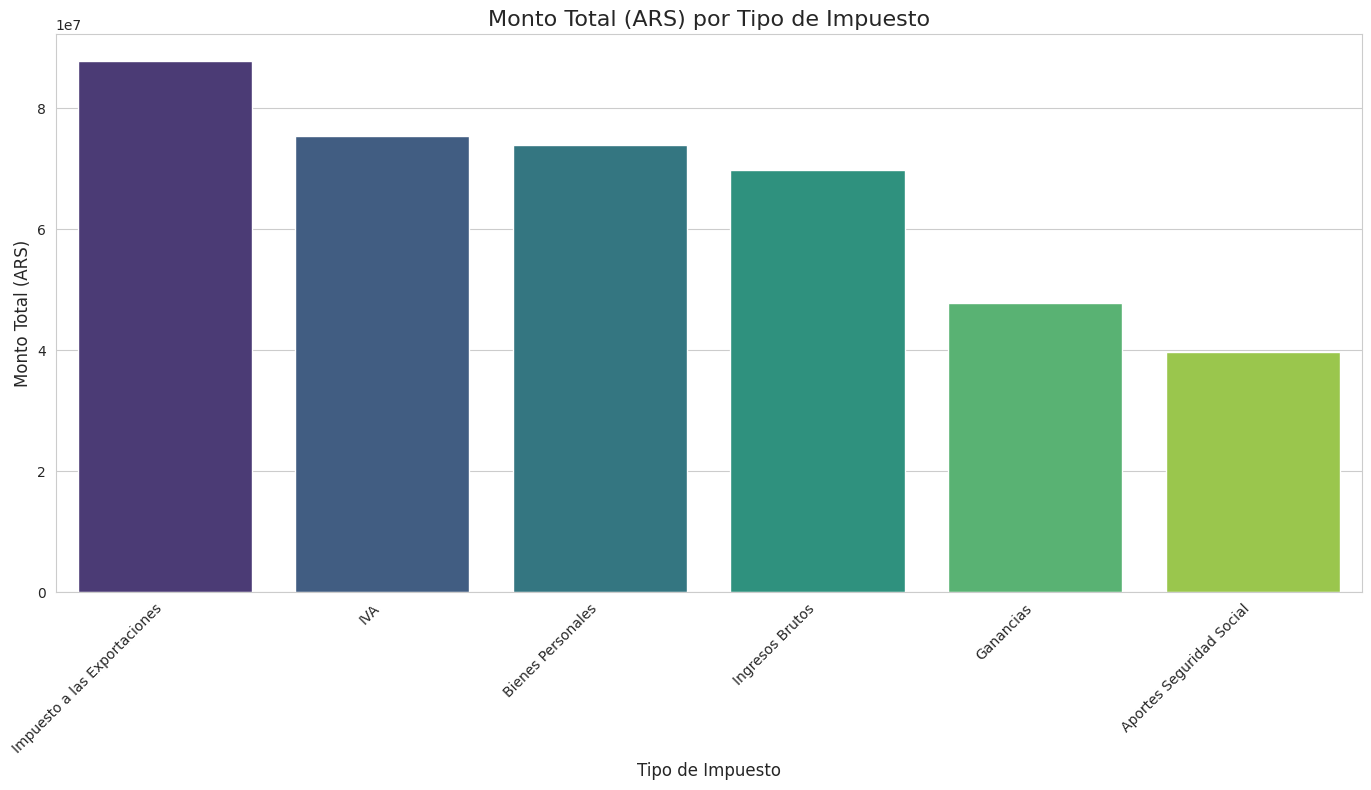

/tmp/ipython-input-3-2120584977.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='estado_pago', data=df_cargas_fiscales, palette='cividis', order=df_cargas_fiscales['estado_pago'].value_counts().index)


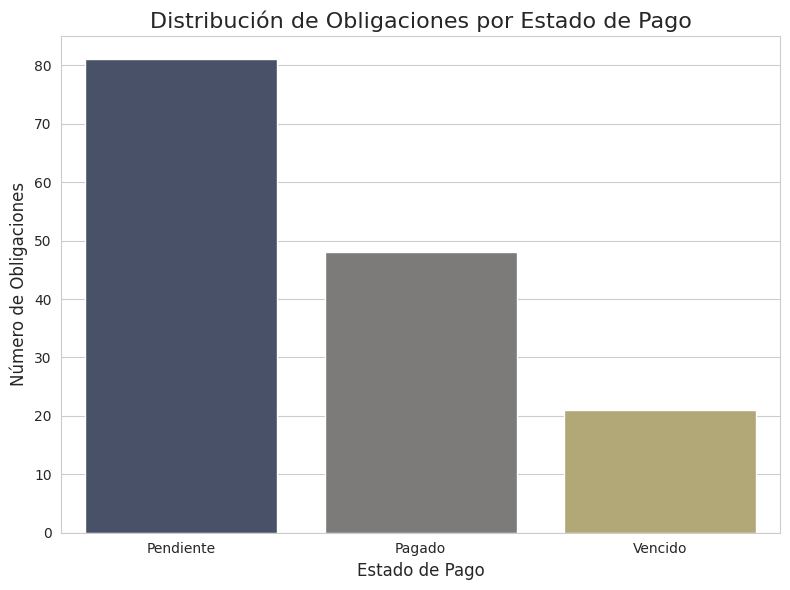

/tmp/ipython-input-3-2120584977.py:155: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monto_total_por_estado_pago.index, y=monto_total_por_estado_pago.values, palette='plasma')


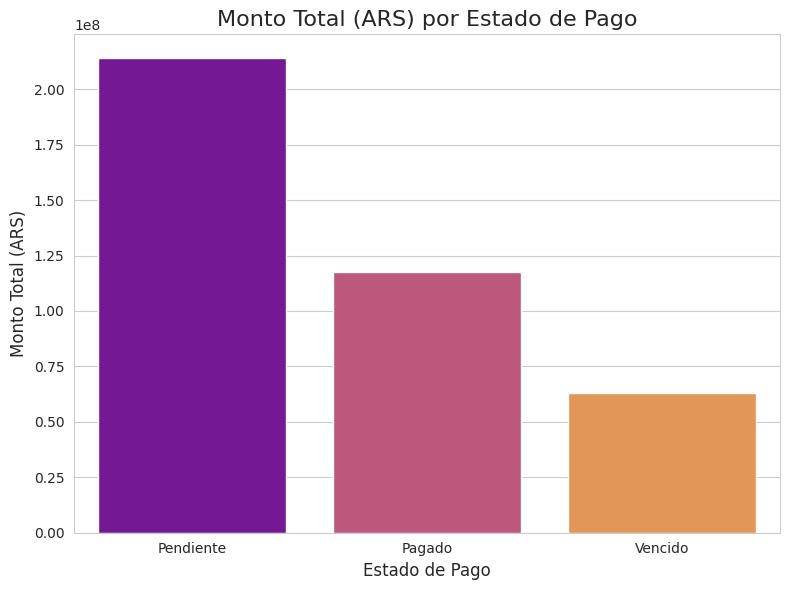

/tmp/ipython-input-3-2120584977.py:164: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monto_por_rango_antiguedad.index, y=monto_por_rango_antiguedad.values, palette='rocket', order=orden_antiguedad_completo)


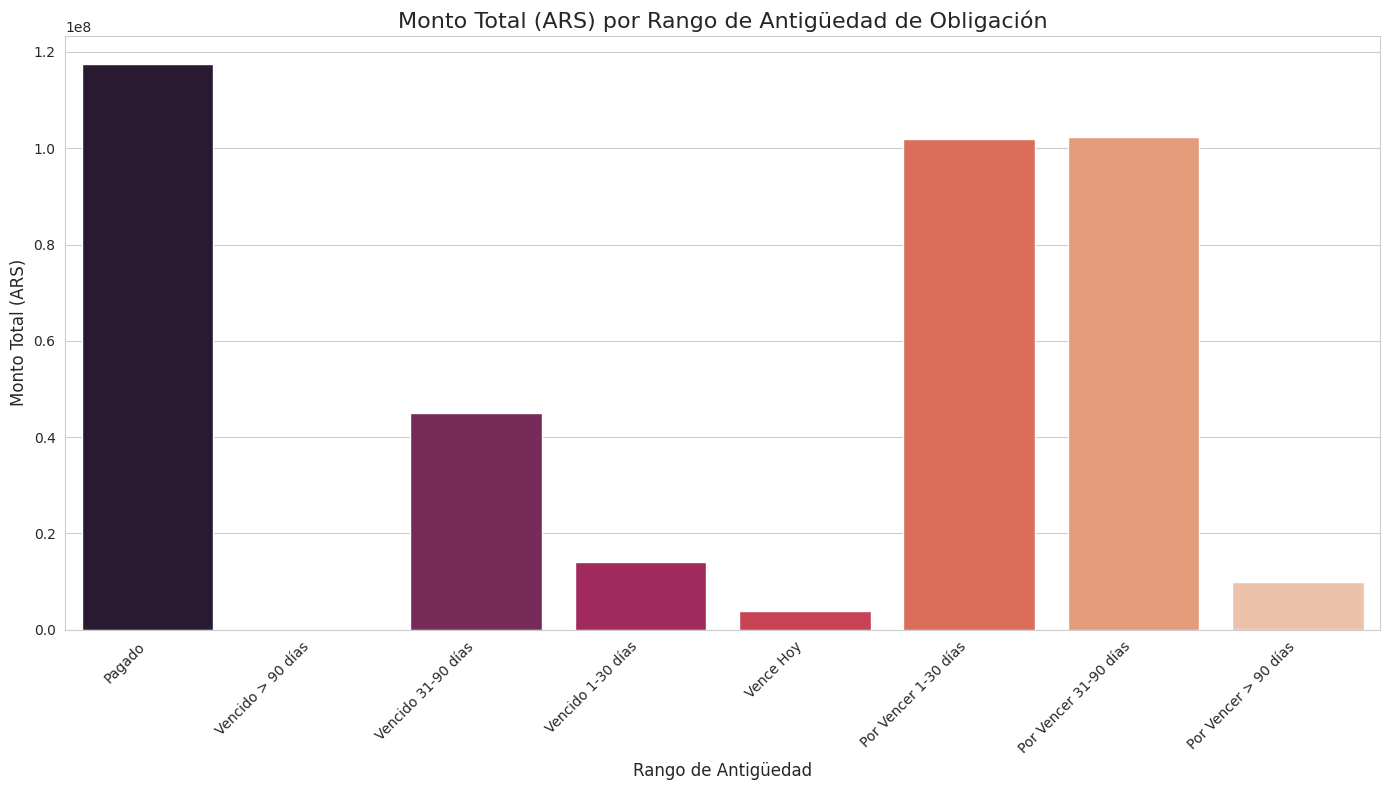

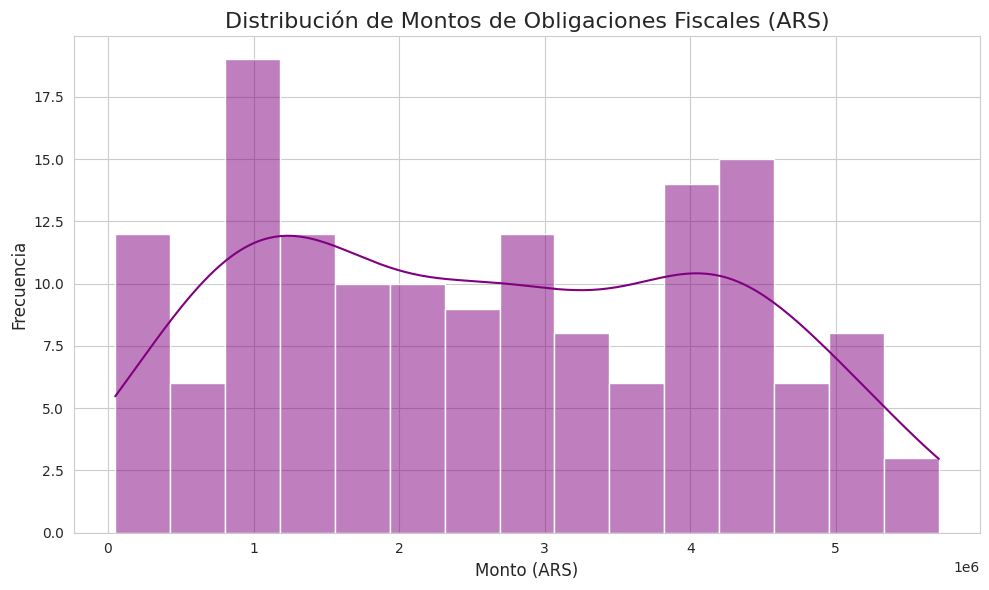

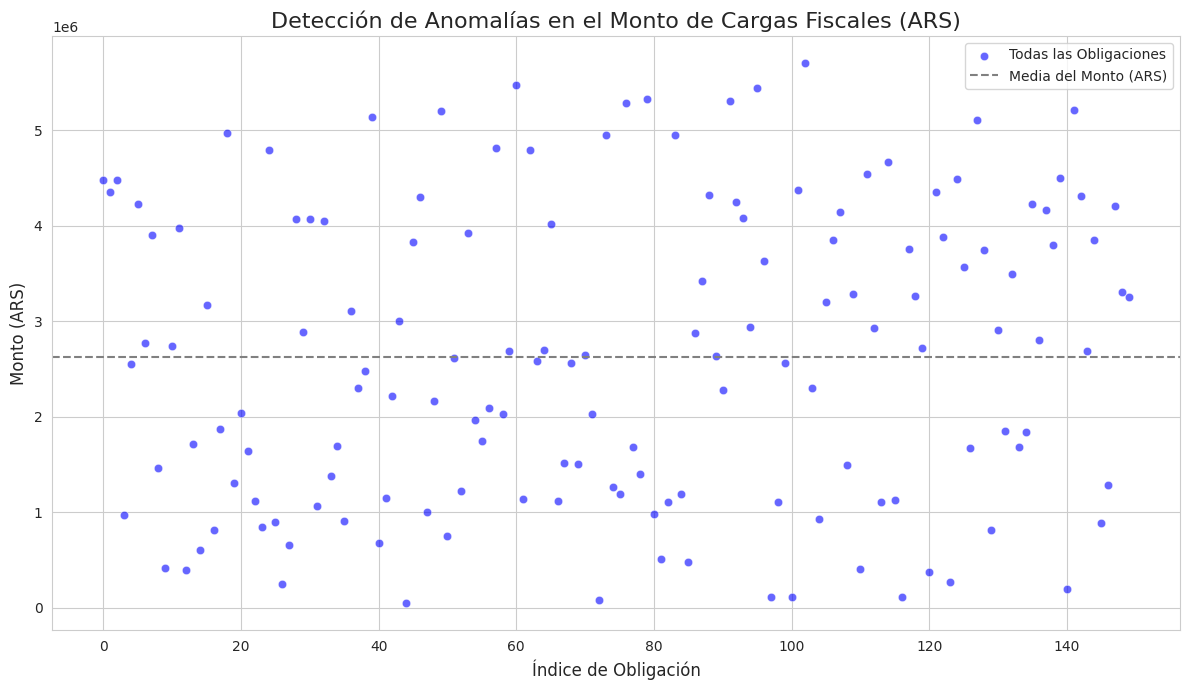


Análisis completo de cargas fiscales, incluyendo estadísticas, análisis de antigüedad, detección de anomalías y visualizaciones, ha sido ejecutado.


In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Carga del DataFrame desde GitHub ---
# ¡IMPORTANTE! Reemplaza esta URL con la URL RAW real de tu archivo CSV en GitHub.
url_github = "https://raw.githubusercontent.com/TU_USUARIO/TU_REPOSITORIO/main/cargas_fiscales.csv"

try:
    df_cargas_fiscales = pd.read_csv(url_github)
    print(f"DataFrame cargado exitosamente desde GitHub: {url_github}\n")
except Exception as e:
    print(f"Error al cargar el DataFrame desde GitHub: {e}")
    print("Por favor, verifica la URL raw de tu archivo en GitHub y tu conexión a internet.")
    exit()

# Mostrar las primeras filas y la información del DataFrame para verificar la carga
print("--- Encabezado Inicial del DataFrame de Cargas Fiscales ---")
print(df_cargas_fiscales.head())
print("\n--- Información del DataFrame (Tipos de Datos Originales) ---")
df_cargas_fiscales.info()

# --- 2. Preprocesamiento de Datos ---

# Asegurarse de que las columnas de fecha sean tipo datetime
print("\n--- Preprocesamiento de Datos: Conversión de Fechas ---")
df_cargas_fiscales['fecha_vencimiento'] = pd.to_datetime(df_cargas_fiscales['fecha_vencimiento'])
# La columna 'fecha_pago' puede tener NaT (Not a Time) para pagos pendientes, pd.to_datetime lo maneja bien.
df_cargas_fiscales['fecha_pago'] = pd.to_datetime(df_cargas_fiscales['fecha_pago'])

print("\n--- Información del DataFrame (después de conversión de fechas) ---")
df_cargas_fiscales.info()
print("\n--- Primeras filas del DataFrame con fechas convertidas ---")
print(df_cargas_fiscales[['id_impuesto', 'fecha_vencimiento', 'fecha_pago', 'monto_ars']].head())

# --- 3. Estadísticas Descriptivas y Agregación ---

print("\n" + "="*70)
print("--- Análisis de Estadísticas Descriptivas y Agregación de Cargas Fiscales ---")

# a) Monto Total por Tipo de Impuesto
print("\n--- Monto Total (ARS) por Tipo de Impuesto ---")
monto_por_tipo_impuesto = df_cargas_fiscales.groupby('tipo_impuesto')['monto_ars'].sum().sort_values(ascending=False)
print(monto_por_tipo_impuesto)

# b) Conteo de Obligaciones por Estado de Pago y Tipo de Impuesto
print("\n--- Conteo de Obligaciones por Estado de Pago y Tipo de Impuesto ---")
conteo_por_estado_tipo = df_cargas_fiscales.groupby(['estado_pago', 'tipo_impuesto']).size().unstack(fill_value=0)
print(conteo_por_estado_tipo)

# c) Monto Total por Estado de Pago
print("\n--- Monto Total (ARS) por Estado de Pago ---")
monto_total_por_estado_pago = df_cargas_fiscales.groupby('estado_pago')['monto_ars'].sum().sort_values(ascending=False)
print(monto_total_por_estado_pago)

# d) Estadísticas Descriptivas del Monto en ARS
print("\n--- Estadísticas Descriptivas del Monto (ARS) ---")
print(df_cargas_fiscales['monto_ars'].describe())

# --- 4. Análisis de Antigüedad de Obligaciones Fiscales ---

print("\n" + "="*70)
print("--- Análisis de Antigüedad de Obligaciones Fiscales ---")

# Definir la fecha actual para el análisis de antigüedad (Julio 10, 2025)
fecha_actual_referencia = datetime(2025, 7, 10)

# Calcular días hasta/desde el vencimiento para obligaciones PENDIENTES o VENCIDAS
df_cargas_fiscales['dias_hasta_vencimiento'] = np.nan # Inicializar como NaN
# Para facturas pendientes o vencidas, calculamos la diferencia con la fecha de vencimiento
pendientes_o_vencidas_mask = df_cargas_fiscales['estado_pago'].isin(['Pendiente', 'Vencido'])
df_cargas_fiscales.loc[pendientes_o_vencidas_mask, 'dias_hasta_vencimiento'] = \
    (df_cargas_fiscales['fecha_vencimiento'] - fecha_actual_referencia).dt.days

# Definir los bins y etiquetas para la antigüedad
bins_antiguedad = [-np.inf, -90, -30, -1, 0, 30, 90, np.inf]
labels_antiguedad = ['Vencido > 90 días', 'Vencido 31-90 días', 'Vencido 1-30 días',
                     'Vence Hoy', 'Por Vencer 1-30 días', 'Por Vencer 31-90 días', 'Por Vencer > 90 días']

# Modificación clave aquí: Primero aplicar pd.cut y luego manejar 'Pagado'
# Crear una columna temporal con los rangos de antigüedad para no pagados
df_cargas_fiscales['rango_antiguedad_temp'] = pd.cut(
    df_cargas_fiscales['dias_hasta_vencimiento'],
    bins=bins_antiguedad,
    labels=labels_antiguedad,
    right=False,
    include_lowest=True # Asegurarse de incluir el límite inferior
)

# Ahora, asignar 'Pagado' a las filas que tienen ese estado de pago
df_cargas_fiscales['rango_antiguedad'] = df_cargas_fiscales['rango_antiguedad_temp'].astype(object) # Convertir a object para poder asignar string
df_cargas_fiscales.loc[df_cargas_fiscales['estado_pago'] == 'Pagado', 'rango_antiguedad'] = 'Pagado'

# Definir el orden completo de las categorías para la columna 'rango_antiguedad'
orden_antiguedad_completo = ['Pagado'] + labels_antiguedad
df_cargas_fiscales['rango_antiguedad'] = pd.Categorical(df_cargas_fiscales['rango_antiguedad'], categories=orden_antiguedad_completo, ordered=True)

print("\n--- Distribución de Obligaciones por Rango de Antigüedad ---")
distribucion_antiguedad = df_cargas_fiscales['rango_antiguedad'].value_counts().reindex(orden_antiguedad_completo, fill_value=0)
print(distribucion_antiguedad)

print("\n--- Monto Total (ARS) por Rango de Antigüedad ---")
monto_por_rango_antiguedad = df_cargas_fiscales.groupby('rango_antiguedad')['monto_ars'].sum().reindex(orden_antiguedad_completo, fill_value=0)
print(monto_por_rango_antiguedad)


# --- 5. Detección Simple de Anomalías ---

print("\n" + "="*70)
print("--- Detección Simple de Anomalías (Monto en ARS) ---")

# Calcular el Z-score para 'monto_ars'
df_cargas_fiscales['monto_ars_zscore'] = zscore(df_cargas_fiscales['monto_ars'])
umbral_zscore = 2.5 # Ajustar umbral si es necesario, 2.5 o 3 son comunes
anomalias_monto_fiscal = df_cargas_fiscales[(df_cargas_fiscales['monto_ars_zscore'] > umbral_zscore) | (df_cargas_fiscales['monto_ars_zscore'] < -umbral_zscore)]

print(f"\n--- Obligaciones con Montos (ARS) Potencialmente Anómalos (Z-score > {umbral_zscore} o < -{umbral_zscore}) ---")
if not anomalias_monto_fiscal.empty:
    print(anomalias_monto_fiscal[['id_impuesto', 'tipo_impuesto', 'periodo_fiscal', 'monto_ars', 'monto_ars_zscore', 'estado_pago']])
else:
    print(f"No se encontraron anomalías significativas en el monto con un Z-score > {umbral_zscore}.")


# --- 6. Visualización de Datos (Gráficos) ---

print("\n" + "="*70)
print("--- Generando Gráficos para Cargas Fiscales ---")

sns.set_style("whitegrid")

# Gráfico 1: Monto Total (ARS) por Tipo de Impuesto
plt.figure(figsize=(14, 8))
sns.barplot(x=monto_por_tipo_impuesto.index, y=monto_por_tipo_impuesto.values, palette='viridis')
plt.title('Monto Total (ARS) por Tipo de Impuesto', fontsize=16)
plt.xlabel('Tipo de Impuesto', fontsize=12)
plt.ylabel('Monto Total (ARS)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico 2: Conteo de Obligaciones por Estado de Pago
plt.figure(figsize=(8, 6))
sns.countplot(x='estado_pago', data=df_cargas_fiscales, palette='cividis', order=df_cargas_fiscales['estado_pago'].value_counts().index)
plt.title('Distribución de Obligaciones por Estado de Pago', fontsize=16)
plt.xlabel('Estado de Pago', fontsize=12)
plt.ylabel('Número de Obligaciones', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico 3: Monto Total (ARS) por Estado de Pago
plt.figure(figsize=(8, 6))
sns.barplot(x=monto_total_por_estado_pago.index, y=monto_total_por_estado_pago.values, palette='plasma')
plt.title('Monto Total (ARS) por Estado de Pago', fontsize=16)
plt.xlabel('Estado de Pago', fontsize=12)
plt.ylabel('Monto Total (ARS)', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico 4: Monto Total (ARS) por Rango de Antigüedad de Obligación
plt.figure(figsize=(14, 8))
sns.barplot(x=monto_por_rango_antiguedad.index, y=monto_por_rango_antiguedad.values, palette='rocket', order=orden_antiguedad_completo)
plt.title('Monto Total (ARS) por Rango de Antigüedad de Obligación', fontsize=16)
plt.xlabel('Rango de Antigüedad', fontsize=12)
plt.ylabel('Monto Total (ARS)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico 5: Distribución de Montos (ARS) (Histograma)
plt.figure(figsize=(10, 6))
sns.histplot(df_cargas_fiscales['monto_ars'], bins=15, kde=True, color='purple')
plt.title('Distribución de Montos de Obligaciones Fiscales (ARS)', fontsize=16)
plt.xlabel('Monto (ARS)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico 6: Detección de Anomalías en el Monto (ARS) (Scatter Plot)
plt.figure(figsize=(12, 7))
sns.scatterplot(x=df_cargas_fiscales.index, y='monto_ars', data=df_cargas_fiscales, label='Todas las Obligaciones', color='blue', alpha=0.6)
if not anomalias_monto_fiscal.empty:
    sns.scatterplot(x=anomalias_monto_fiscal.index, y='monto_ars', data=anomalias_monto_fiscal,
                    color='red', s=100, label='Anomalía Detectada', marker='X')
plt.axhline(df_cargas_fiscales['monto_ars'].mean(), color='gray', linestyle='--', label='Media del Monto (ARS)')
plt.title('Detección de Anomalías en el Monto de Cargas Fiscales (ARS)', fontsize=16)
plt.xlabel('Índice de Obligación', fontsize=12)
plt.ylabel('Monto (ARS)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("Análisis completo de cargas fiscales, incluyendo estadísticas, análisis de antigüedad, detección de anomalías y visualizaciones, ha sido ejecutado.")

### Algoritmo -anticipos de clientes

DataFrame cargado exitosamente desde GitHub: https://raw.githubusercontent.com/Viny2030/mi_proyecto/refs/heads/main/anticipos_clientes.csv

--- Encabezado Inicial del DataFrame de Anticipos de Clientes ---
  id_anticipo  id_cliente fecha_anticipo  monto_anticipo moneda  \
0    ANT-0000  Cliente_13     2024-01-23         8712.99    ARS   
1    ANT-0001   Cliente_1     2024-02-10         1584.20    EUR   
2    ANT-0002  Cliente_28     2025-04-28         3920.93    EUR   
3    ANT-0003  Cliente_24     2024-08-07        23170.11    ARS   
4    ANT-0004   Cliente_5     2024-11-19         2321.24    ARS   

  servicio_producto_asociado        estado_aplicacion  monto_aplicado  \
0       Auditoría Financiera  Pendiente de aplicación             0.0   
1      Implementación de ERP      Totalmente aplicado          1584.2   
2    Soporte Técnico Premium  Pendiente de aplicación             0.0   
3      Implementación de ERP  Pendiente de aplicación             0.0   
4               Capacitaci

/tmp/ipython-input-1-3774298064.py:96: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monto_pendiente_por_rango = df_pendientes.groupby('rango_antiguedad_pendiente')['monto_pendiente_aplicar'].sum().reindex(labels_antiguedad_pendientes, fill_value=0)
/tmp/ipython-input-1-3774298064.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monto_por_cliente.head(10).index, y=monto_por_cliente.head(10).values, palette='viridis')


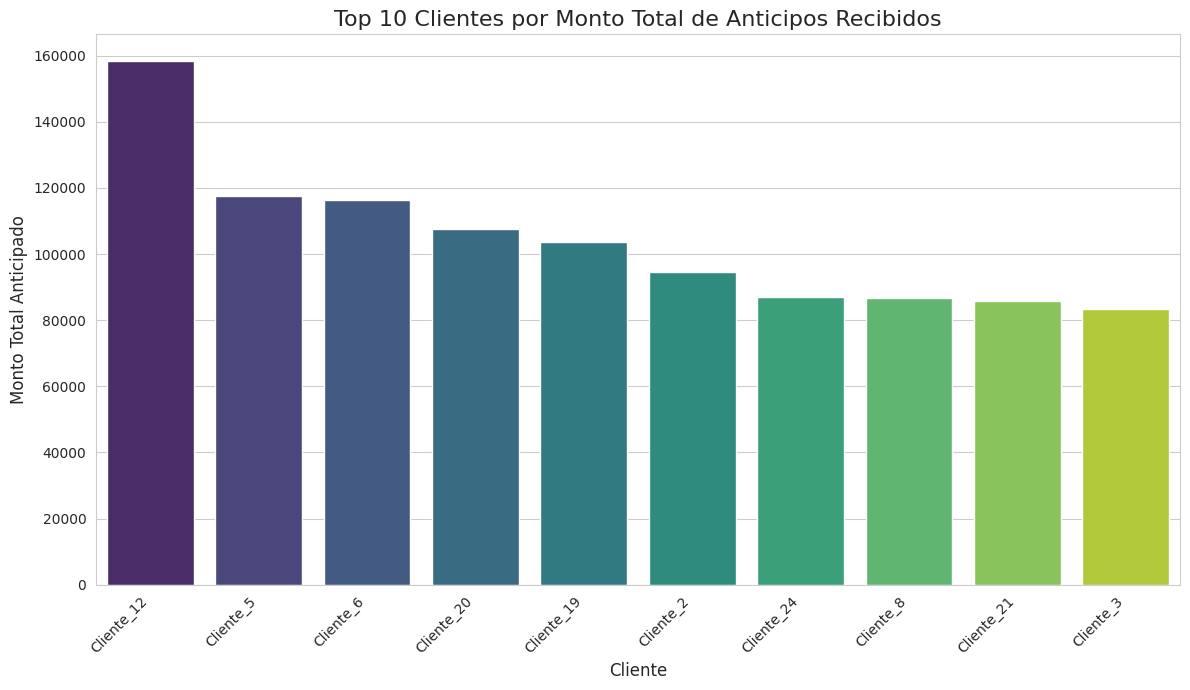

/tmp/ipython-input-1-3774298064.py:139: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monto_pendiente_por_cliente[monto_pendiente_por_cliente > 0].head(10).index,


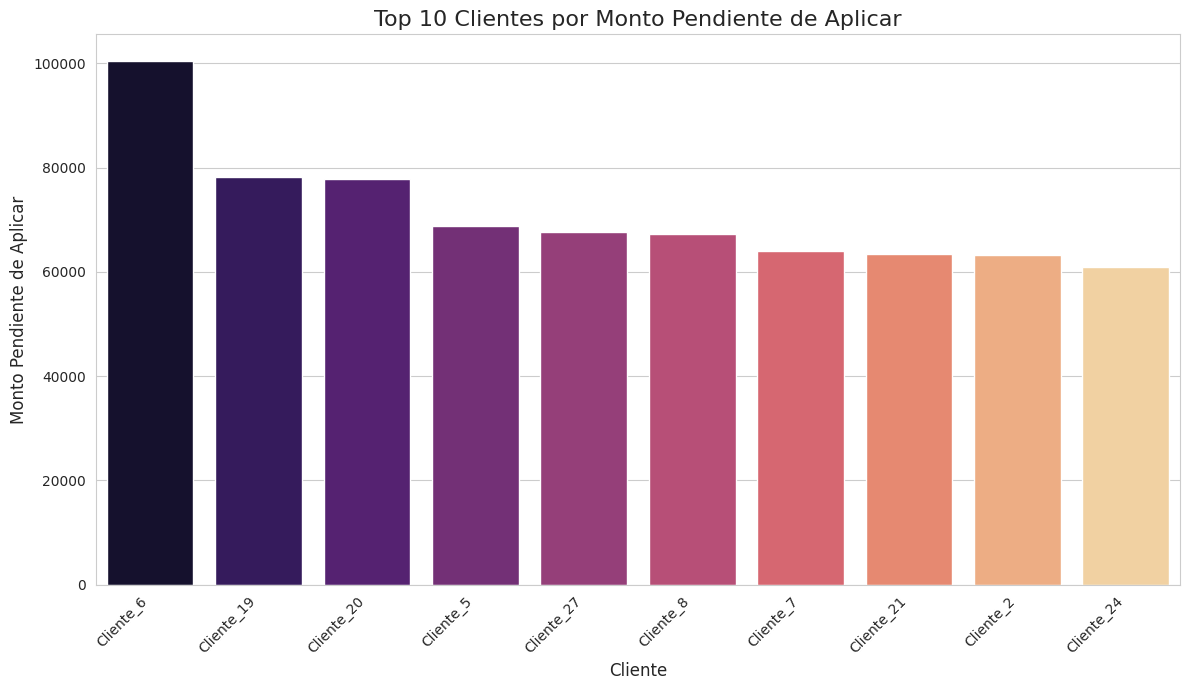

/tmp/ipython-input-1-3774298064.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='estado_aplicacion', data=df_anticipos, palette='cividis', order=df_anticipos['estado_aplicacion'].value_counts().index)


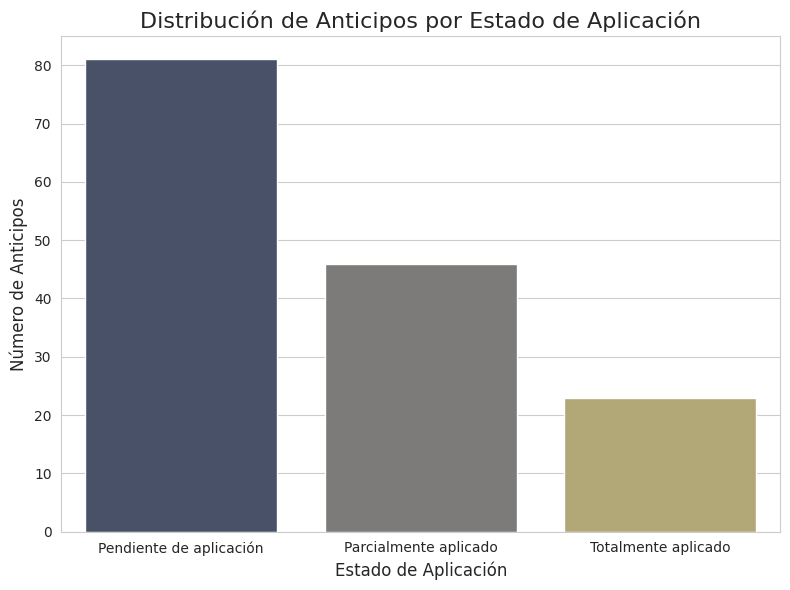

/tmp/ipython-input-1-3774298064.py:163: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monto_total_por_estado_aplicacion.index, y=monto_total_por_estado_aplicacion.values, palette='plasma')


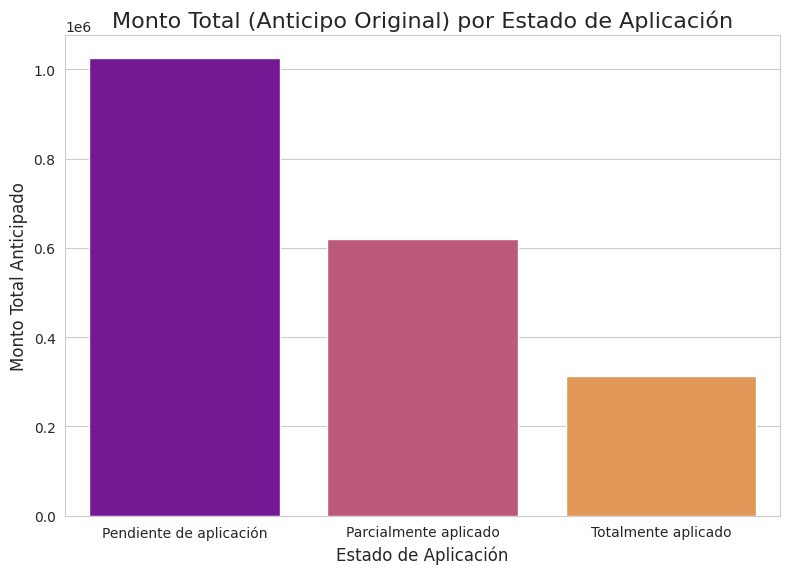

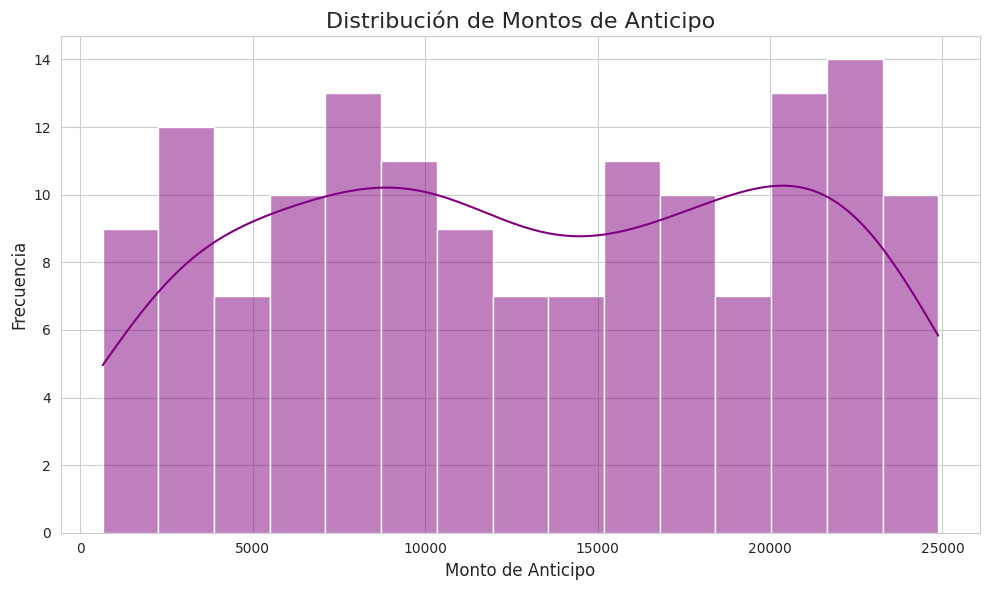

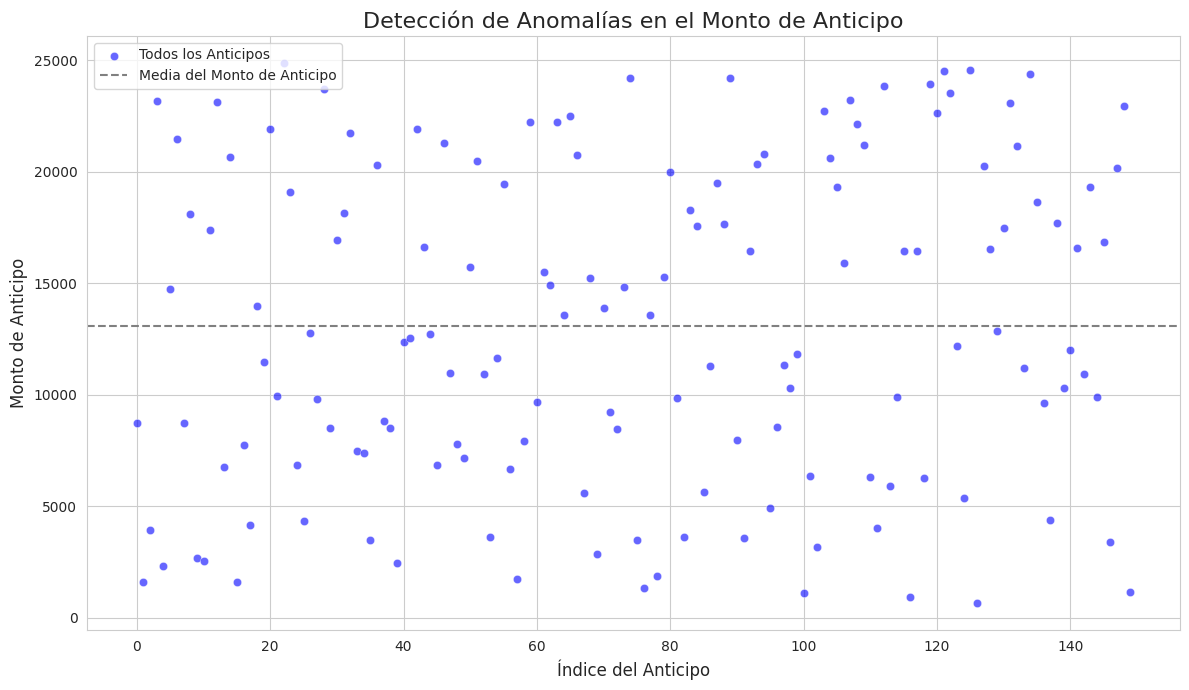

/tmp/ipython-input-1-3774298064.py:196: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monto_pendiente_por_rango.index, y=monto_pendiente_por_rango.values, palette='rocket')


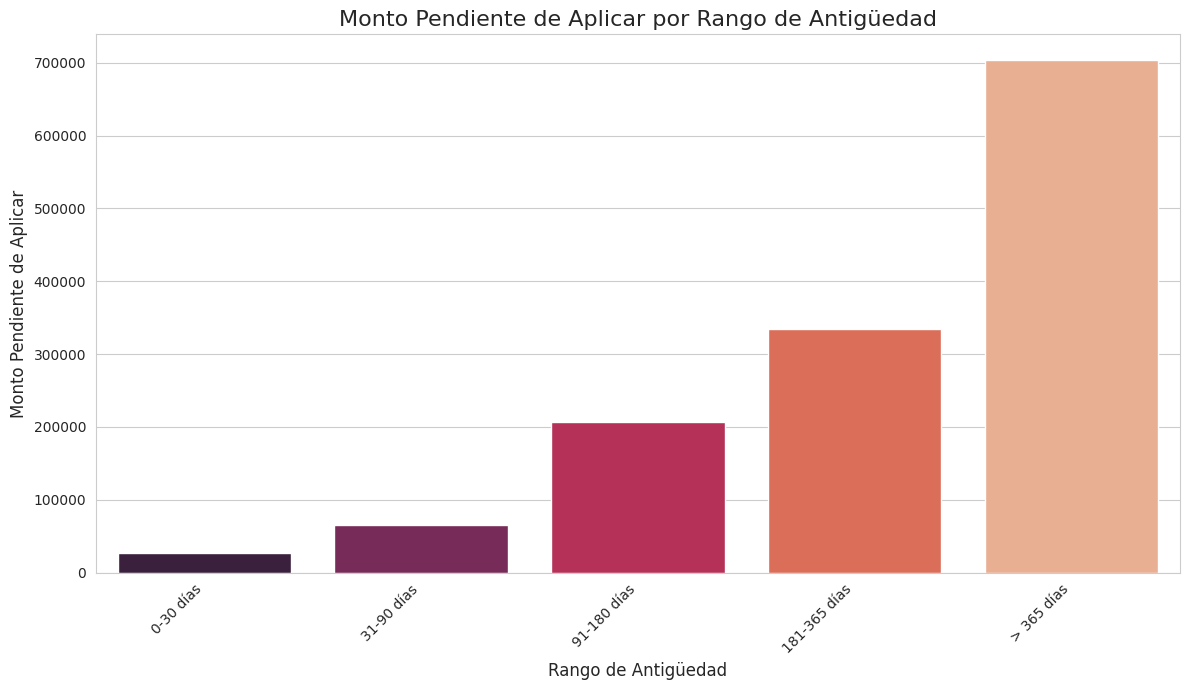


Análisis completo de anticipos de clientes, incluyendo estadísticas, análisis de antigüedad, detección de anomalías y visualizaciones, ha sido ejecutado.


In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Carga del DataFrame desde GitHub ---
# ¡IMPORTANTE! Reemplaza esta URL con la URL RAW real de tu archivo CSV en GitHub.
url_github = "https://raw.githubusercontent.com/Viny2030/mi_proyecto/refs/heads/main/anticipos_clientes.csv"

try:
    df_anticipos = pd.read_csv(url_github)
    print(f"DataFrame cargado exitosamente desde GitHub: {url_github}\n")
except Exception as e:
    print(f"Error al cargar el DataFrame desde GitHub: {e}")
    print("Por favor, verifica la URL raw de tu archivo en GitHub y tu conexión a internet.")
    exit()

# Mostrar las primeras filas y la información del DataFrame para verificar la carga
print("--- Encabezado Inicial del DataFrame de Anticipos de Clientes ---")
print(df_anticipos.head())
print("\n--- Información del DataFrame (Tipos de Datos Originales) ---")
df_anticipos.info()

# --- 2. Preprocesamiento de Datos ---

# Asegurarse de que las columnas de fecha sean tipo datetime
print("\n--- Preprocesamiento de Datos: Conversión de Fechas ---")
df_anticipos['fecha_anticipo'] = pd.to_datetime(df_anticipos['fecha_anticipo'])
# La columna 'fecha_cierre_aplicacion' puede tener NaT, pd.to_datetime lo maneja bien.
df_anticipos['fecha_cierre_aplicacion'] = pd.to_datetime(df_anticipos['fecha_cierre_aplicacion'])

print("\n--- Información del DataFrame (después de conversión de fechas) ---")
df_anticipos.info()
print("\n--- Primeras filas del DataFrame con fechas convertidas ---")
print(df_anticipos[['id_anticipo', 'fecha_anticipo', 'monto_anticipo', 'estado_aplicacion']].head())

# --- 3. Estadísticas Descriptivas y Agregación ---

print("\n" + "="*70)
print("--- Análisis de Estadísticas Descriptivas y Agregación de Anticipos ---")

# a) Monto Total de Anticipos Recibidos por Cliente
print("\n--- Monto Total de Anticipos Recibidos por Cliente ---")
monto_por_cliente = df_anticipos.groupby('id_cliente')['monto_anticipo'].sum().sort_values(ascending=False)
print(monto_por_cliente.head(10)) # Top 10 clientes por anticipos

# b) Monto Total Pendiente de Aplicar por Cliente
print("\n--- Monto Total Pendiente de Aplicar por Cliente ---")
monto_pendiente_por_cliente = df_anticipos.groupby('id_cliente')['monto_pendiente_aplicar'].sum().sort_values(ascending=False)
print(monto_pendiente_por_cliente[monto_pendiente_por_cliente > 0].head(10)) # Mostrar solo los que tienen saldo pendiente

# c) Conteo de Anticipos por Estado de Aplicación y Moneda
print("\n--- Conteo de Anticipos por Estado de Aplicación y Moneda ---")
conteo_por_estado_moneda = df_anticipos.groupby(['estado_aplicacion', 'moneda']).size().unstack(fill_value=0)
print(conteo_por_estado_moneda)

# d) Monto Total por Estado de Aplicación
print("\n--- Monto Total (Anticipo Original) por Estado de Aplicación ---")
monto_total_por_estado_aplicacion = df_anticipos.groupby('estado_aplicacion')['monto_anticipo'].sum().sort_values(ascending=False)
print(monto_total_por_estado_aplicacion)

# e) Estadísticas Descriptivas del Monto de Anticipo
print("\n--- Estadísticas Descriptivas del Monto de Anticipo ---")
print(df_anticipos['monto_anticipo'].describe())

# --- 4. Análisis de Antigüedad de Anticipos Pendientes ---

print("\n" + "="*70)
print("--- Análisis de Antigüedad de Anticipos Pendientes ---")

# Definir la fecha actual para el análisis (Julio 10, 2025)
fecha_actual_referencia = datetime(2025, 7, 10)

# Filtrar solo los anticipos que aún tienen un monto pendiente de aplicar
df_pendientes = df_anticipos[df_anticipos['monto_pendiente_aplicar'] > 0].copy()

if not df_pendientes.empty:
    # Calcular los días desde la fecha del anticipo hasta la fecha actual
    df_pendientes['dias_desde_anticipo'] = (fecha_actual_referencia - df_pendientes['fecha_anticipo']).dt.days

    # Categorizar la antigüedad de los anticipos pendientes
    bins_antiguedad_pendientes = [-np.inf, 30, 90, 180, 365, np.inf]
    labels_antiguedad_pendientes = ['0-30 días', '31-90 días', '91-180 días', '181-365 días', '> 365 días']

    df_pendientes['rango_antiguedad_pendiente'] = pd.cut(
        df_pendientes['dias_desde_anticipo'],
        bins=bins_antiguedad_pendientes,
        labels=labels_antiguedad_pendientes,
        right=False, # No incluir el límite superior en el intervalo
        include_lowest=True # Incluir el valor más bajo en el primer bin
    )

    print("\n--- Distribución de Monto Pendiente por Rango de Antigüedad ---")
    monto_pendiente_por_rango = df_pendientes.groupby('rango_antiguedad_pendiente')['monto_pendiente_aplicar'].sum().reindex(labels_antiguedad_pendientes, fill_value=0)
    print(monto_pendiente_por_rango)
else:
    print("No hay anticipos con montos pendientes de aplicación para analizar su antigüedad.")


# --- 5. Detección Simple de Anomalías ---

print("\n" + "="*70)
print("--- Detección Simple de Anomalías (Monto de Anticipo) ---")

# Calcular el Z-score para 'monto_anticipo'
df_anticipos['monto_anticipo_zscore'] = zscore(df_anticipos['monto_anticipo'])
umbral_zscore = 2.5 # Ajustar umbral si es necesario, 2.5 o 3 son comunes
anomalias_monto_anticipo = df_anticipos[(df_anticipos['monto_anticipo_zscore'] > umbral_zscore) | (df_anticipos['monto_anticipo_zscore'] < -umbral_zscore)]

print(f"\n--- Anticipos con Montos Potencialmente Anómalos (Z-score > {umbral_zscore} o < -{umbral_zscore}) ---")
if not anomalias_monto_anticipo.empty:
    print(anomalias_monto_anticipo[['id_anticipo', 'id_cliente', 'monto_anticipo', 'moneda', 'monto_anticipo_zscore', 'estado_aplicacion']])
else:
    print(f"No se encontraron anomalías significativas en el monto de anticipo con un Z-score > {umbral_zscore}.")


# --- 6. Visualización de Datos (Gráficos) ---

print("\n" + "="*70)
print("--- Generando Gráficos para Anticipos de Clientes ---")

sns.set_style("whitegrid")

# Gráfico 1: Monto Total de Anticipos Recibidos por los 10 Principales Clientes
plt.figure(figsize=(12, 7))
sns.barplot(x=monto_por_cliente.head(10).index, y=monto_por_cliente.head(10).values, palette='viridis')
plt.title('Top 10 Clientes por Monto Total de Anticipos Recibidos', fontsize=16)
plt.xlabel('Cliente', fontsize=12)
plt.ylabel('Monto Total Anticipado', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico 2: Monto Total Pendiente de Aplicar por los 10 Principales Clientes
if not monto_pendiente_por_cliente[monto_pendiente_por_cliente > 0].empty:
    plt.figure(figsize=(12, 7))
    sns.barplot(x=monto_pendiente_por_cliente[monto_pendiente_por_cliente > 0].head(10).index,
                y=monto_pendiente_por_cliente[monto_pendiente_por_cliente > 0].head(10).values,
                palette='magma')
    plt.title('Top 10 Clientes por Monto Pendiente de Aplicar', fontsize=16)
    plt.xlabel('Cliente', fontsize=12)
    plt.ylabel('Monto Pendiente de Aplicar', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo hay clientes con montos pendientes de aplicar para mostrar en el gráfico.")


# Gráfico 3: Conteo de Anticipos por Estado de Aplicación
plt.figure(figsize=(8, 6))
sns.countplot(x='estado_aplicacion', data=df_anticipos, palette='cividis', order=df_anticipos['estado_aplicacion'].value_counts().index)
plt.title('Distribución de Anticipos por Estado de Aplicación', fontsize=16)
plt.xlabel('Estado de Aplicación', fontsize=12)
plt.ylabel('Número de Anticipos', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico 4: Monto Total de Anticipo Original por Estado de Aplicación
plt.figure(figsize=(8, 6))
sns.barplot(x=monto_total_por_estado_aplicacion.index, y=monto_total_por_estado_aplicacion.values, palette='plasma')
plt.title('Monto Total (Anticipo Original) por Estado de Aplicación', fontsize=16)
plt.xlabel('Estado de Aplicación', fontsize=12)
plt.ylabel('Monto Total Anticipado', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico 5: Distribución del Monto de Anticipo (Histograma)
plt.figure(figsize=(10, 6))
sns.histplot(df_anticipos['monto_anticipo'], bins=15, kde=True, color='purple')
plt.title('Distribución de Montos de Anticipo', fontsize=16)
plt.xlabel('Monto de Anticipo', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico 6: Detección de Anomalías en el Monto de Anticipo (Scatter Plot)
plt.figure(figsize=(12, 7))
sns.scatterplot(x=df_anticipos.index, y='monto_anticipo', data=df_anticipos, label='Todos los Anticipos', color='blue', alpha=0.6)
if not anomalias_monto_anticipo.empty:
    sns.scatterplot(x=anomalias_monto_anticipo.index, y='monto_anticipo', data=anomalias_monto_anticipo,
                    color='red', s=100, label='Anomalía Detectada', marker='X')
plt.axhline(df_anticipos['monto_anticipo'].mean(), color='gray', linestyle='--', label='Media del Monto de Anticipo')
plt.title('Detección de Anomalías en el Monto de Anticipo', fontsize=16)
plt.xlabel('Índice del Anticipo', fontsize=12)
plt.ylabel('Monto de Anticipo', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

if 'rango_antiguedad_pendiente' in df_pendientes.columns and not df_pendientes.empty:
    # Gráfico 7: Monto Pendiente por Rango de Antigüedad (solo si hay pendientes)
    plt.figure(figsize=(12, 7))
    sns.barplot(x=monto_pendiente_por_rango.index, y=monto_pendiente_por_rango.values, palette='rocket')
    plt.title('Monto Pendiente de Aplicar por Rango de Antigüedad', fontsize=16)
    plt.xlabel('Rango de Antigüedad', fontsize=12)
    plt.ylabel('Monto Pendiente de Aplicar', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

print("\n" + "="*70)
print("Análisis completo de anticipos de clientes, incluyendo estadísticas, análisis de antigüedad, detección de anomalías y visualizaciones, ha sido ejecutado.")

### Algoritmo -Dividendos a Pagar

DataFrame cargado exitosamente desde GitHub: https://raw.githubusercontent.com/Viny2030/mi_proyecto/refs/heads/main/dividendos_a_pagar.csv

--- Encabezado Inicial del DataFrame de Dividendos a Pagar ---
  id_dividendo tipo_accionista      accionista fecha_declaracion  \
0     DIV-0000      Extranjero   Accionista_E1        2025-02-16   
1     DIV-0001      Extranjero   Accionista_E7        2025-03-17   
2     DIV-0002           Local  Accionista_L19        2025-03-31   
3     DIV-0003           Local  Accionista_L20        2025-03-11   
4     DIV-0004           Local   Accionista_L7        2025-04-29   

  fecha_pago_estimada  monto_por_accion  cantidad_acciones  \
0          2025-07-16              4.01               4577   
1          2025-07-30              4.80                658   
2          2025-06-04              4.32               6170   
3          2025-05-06              2.26               4592   
4          2025-06-09              1.27               4795   

   monto_total_

/tmp/ipython-input-2-2169595573.py:106: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monto_por_rango_proximidad = df_dividendos.groupby('rango_proximidad')['monto_total_dividendo'].sum().reindex(orden_proximidad_completo, fill_value=0)
/tmp/ipython-input-2-2169595573.py:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monto_por_tipo_accionista.index, y=monto_por_tipo_accionista.values, palette='viridis')


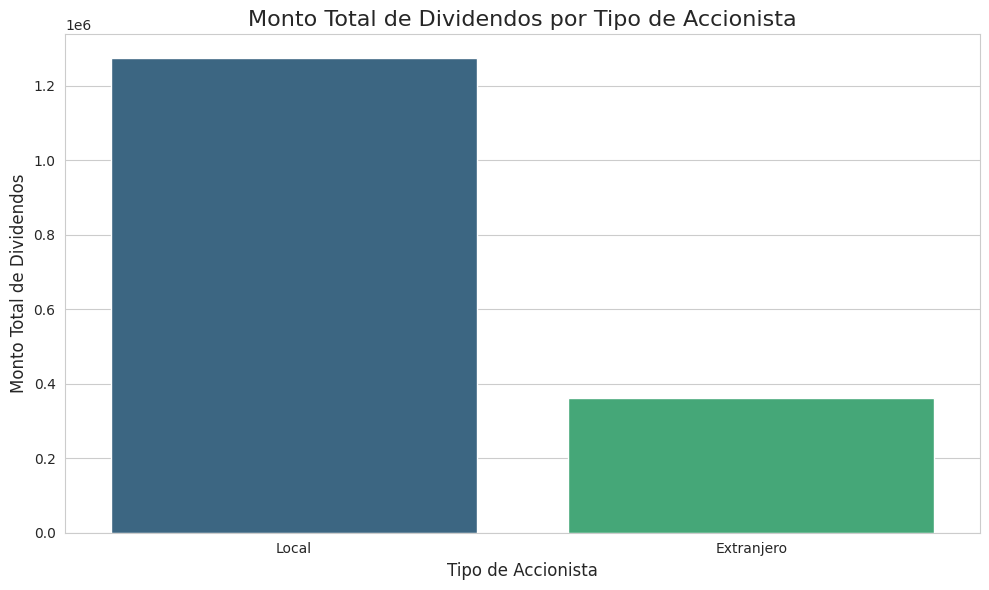

/tmp/ipython-input-2-2169595573.py:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monto_por_estado_pago.index, y=monto_por_estado_pago.values, palette='plasma')


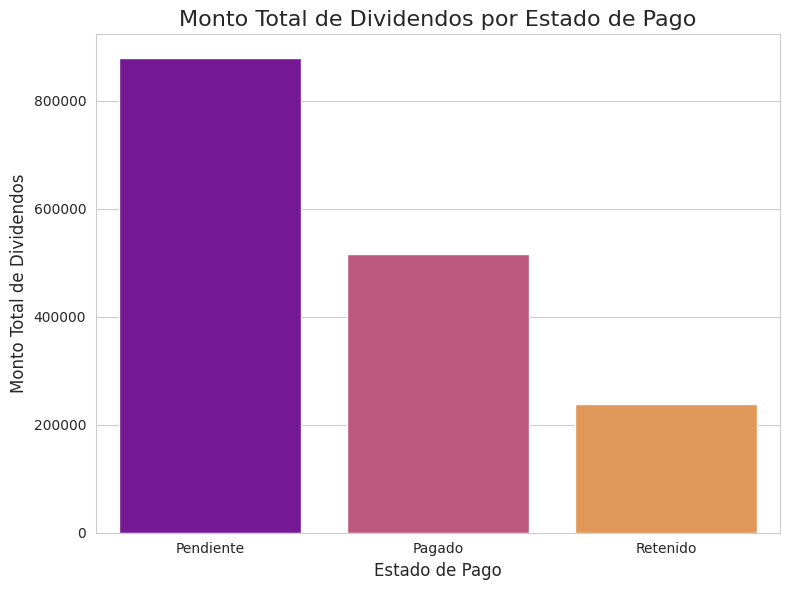

/tmp/ipython-input-2-2169595573.py:153: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='estado_pago', data=df_dividendos, palette='cividis', order=df_dividendos['estado_pago'].value_counts().index)


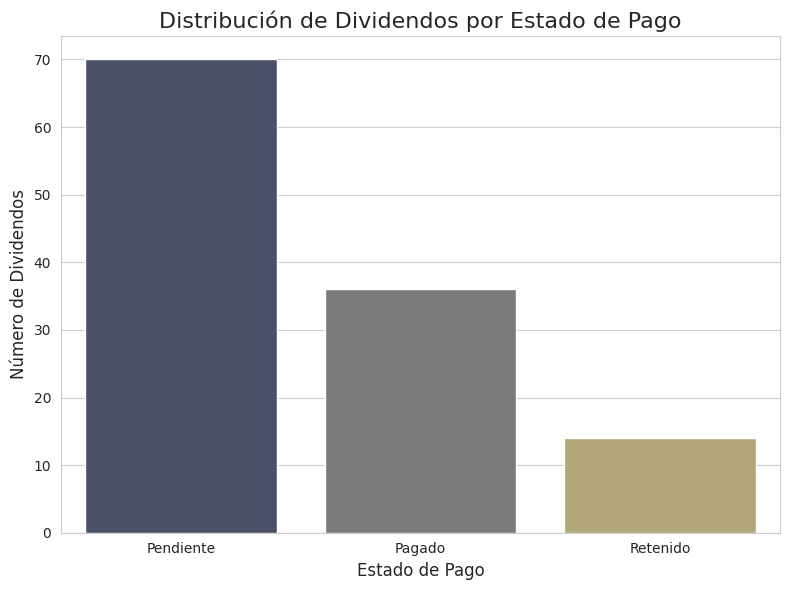

/tmp/ipython-input-2-2169595573.py:162: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monto_por_rango_proximidad.index, y=monto_por_rango_proximidad.values, palette='rocket', order=orden_proximidad_completo)


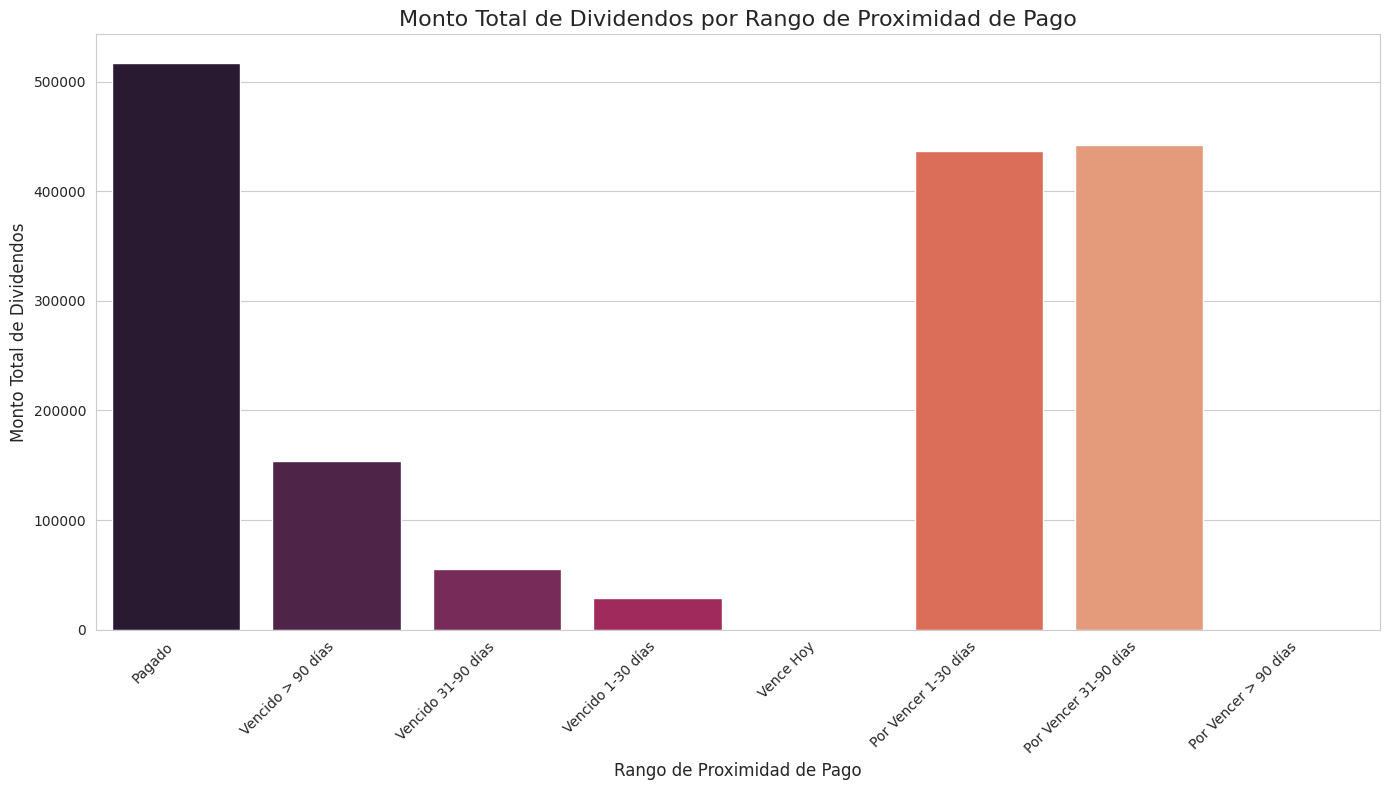

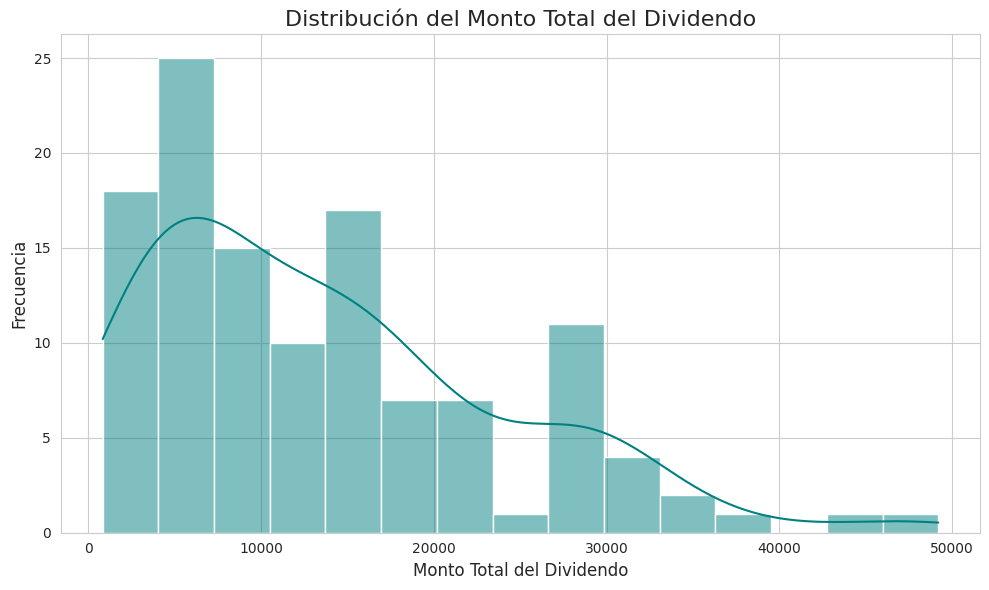

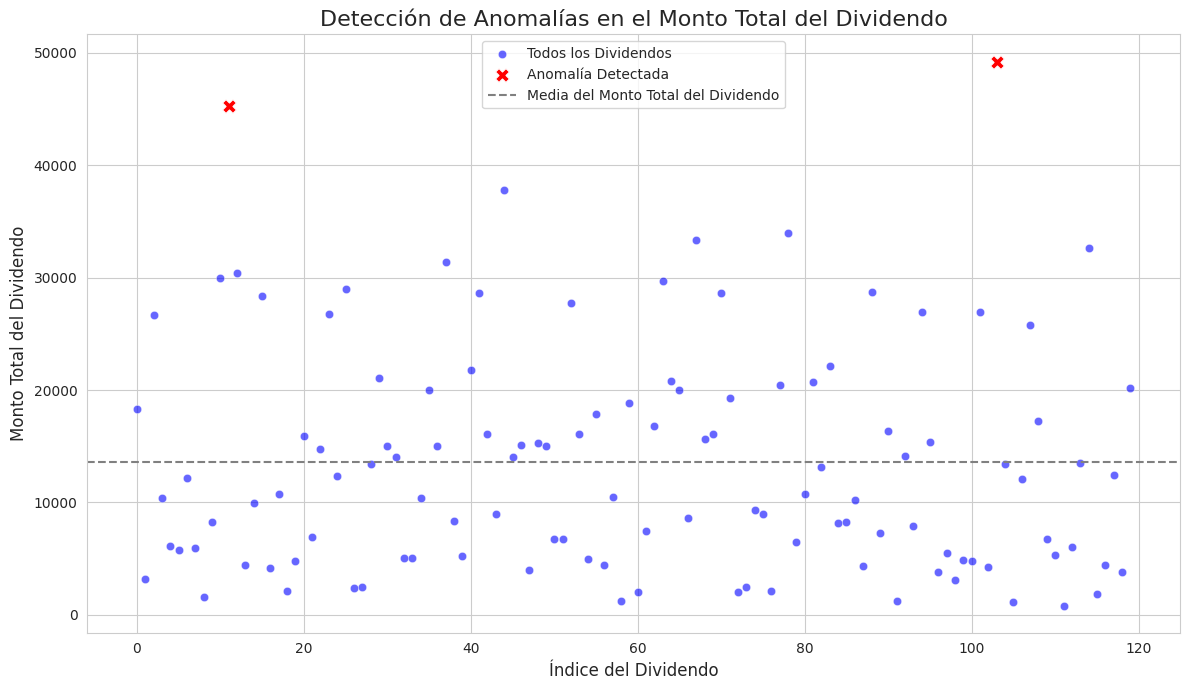


Análisis completo de dividendos a pagar, incluyendo estadísticas, análisis temporal, detección de anomalías y visualizaciones, ha sido ejecutado.


In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Carga del DataFrame desde GitHub ---
# ¡IMPORTANTE! Reemplaza esta URL con la URL RAW real de tu archivo CSV en GitHub.
url_github = "https://raw.githubusercontent.com/Viny2030/mi_proyecto/refs/heads/main/dividendos_a_pagar.csv"

try:
    df_dividendos = pd.read_csv(url_github)
    print(f"DataFrame cargado exitosamente desde GitHub: {url_github}\n")
except Exception as e:
    print(f"Error al cargar el DataFrame desde GitHub: {e}")
    print("Por favor, verifica la URL raw de tu archivo en GitHub y tu conexión a internet.")
    exit()

# Mostrar las primeras filas y la información del DataFrame para verificar la carga
print("--- Encabezado Inicial del DataFrame de Dividendos a Pagar ---")
print(df_dividendos.head())
print("\n--- Información del DataFrame (Tipos de Datos Originales) ---")
df_dividendos.info()

# --- 2. Preprocesamiento de Datos ---

# Asegurarse de que las columnas de fecha sean tipo datetime
print("\n--- Preprocesamiento de Datos: Conversión de Fechas ---")
df_dividendos['fecha_declaracion'] = pd.to_datetime(df_dividendos['fecha_declaracion'])
df_dividendos['fecha_pago_estimada'] = pd.to_datetime(df_dividendos['fecha_pago_estimada'])
# La columna 'fecha_pago_real' puede tener NaT, pd.to_datetime lo maneja bien.
df_dividendos['fecha_pago_real'] = pd.to_datetime(df_dividendos['fecha_pago_real'])

print("\n--- Información del DataFrame (después de conversión de fechas) ---")
df_dividendos.info()
print("\n--- Primeras filas del DataFrame con fechas convertidas ---")
print(df_dividendos[['id_dividendo', 'fecha_declaracion', 'fecha_pago_estimada', 'monto_total_dividendo']].head())

# --- 3. Estadísticas Descriptivas y Agregación ---

print("\n" + "="*70)
print("--- Análisis de Estadísticas Descriptivas y Agregación de Dividendos ---")

# a) Monto Total de Dividendos por Tipo de Accionista
print("\n--- Monto Total de Dividendos por Tipo de Accionista ---")
monto_por_tipo_accionista = df_dividendos.groupby('tipo_accionista')['monto_total_dividendo'].sum().sort_values(ascending=False)
print(monto_por_tipo_accionista)

# b) Monto Total de Dividendos por Estado de Pago
print("\n--- Monto Total de Dividendos por Estado de Pago ---")
monto_por_estado_pago = df_dividendos.groupby('estado_pago')['monto_total_dividendo'].sum().sort_values(ascending=False)
print(monto_por_estado_pago)

# c) Conteo de Dividendos por Estado de Pago y Tipo de Accionista
print("\n--- Conteo de Dividendos por Estado de Pago y Tipo de Accionista ---")
conteo_por_estado_tipo_acc = df_dividendos.groupby(['estado_pago', 'tipo_accionista']).size().unstack(fill_value=0)
print(conteo_por_estado_tipo_acc)

# d) Estadísticas Descriptivas del Monto Total del Dividendo
print("\n--- Estadísticas Descriptivas del Monto Total del Dividendo ---")
print(df_dividendos['monto_total_dividendo'].describe())

# --- 4. Análisis Temporal de Dividendos ---

print("\n" + "="*70)
print("--- Análisis Temporal de Dividendos ---")

# Definir la fecha actual para el análisis (utilizando la fecha actual del contexto: Jueves, 10 de julio de 2025)
fecha_actual_referencia = datetime(2025, 7, 10)

# Calcular días hasta/desde la fecha de pago estimada para dividendos PENDIENTES o RETENIDOS
df_dividendos['dias_hasta_pago_est'] = np.nan # Inicializar como NaN
pendientes_o_retenidos_mask = df_dividendos['estado_pago'].isin(['Pendiente', 'Retenido'])
df_dividendos.loc[pendientes_o_retenidos_mask, 'dias_hasta_pago_est'] = \
    (df_dividendos['fecha_pago_estimada'] - fecha_actual_referencia).dt.days

# Categorizar la proximidad de los dividendos a pagar (pendientes/retenidos)
bins_proximidad = [-np.inf, -90, -30, -1, 0, 30, 90, np.inf]
labels_proximidad = ['Vencido > 90 días', 'Vencido 31-90 días', 'Vencido 1-30 días',
                     'Vence Hoy', 'Por Vencer 1-30 días', 'Por Vencer 31-90 días', 'Por Vencer > 90 días']

# Crear una columna temporal con los rangos de proximidad
df_dividendos['rango_proximidad_temp'] = pd.cut(
    df_dividendos['dias_hasta_pago_est'],
    bins=bins_proximidad,
    labels=labels_proximidad,
    right=False,
    include_lowest=True
)

# Ahora, asignar 'Pagado' a las filas que tienen ese estado de pago
df_dividendos['rango_proximidad'] = df_dividendos['rango_proximidad_temp'].astype(object) # Convertir a object para poder asignar string
df_dividendos.loc[df_dividendos['estado_pago'] == 'Pagado', 'rango_proximidad'] = 'Pagado'

# Definir el orden completo de las categorías para la columna 'rango_proximidad'
orden_proximidad_completo = ['Pagado'] + labels_proximidad
df_dividendos['rango_proximidad'] = pd.Categorical(df_dividendos['rango_proximidad'], categories=orden_proximidad_completo, ordered=True)


print("\n--- Distribución de Dividendos por Rango de Proximidad de Pago ---")
distribucion_proximidad = df_dividendos['rango_proximidad'].value_counts().reindex(orden_proximidad_completo, fill_value=0)
print(distribucion_proximidad)

print("\n--- Monto Total de Dividendos por Rango de Proximidad de Pago ---")
monto_por_rango_proximidad = df_dividendos.groupby('rango_proximidad')['monto_total_dividendo'].sum().reindex(orden_proximidad_completo, fill_value=0)
print(monto_por_rango_proximidad)

# --- 5. Detección Simple de Anomalías ---

print("\n" + "="*70)
print("--- Detección Simple de Anomalías (Monto Total Dividendo) ---")

# Calcular el Z-score para 'monto_total_dividendo'
df_dividendos['monto_dividendo_zscore'] = zscore(df_dividendos['monto_total_dividendo'])
umbral_zscore = 2.5 # Ajustar umbral si es necesario
anomalias_monto_dividendo = df_dividendos[(df_dividendos['monto_dividendo_zscore'] > umbral_zscore) | (df_dividendos['monto_dividendo_zscore'] < -umbral_zscore)]

print(f"\n--- Dividendos con Montos Potencialmente Anómalos (Z-score > {umbral_zscore} o < -{umbral_zscore}) ---")
if not anomalias_monto_dividendo.empty:
    print(anomalias_monto_dividendo[['id_dividendo', 'tipo_accionista', 'accionista', 'monto_total_dividendo', 'monto_dividendo_zscore', 'estado_pago']])
else:
    print(f"No se encontraron anomalías significativas en el monto del dividendo con un Z-score > {umbral_zscore}.")


# --- 6. Visualización de Datos (Gráficos) ---

print("\n" + "="*70)
print("--- Generando Gráficos para Dividendos a Pagar ---")

sns.set_style("whitegrid")

# Gráfico 1: Monto Total de Dividendos por Tipo de Accionista
plt.figure(figsize=(10, 6))
sns.barplot(x=monto_por_tipo_accionista.index, y=monto_por_tipo_accionista.values, palette='viridis')
plt.title('Monto Total de Dividendos por Tipo de Accionista', fontsize=16)
plt.xlabel('Tipo de Accionista', fontsize=12)
plt.ylabel('Monto Total de Dividendos', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico 2: Monto Total de Dividendos por Estado de Pago
plt.figure(figsize=(8, 6))
sns.barplot(x=monto_por_estado_pago.index, y=monto_por_estado_pago.values, palette='plasma')
plt.title('Monto Total de Dividendos por Estado de Pago', fontsize=16)
plt.xlabel('Estado de Pago', fontsize=12)
plt.ylabel('Monto Total de Dividendos', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico 3: Conteo de Dividendos por Estado de Pago
plt.figure(figsize=(8, 6))
sns.countplot(x='estado_pago', data=df_dividendos, palette='cividis', order=df_dividendos['estado_pago'].value_counts().index)
plt.title('Distribución de Dividendos por Estado de Pago', fontsize=16)
plt.xlabel('Estado de Pago', fontsize=12)
plt.ylabel('Número de Dividendos', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico 4: Monto Total de Dividendos por Rango de Proximidad de Pago
plt.figure(figsize=(14, 8))
sns.barplot(x=monto_por_rango_proximidad.index, y=monto_por_rango_proximidad.values, palette='rocket', order=orden_proximidad_completo)
plt.title('Monto Total de Dividendos por Rango de Proximidad de Pago', fontsize=16)
plt.xlabel('Rango de Proximidad de Pago', fontsize=12)
plt.ylabel('Monto Total de Dividendos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico 5: Distribución del Monto Total del Dividendo (Histograma)
plt.figure(figsize=(10, 6))
sns.histplot(df_dividendos['monto_total_dividendo'], bins=15, kde=True, color='teal')
plt.title('Distribución del Monto Total del Dividendo', fontsize=16)
plt.xlabel('Monto Total del Dividendo', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico 6: Detección de Anomalías en el Monto Total del Dividendo (Scatter Plot)
plt.figure(figsize=(12, 7))
sns.scatterplot(x=df_dividendos.index, y='monto_total_dividendo', data=df_dividendos, label='Todos los Dividendos', color='blue', alpha=0.6)
if not anomalias_monto_dividendo.empty:
    sns.scatterplot(x=anomalias_monto_dividendo.index, y='monto_total_dividendo', data=anomalias_monto_dividendo,
                    color='red', s=100, label='Anomalía Detectada', marker='X')
plt.axhline(df_dividendos['monto_total_dividendo'].mean(), color='gray', linestyle='--', label='Media del Monto Total del Dividendo')
plt.title('Detección de Anomalías en el Monto Total del Dividendo', fontsize=16)
plt.xlabel('Índice del Dividendo', fontsize=12)
plt.ylabel('Monto Total del Dividendo', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("Análisis completo de dividendos a pagar, incluyendo estadísticas, análisis temporal, detección de anomalías y visualizaciones, ha sido ejecutado.")

### Algoritmo === Otras Deudas

DataFrame cargado exitosamente desde GitHub: https://raw.githubusercontent.com/Viny2030/mi_proyecto/refs/heads/main/otras_deudas.csv

--- Encabezado Inicial del DataFrame de Otras Deudas ---
   id_deuda                tipo_deuda     acreedor fecha_origen  \
0  DEU-0000  Arrendamiento Financiero   Acreedor_7   2021-10-02   
1  DEU-0001    Préstamo de Accionista  Acreedor_16   2020-09-30   
2  DEU-0002           Deuda Comercial   Acreedor_8   2024-01-14   
3  DEU-0003           Deuda Comercial  Acreedor_17   2021-05-17   
4  DEU-0004           Deuda Comercial   Acreedor_3   2021-10-26   

  fecha_vencimiento  monto_original  saldo_pendiente moneda  \
0        2026-12-21      1672340.88        416407.97    ARS   
1        2024-05-15      1703419.28             0.00    USD   
2        2025-10-12      9091402.51       3536981.71    ARS   
3        2024-09-28      7130039.69             0.00    ARS   
4        2027-01-09      2264049.94       1059280.49    ARS   

   tasa_interes_anual estad

/tmp/ipython-input-3-373873908.py:109: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  saldo_por_rango_vencimiento = df_otras_deudas.groupby('rango_vencimiento')['saldo_pendiente'].sum().reindex(orden_vencimiento_completo, fill_value=0)
/tmp/ipython-input-3-373873908.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=saldo_por_tipo_deuda.index, y=saldo_por_tipo_deuda.values, palette='viridis')


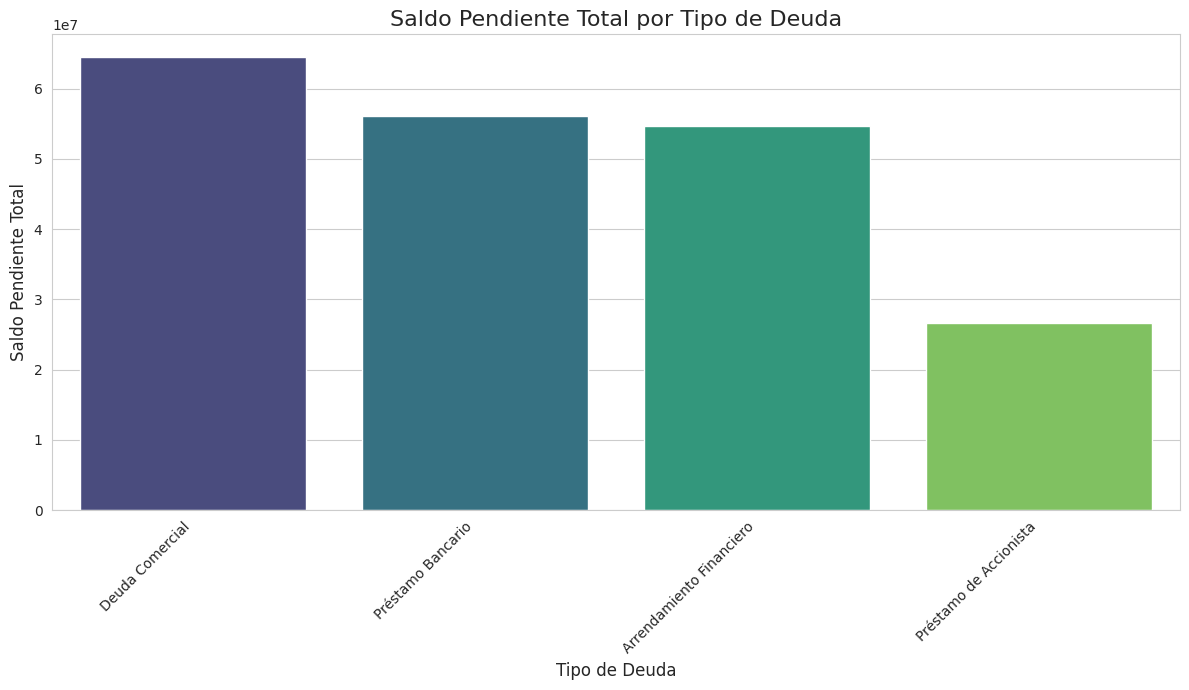

/tmp/ipython-input-3-373873908.py:151: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=saldo_por_acreedor.head(10).index, y=saldo_por_acreedor.head(10).values, palette='magma')


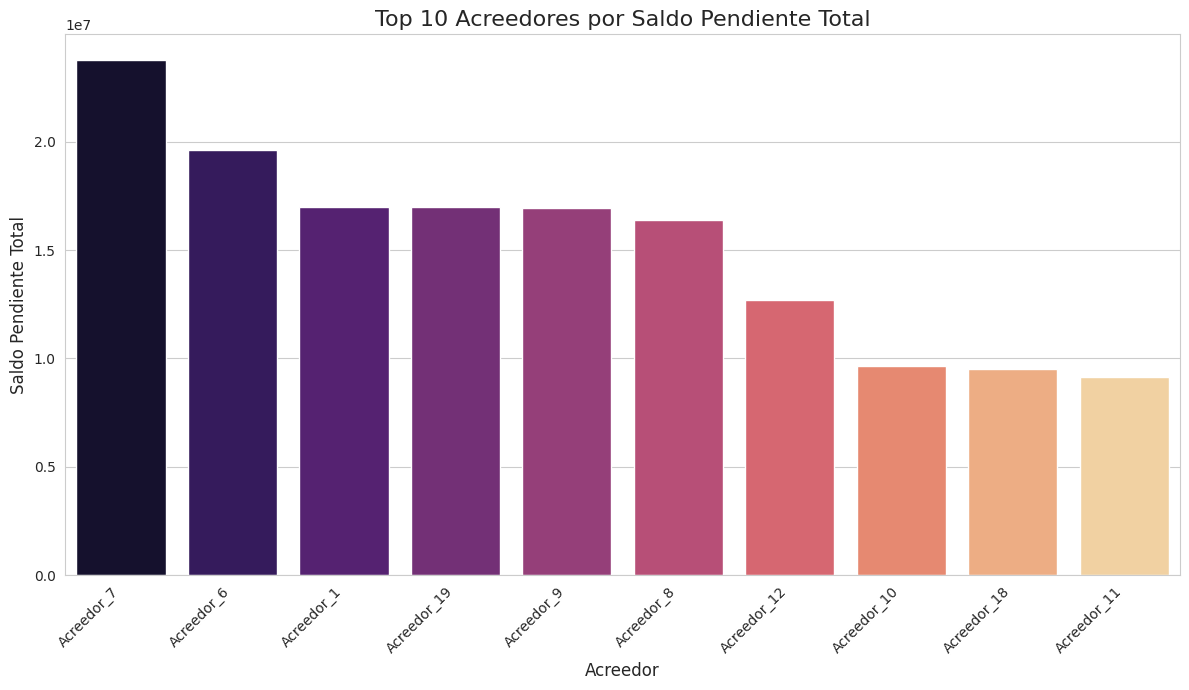

/tmp/ipython-input-3-373873908.py:161: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='estado_deuda', data=df_otras_deudas, palette='cividis', order=df_otras_deudas['estado_deuda'].value_counts().index)


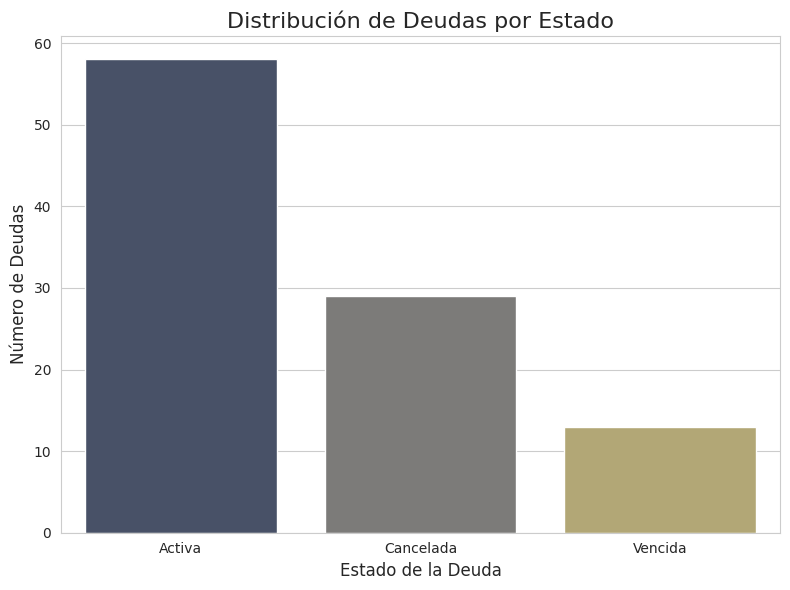

/tmp/ipython-input-3-373873908.py:170: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=saldo_por_rango_vencimiento.index, y=saldo_por_rango_vencimiento.values, palette='rocket', order=orden_vencimiento_completo)


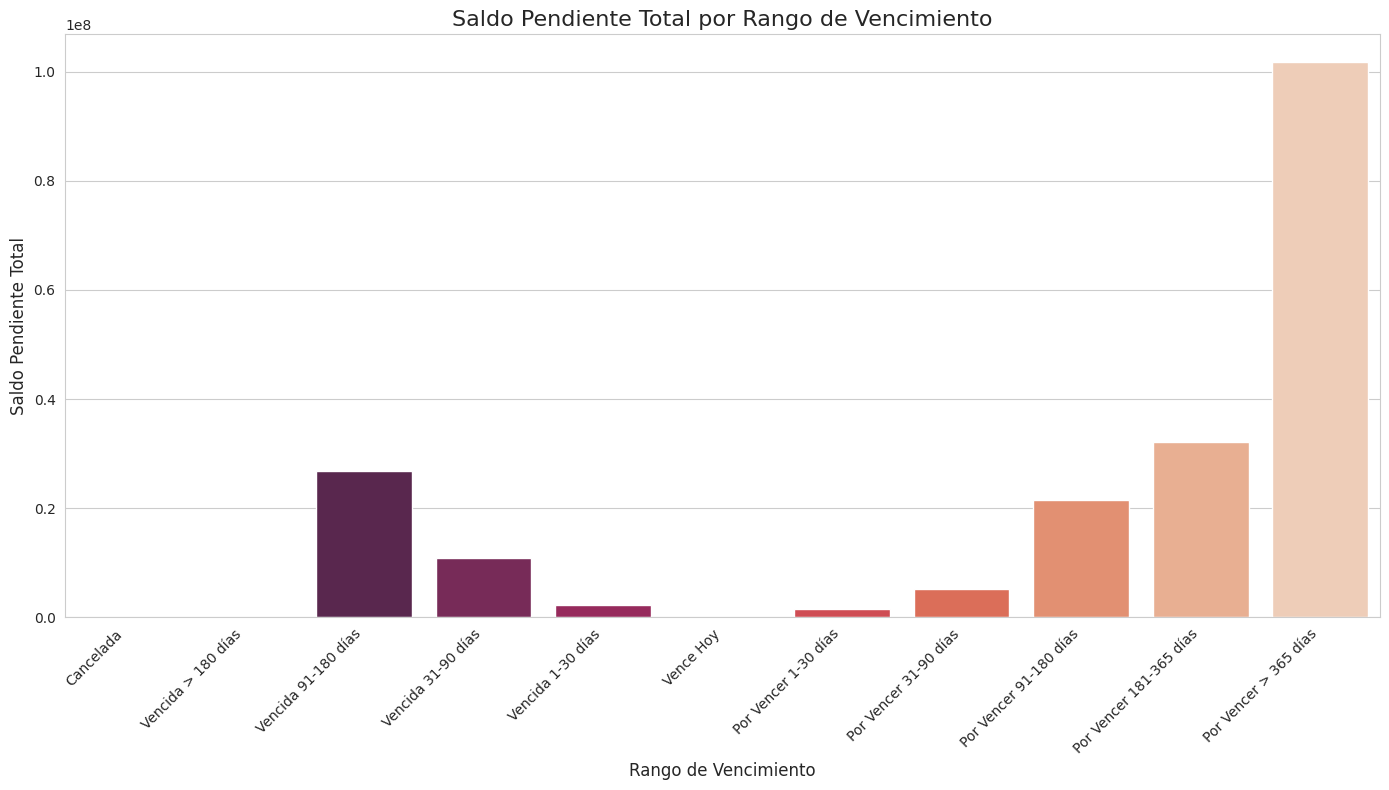

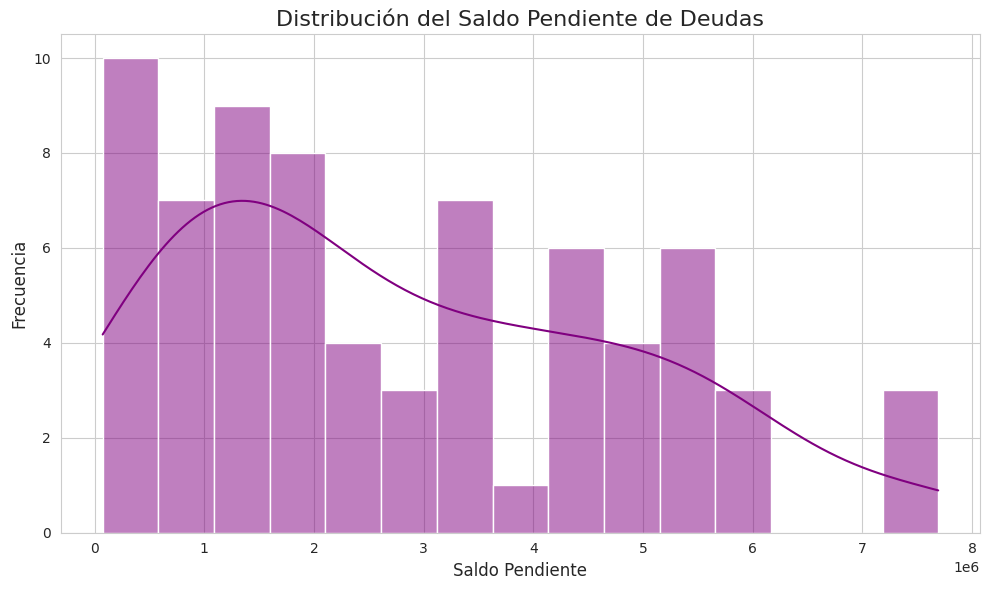

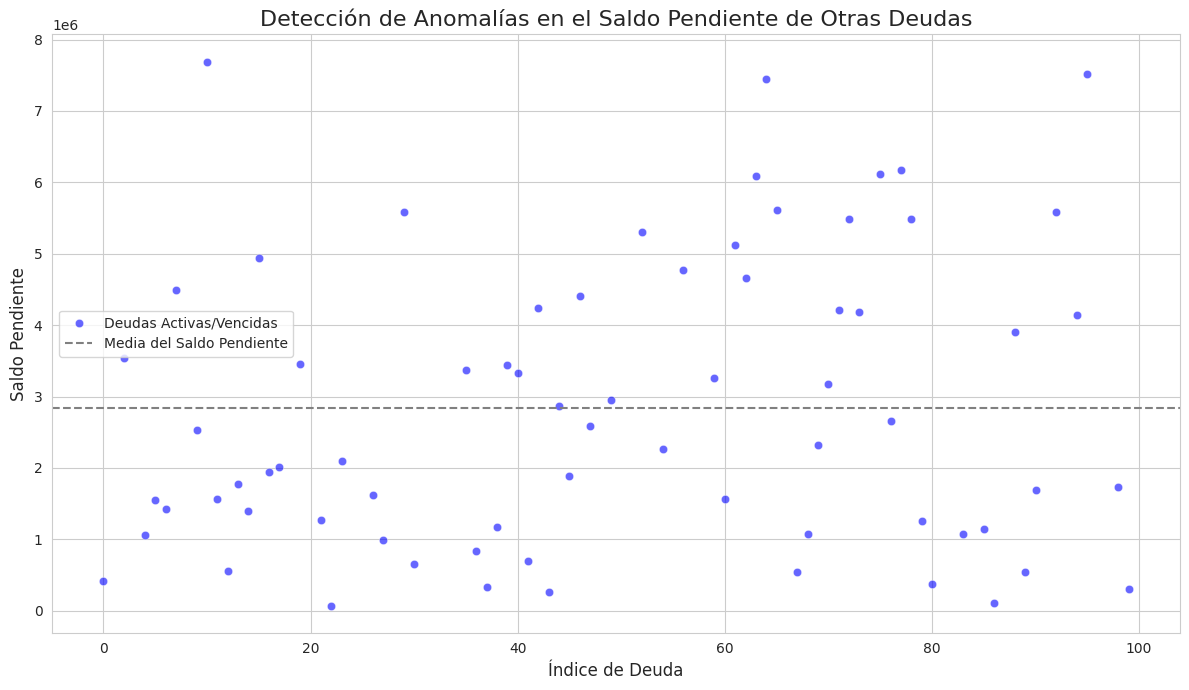


Análisis completo de otras deudas, incluyendo estadísticas, análisis temporal, detección de anomalías y visualizaciones, ha sido ejecutado.


In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Carga del DataFrame desde GitHub ---
# ¡IMPORTANTE! Reemplaza esta URL con la URL RAW real de tu archivo CSV en GitHub.
url_github = "https://raw.githubusercontent.com/Viny2030/mi_proyecto/refs/heads/main/otras_deudas.csv"

try:
    df_otras_deudas = pd.read_csv(url_github)
    print(f"DataFrame cargado exitosamente desde GitHub: {url_github}\n")
except Exception as e:
    print(f"Error al cargar el DataFrame desde GitHub: {e}")
    print("Por favor, verifica la URL raw de tu archivo en GitHub y tu conexión a internet.")
    exit()

# Mostrar las primeras filas y la información del DataFrame para verificar la carga
print("--- Encabezado Inicial del DataFrame de Otras Deudas ---")
print(df_otras_deudas.head())
print("\n--- Información del DataFrame (Tipos de Datos Originales) ---")
df_otras_deudas.info()

# --- 2. Preprocesamiento de Datos ---

# Asegurarse de que las columnas de fecha sean tipo datetime
print("\n--- Preprocesamiento de Datos: Conversión de Fechas ---")
df_otras_deudas['fecha_origen'] = pd.to_datetime(df_otras_deudas['fecha_origen'])
df_otras_deudas['fecha_vencimiento'] = pd.to_datetime(df_otras_deudas['fecha_vencimiento'])

print("\n--- Información del DataFrame (después de conversión de fechas) ---")
df_otras_deudas.info()
print("\n--- Primeras filas del DataFrame con fechas convertidas ---")
print(df_otras_deudas[['id_deuda', 'fecha_origen', 'fecha_vencimiento', 'saldo_pendiente']].head())

# --- 3. Estadísticas Descriptivas y Agregación ---

print("\n" + "="*70)
print("--- Análisis de Estadísticas Descriptivas y Agregación de Otras Deudas ---")

# a) Saldo Pendiente Total por Tipo de Deuda
print("\n--- Saldo Pendiente Total por Tipo de Deuda ---")
saldo_por_tipo_deuda = df_otras_deudas.groupby('tipo_deuda')['saldo_pendiente'].sum().sort_values(ascending=False)
print(saldo_por_tipo_deuda)

# b) Saldo Pendiente Total por Acreedor (Top 10)
print("\n--- Saldo Pendiente Total por Acreedor (Top 10) ---")
saldo_por_acreedor = df_otras_deudas.groupby('acreedor')['saldo_pendiente'].sum().sort_values(ascending=False)
print(saldo_por_acreedor.head(10))

# c) Conteo de Deudas por Estado de Deuda y Tipo de Deuda
print("\n--- Conteo de Deudas por Estado y Tipo de Deuda ---")
conteo_por_estado_tipo = df_otras_deudas.groupby(['estado_deuda', 'tipo_deuda']).size().unstack(fill_value=0)
print(conteo_por_estado_tipo)

# d) Estadísticas Descriptivas del Saldo Pendiente
print("\n--- Estadísticas Descriptivas del Saldo Pendiente ---")
print(df_otras_deudas['saldo_pendiente'].describe())

# e) Tasa de Interés Promedio por Tipo de Deuda
print("\n--- Tasa de Interés Anual Promedio por Tipo de Deuda ---")
tasa_promedio_por_tipo = df_otras_deudas.groupby('tipo_deuda')['tasa_interes_anual'].mean().sort_values(ascending=False)
print(tasa_promedio_por_tipo)

# --- 4. Análisis Temporal de Deudas ---

print("\n" + "="*70)
print("--- Análisis Temporal de Otras Deudas ---")

# Definir la fecha actual para el análisis (utilizando la fecha actual del contexto: Jueves, 10 de julio de 2025)
fecha_actual_referencia = datetime(2025, 7, 10)

# Calcular días hasta/desde el vencimiento para deudas 'Activa' o 'Vencida'
df_otras_deudas['dias_hasta_vencimiento'] = np.nan # Inicializar como NaN
activa_o_vencida_mask = df_otras_deudas['estado_deuda'].isin(['Activa', 'Vencida'])
df_otras_deudas.loc[activa_o_vencida_mask, 'dias_hasta_vencimiento'] = \
    (df_otras_deudas['fecha_vencimiento'] - fecha_actual_referencia).dt.days

# Categorizar la antigüedad de las deudas (basado en fecha_vencimiento y estado)
bins_antiguedad_deudas = [-np.inf, -180, -90, -30, -1, 0, 30, 90, 180, 365, np.inf]
labels_antiguedad_deudas = ['Vencida > 180 días', 'Vencida 91-180 días', 'Vencida 31-90 días', 'Vencida 1-30 días',
                           'Vence Hoy', 'Por Vencer 1-30 días', 'Por Vencer 31-90 días',
                           'Por Vencer 91-180 días', 'Por Vencer 181-365 días', 'Por Vencer > 365 días']

# Crear una columna temporal con los rangos de antigüedad
df_otras_deudas['rango_vencimiento_temp'] = pd.cut(
    df_otras_deudas['dias_hasta_vencimiento'],
    bins=bins_antiguedad_deudas,
    labels=labels_antiguedad_deudas,
    right=False,
    include_lowest=True
)

# Asignar 'Cancelada' a las filas que tienen ese estado
df_otras_deudas['rango_vencimiento'] = df_otras_deudas['rango_vencimiento_temp'].astype(object)
df_otras_deudas.loc[df_otras_deudas['estado_deuda'] == 'Cancelada', 'rango_vencimiento'] = 'Cancelada'

# Definir el orden completo de las categorías para la columna 'rango_vencimiento'
orden_vencimiento_completo = ['Cancelada'] + labels_antiguedad_deudas
df_otras_deudas['rango_vencimiento'] = pd.Categorical(df_otras_deudas['rango_vencimiento'], categories=orden_vencimiento_completo, ordered=True)

print("\n--- Distribución de Deudas por Rango de Vencimiento ---")
distribucion_vencimiento = df_otras_deudas['rango_vencimiento'].value_counts().reindex(orden_vencimiento_completo, fill_value=0)
print(distribucion_vencimiento)

print("\n--- Saldo Pendiente Total por Rango de Vencimiento ---")
saldo_por_rango_vencimiento = df_otras_deudas.groupby('rango_vencimiento')['saldo_pendiente'].sum().reindex(orden_vencimiento_completo, fill_value=0)
print(saldo_por_rango_vencimiento)

# --- 5. Detección Simple de Anomalías ---

print("\n" + "="*70)
print("--- Detección Simple de Anomalías (Saldo Pendiente) ---")

# Calcular el Z-score para 'saldo_pendiente' (solo en deudas activas o vencidas para evitar 0s de canceladas)
df_deudas_analisis_anomalias = df_otras_deudas[df_otras_deudas['saldo_pendiente'] > 0].copy()
if not df_deudas_analisis_anomalias.empty:
    df_deudas_analisis_anomalias['saldo_zscore'] = zscore(df_deudas_analisis_anomalias['saldo_pendiente'])
    umbral_zscore = 2.5 # Ajustar umbral si es necesario
    anomalias_saldo = df_deudas_analisis_anomalias[(df_deudas_analisis_anomalias['saldo_zscore'] > umbral_zscore) | (df_deudas_analisis_anomalias['saldo_zscore'] < -umbral_zscore)]

    print(f"\n--- Deudas con Saldo Pendiente Potencialmente Anómalo (Z-score > {umbral_zscore} o < -{umbral_zscore}) ---")
    if not anomalias_saldo.empty:
        print(anomalias_saldo[['id_deuda', 'tipo_deuda', 'acreedor', 'saldo_pendiente', 'moneda', 'saldo_zscore', 'estado_deuda']])
    else:
        print(f"No se encontraron anomalías significativas en el saldo pendiente con un Z-score > {umbral_zscore}.")
else:
    print("No hay deudas con saldo pendiente para analizar anomalías.")

# --- 6. Visualización de Datos (Gráficos) ---

print("\n" + "="*70)
print("--- Generando Gráficos para Otras Deudas ---")

sns.set_style("whitegrid")

# Gráfico 1: Saldo Pendiente Total por Tipo de Deuda
plt.figure(figsize=(12, 7))
sns.barplot(x=saldo_por_tipo_deuda.index, y=saldo_por_tipo_deuda.values, palette='viridis')
plt.title('Saldo Pendiente Total por Tipo de Deuda', fontsize=16)
plt.xlabel('Tipo de Deuda', fontsize=12)
plt.ylabel('Saldo Pendiente Total', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico 2: Saldo Pendiente Total por Acreedor (Top 10)
plt.figure(figsize=(12, 7))
sns.barplot(x=saldo_por_acreedor.head(10).index, y=saldo_por_acreedor.head(10).values, palette='magma')
plt.title('Top 10 Acreedores por Saldo Pendiente Total', fontsize=16)
plt.xlabel('Acreedor', fontsize=12)
plt.ylabel('Saldo Pendiente Total', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico 3: Conteo de Deudas por Estado
plt.figure(figsize=(8, 6))
sns.countplot(x='estado_deuda', data=df_otras_deudas, palette='cividis', order=df_otras_deudas['estado_deuda'].value_counts().index)
plt.title('Distribución de Deudas por Estado', fontsize=16)
plt.xlabel('Estado de la Deuda', fontsize=12)
plt.ylabel('Número de Deudas', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico 4: Saldo Pendiente Total por Rango de Vencimiento
plt.figure(figsize=(14, 8))
sns.barplot(x=saldo_por_rango_vencimiento.index, y=saldo_por_rango_vencimiento.values, palette='rocket', order=orden_vencimiento_completo)
plt.title('Saldo Pendiente Total por Rango de Vencimiento', fontsize=16)
plt.xlabel('Rango de Vencimiento', fontsize=12)
plt.ylabel('Saldo Pendiente Total', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico 5: Distribución del Saldo Pendiente (Histograma)
plt.figure(figsize=(10, 6))
sns.histplot(df_otras_deudas['saldo_pendiente'][df_otras_deudas['saldo_pendiente'] > 0], bins=15, kde=True, color='purple')
plt.title('Distribución del Saldo Pendiente de Deudas', fontsize=16)
plt.xlabel('Saldo Pendiente', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico 6: Detección de Anomalías en el Saldo Pendiente (Scatter Plot)
if not df_deudas_analisis_anomalias.empty:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(x=df_deudas_analisis_anomalias.index, y='saldo_pendiente', data=df_deudas_analisis_anomalias, label='Deudas Activas/Vencidas', color='blue', alpha=0.6)
    if not anomalias_saldo.empty:
        sns.scatterplot(x=anomalias_saldo.index, y='saldo_pendiente', data=anomalias_saldo,
                        color='red', s=100, label='Anomalía Detectada', marker='X')
    plt.axhline(df_deudas_analisis_anomalias['saldo_pendiente'].mean(), color='gray', linestyle='--', label='Media del Saldo Pendiente')
    plt.title('Detección de Anomalías en el Saldo Pendiente de Otras Deudas', fontsize=16)
    plt.xlabel('Índice de Deuda', fontsize=12)
    plt.ylabel('Saldo Pendiente', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("\nNo hay datos suficientes con saldo pendiente para generar el gráfico de anomalías.")


print("\n" + "="*70)
print("Análisis completo de otras deudas, incluyendo estadísticas, análisis temporal, detección de anomalías y visualizaciones, ha sido ejecutado.")

### Algoritmo Previsiones